## Created a dataset from Global Data about military spending, happiness indexes, imports, exports, and women in parliament

part 1: clean data
part 2: Look at number of armed forces globally and per country, and change in armed forces over time
part 3: Looking at the percentage of parliament that are women
Part 4: Gini Happiness Index and how it relates to military and parliamentary make-up

In [1]:
import pandas as pd


In [2]:
df= pd.read_csv("military_global_info.csv")


In [6]:
df.columns

Index(['Country', 'Code', 'ContinentCode', 'Year',
       'Population size in millions', 'Gini income inequality index',
       'Percent of world population', 'Percent of world GDP',
       'Percent of world exports', 'Percent of world imports',
       'Percent of world Foreign Direct Investment',
       'Percent of world oil reserves',
       'Military spending in billion U.S. dollars',
       'Military spending percent of GDP',
       'Military spending percent of total government spending ',
       'Armed forces personnel',
       'Armed forces personnel percent of the labor force',
       'Arms exports million constant U.S. dollars',
       'Arms imports million constant U.S. dollars',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Human Development Index (0 - 1)', 'Women in parliament percent'],
      dtype='object')

### lots of missing data. will have to create data-rich subsets

In [7]:
# Finding the percentage of missing variables in the dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

,column_name,percent_missing
Happiness Index 0 (unhappy) - 10 (happy),Happiness Index 0 (unhappy) - 10 (happy),90.204248
Gini income inequality index,Gini income inequality index,85.890523
Arms exports million constant U.S. dollars,Arms exports million constant U.S. dollars,82.181373
Military spending percent of total government spending,Military spending percent of total government ...,66.233660
Women in parliament percent,Women in parliament percent,65.400327
Armed forces personnel percent of the labor force,Armed forces personnel percent of the labor force,60.792484
Percent of world exports,Percent of world exports,60.669935
Percent of world imports,Percent of world imports,60.669935
Percent of world Foreign Direct Investment,Percent of world Foreign Direct Investment,60.653595
Armed forces personnel,Armed forces personnel,58.202614


In [8]:
df_2020= df.loc[(df["Year"]==2020)]
df_2020.head()


,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
60,Afghanistan,AFG,AS,2020,38.93,NaN,NaN,NaN,NaN,NaN,...,0.28,1.37,4.49,NaN,NaN,NaN,227.0,2.52,0.511,27.02
122,Albania,ALB,EU,2020,2.84,NaN,NaN,NaN,NaN,NaN,...,0.22,1.54,4.67,NaN,NaN,NaN,NaN,5.12,0.795,29.51
184,Algeria,DZA,AF,2020,43.85,NaN,NaN,NaN,NaN,NaN,...,9.71,6.66,16.99,NaN,NaN,NaN,549.0,4.89,0.748,25.76
246,Andorra,AND,EU,2020,0.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868,46.43
307,Angola,AGO,AF,2020,32.87,NaN,NaN,NaN,NaN,NaN,...,0.99,1.62,7.79,NaN,NaN,NaN,42.0,NaN,0.581,30.00


### the year 2020 has good data

In [11]:
percent_missing_2020 = df_2020.isnull().sum() * 100 / len(df)
missing_value_df_2020 = pd.DataFrame({'column_name': df_2020.columns,'percent_missing': percent_missing_2020})
missing_value_df_2020.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df_2020

,column_name,percent_missing
Percent of world oil reserves,Percent of world oil reserves,1.625817
Percent of world population,Percent of world population,1.625817
Armed forces personnel,Armed forces personnel,1.625817
Percent of world Foreign Direct Investment,Percent of world Foreign Direct Investment,1.625817
Percent of world imports,Percent of world imports,1.625817
Percent of world GDP,Percent of world GDP,1.625817
Percent of world exports,Percent of world exports,1.625817
Gini income inequality index,Gini income inequality index,1.625817
Armed forces personnel percent of the labor force,Armed forces personnel percent of the labor force,1.625817
Arms exports million constant U.S. dollars,Arms exports million constant U.S. dollars,1.364379


In [15]:
df["Armed forces personnel"].sum()

854199004.0

### in 2019, there were 27,233,000 aremed forces personel globally

In [19]:
df["Armed forces personnel"].loc[(df["Year"]==2019)].sum()


27233000.0

In [350]:
armed_forces_2018 = df["Armed forces personnel"].loc[(df["Year"]==2018)].sum()
armed_forces_2018

27208115.0

In [380]:
armed_forces= df[["Year", "Armed forces personnel"]].groupby(by="Year").agg("sum")
armed_forces= armed_forces.reset_index()

In [381]:
armed_forces

,Year,Armed forces personnel
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0
...,...,...
57,2017,26977000.0
58,2018,27208115.0
59,2019,27233000.0
60,2020,0.0


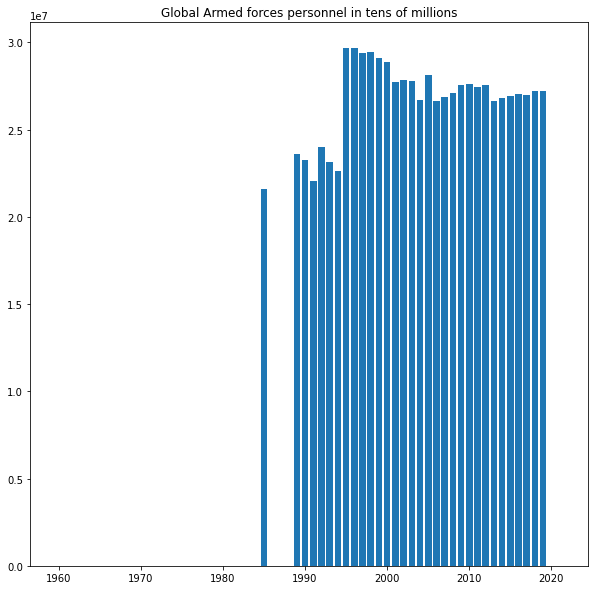

In [383]:
plt.bar(armed_forces["Year"], armed_forces["Armed forces personnel"])
plt.title("Global Armed forces personnel in tens of millions")

plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [371]:
df_army_labor= df[["Year", "Armed forces personnel percent of the labor force"]].groupby(by="Year").agg("mean")

df_army_labor= df_army_labor.reset_index()


### There has been a steady decline in the percent of the workforce who are in armed forces

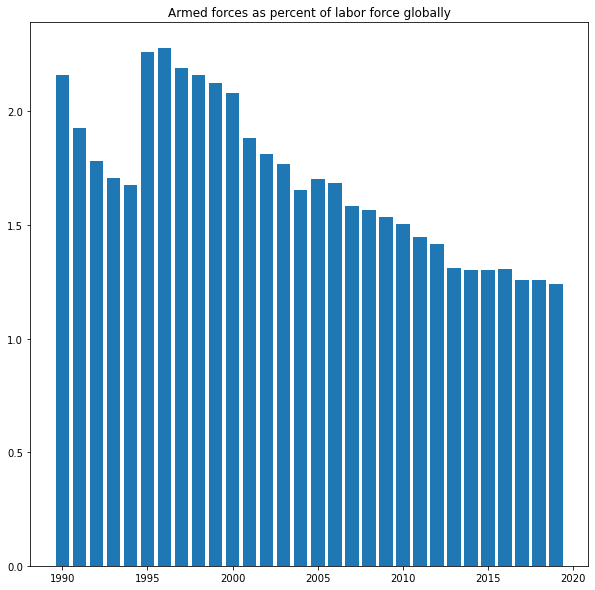

In [568]:
plt.bar(df_army_labor["Year"], df_army_labor["Armed forces personnel percent of the labor force"])
plt.title("Armed forces as percent of labor force globally")

plt.rcParams['figure.figsize'] = (10,10)
plt.show()

input a country: Nepal


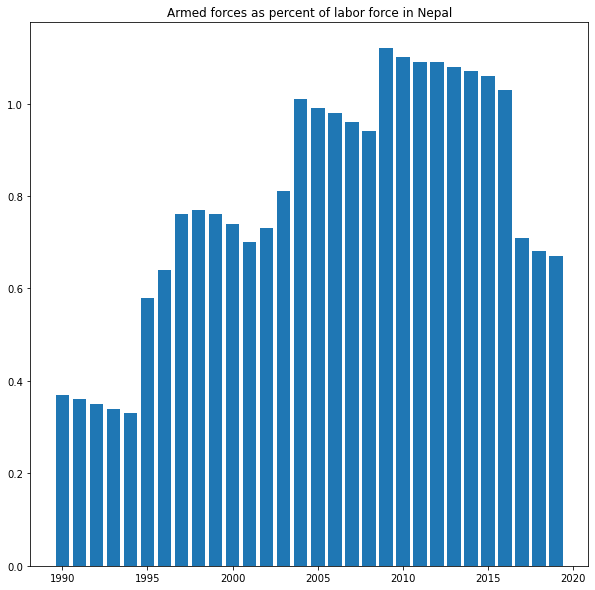

In [584]:
a= input("input a country: ")
COUNTRY= df.loc[(df["Country"]==a)]
Country_army= COUNTRY[["Year", "Armed forces personnel percent of the labor force","Armed forces personnel"]]

Country_army= Country_army.reset_index()
plt.bar(Country_army["Year"], Country_army["Armed forces personnel percent of the labor force"])
plt.title("Armed forces as percent of labor force in "+ str(a))

plt.rcParams['figure.figsize'] = (10,10)
plt.show()


In [386]:
USA= df.loc[(df["Country"]=="USA")]
USA_army= USA[["Year", "Armed forces personnel percent of the labor force","Armed forces personnel"]]

USA_army= USA_army.reset_index()

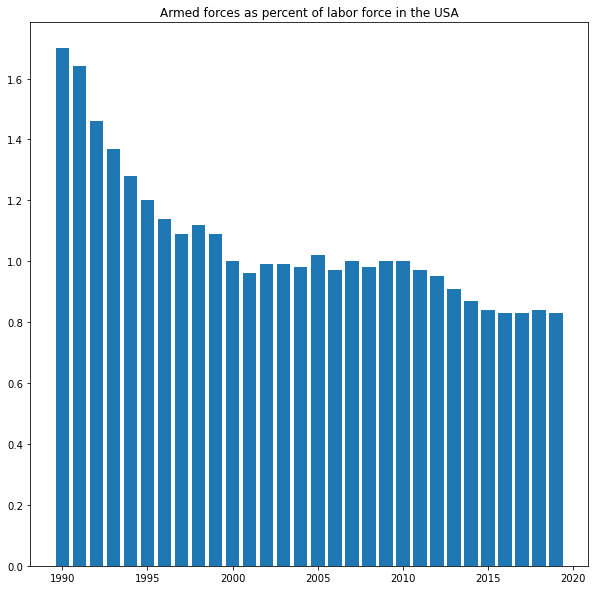

In [388]:
plt.bar(USA_army["Year"], USA_army["Armed forces personnel percent of the labor force"])
plt.title("Armed forces as percent of labor force in the USA")

plt.rcParams['figure.figsize'] = (10,10)
plt.show()

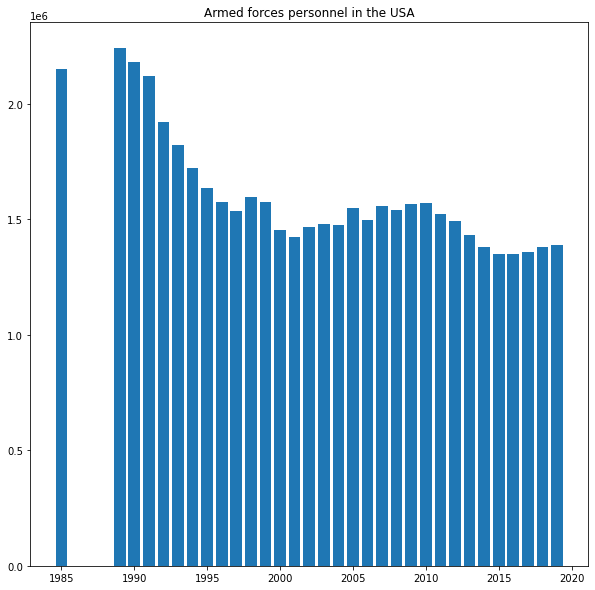

In [389]:
plt.bar(USA_army["Year"], USA_army["Armed forces personnel"])
plt.title("Armed forces personnel in the USA")

plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [405]:
USA.loc[(USA["Year"]==2019)]
Usa_soliders_2019= USA.loc[(USA["Year"]==2019)]
Usa_soliders_2019_total = Usa_soliders_2019["Armed forces personnel"].sum()
Usa_soliders_2019_total

1388000.0

In [399]:
world_2019= df.loc[(df["Year"]==2019)]
soldiers_2019= world_2019["Armed forces personnel"].sum()
soldiers_2019

27233000.0

In [406]:

soldiers= round(100*(Usa_soliders_2019_total/soldiers_2019),3)
print("The percent of global soldiers who are from the USA is: " + str(soldiers) + "%")

The percent of global soldiers who are from the USA is: 5.097%


In [21]:
df["Population"] = df["Population size in millions"]*1000000


In [25]:
total_pop_2020 = df["Population"].loc[(df["Year"]==2019)].sum()
total_pop_2020

7971650000.0

In [411]:
us_pop= Usa_soliders_2019["Population"].sum()
pop= round(100*(us_pop/total_pop_2020),3)
print("The Us has " +str(pop) + "% of the world's population")

The Us has 4.119% of the world's population


## The US has 4.1% of the world's population and  5.1% of the world's armed service members.

### in 2020 .34% of the world's population was in the armed forces

In [29]:
percent_armed_forces = round(100*(armed_forces_2020/total_pop_2020),5)
print(str(percent_armed_forces) + "%")

0.34162%


In [358]:
USA= df.loc[(df["Country"]=="USA")]
USA["percent population service members"]= round(100*(USA["Armed forces personnel"]/USA["Population"]),5)
USA

/var/folders/bc/88y__jqx7s591njj3c2hmjn40000gn/T/ipykernel_99852/89158652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA["percent population service members"]= round(100*(USA["Armed forces personnel"]/USA["Population"]),5)


,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military,imports_greater_than_exports,percent population service members
11745,USA,USA,NaN,1960,180.67,NaN,5.52,NaN,NaN,NaN,...,NaN,6001.0,221.0,NaN,NaN,NaN,180670000.0,NaN,0.5,NaN
11746,USA,USA,NaN,1961,183.69,NaN,5.54,NaN,NaN,NaN,...,NaN,6301.0,238.0,NaN,NaN,NaN,183690000.0,NaN,0.5,NaN
11747,USA,USA,NaN,1962,186.54,NaN,5.53,NaN,NaN,NaN,...,NaN,6104.0,264.0,NaN,NaN,NaN,186540000.0,NaN,0.5,NaN
11748,USA,USA,NaN,1963,189.24,NaN,5.50,NaN,NaN,NaN,...,NaN,9351.0,323.0,NaN,NaN,NaN,189240000.0,NaN,0.5,NaN
11749,USA,USA,NaN,1964,191.89,NaN,5.47,NaN,NaN,NaN,...,NaN,12312.0,326.0,NaN,NaN,NaN,191890000.0,NaN,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11802,USA,USA,NaN,2017,325.12,41.2,4.16,21.06,10.61,13.33,...,0.83,12070.0,516.0,6.99,0.919,19.35,325120000.0,0.41800,1.0,0.41800
11803,USA,USA,NaN,2018,326.84,41.4,4.14,20.85,10.28,12.97,...,0.84,9895.0,380.0,6.89,0.920,23.50,326840000.0,0.42216,1.0,0.42216
11804,USA,USA,NaN,2019,328.33,NaN,NaN,NaN,NaN,NaN,...,0.83,10788.0,866.0,6.89,0.920,23.43,328330000.0,0.42275,0.5,0.42275
11805,USA,USA,NaN,2020,329.48,NaN,NaN,NaN,NaN,NaN,...,NaN,9372.0,687.0,6.95,0.926,27.46,329480000.0,NaN,0.5,NaN


In [555]:
df["Percent Populaiton in military"] = round(100*(df["Armed forces personnel"]/ df["Population"]),5)


### We find a few interestign facts:
1. The largest oercent of a populaiton to be in the military was Eritrea in 1999, when 8.9% of the population was in the military.
2. The smallest pecent of the populaiton in themilitary was Haiti in 2012 with 0.0005% of the populaiton in the military.
3. The highest military spending as a percentage of governmnet spedning ws Kuwait in Kuwait in 1991 with 57% of their government spending on the military.
4. The country with the most women in parliament is Rwanda form 2013-2016, with over 60% of the parliament beinf women. 
5. The highest percentage the US has ever achieved of women in congress was 27.46% in 2020.
6. In 2020, there are 25 countries that have fewer than 10% of their parliament who are women.
7. Only Rwanda and the United Arab Emirates have parliaments that are composed of at least 50% women. 



In [40]:
df["Percent Populaiton in military"].max()

8.92857

In [43]:
df["Percent Populaiton in military"].idxmax

3401

In [44]:
df.loc[(df["Percent Populaiton in military"]==8.92857)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military
3401,Eritrea,ERI,AF,1999,2.24,NaN,0.04,0.0,0.0,0.01,...,41.88,200000.0,20.64,0.0,31.0,NaN,NaN,14.67,2240000.0,8.92857


In [45]:
df["Percent Populaiton in military"].min()

0.00049

In [46]:
df.loc[(df["Percent Populaiton in military"]==0.00049)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military
4646,Haiti,HTI,NaN,2012,10.25,41.1,0.14,0.02,0.01,0.02,...,0.0,50.0,0.0,NaN,NaN,NaN,0.478,4.21,10250000.0,0.00049


In [48]:
df["Military spending percent of total government spending "].max()

57.48

In [49]:
df.loc[(df["Military spending percent of total government spending "]==57.48)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military
5801,Kuwait,KWT,AS,1991,2.03,NaN,0.04,0.04,0.04,0.33,...,57.48,10000.0,1.12,NaN,516.0,NaN,0.673,NaN,2030000.0,0.49261


In [51]:
USA["Military spending percent of total government spending "].max()

12.44

In [52]:
USA.loc[(USA["Military spending percent of total government spending "]==12.44)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population
11796,USA,USA,NaN,2011,311.58,40.9,4.27,17.94,9.29,12.26,...,4.84,12.44,1520100.0,0.97,8940.0,1012.0,NaN,0.914,16.82,311580000.0


In [53]:
df["Women in parliament percent"].max()

63.75

In [56]:
df.loc[(df["Women in parliament percent"]==63.75)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military
9228,Rwanda,RWA,AF,2013,10.81,45.1,0.14,0.01,0.00,0.01,...,4.03,35000.0,0.66,NaN,15.0,3.72,0.506,63.75,10810000.0,0.32377
9229,Rwanda,RWA,AF,2014,11.08,NaN,0.15,0.01,0.00,0.01,...,4.01,35000.0,0.64,NaN,14.0,NaN,0.513,63.75,11080000.0,0.31588
9230,Rwanda,RWA,AF,2015,11.37,NaN,0.15,0.01,0.01,0.01,...,4.57,35000.0,0.62,NaN,27.0,3.47,0.515,63.75,11370000.0,0.30783
9231,Rwanda,RWA,AF,2016,11.67,43.7,0.15,0.01,0.01,0.01,...,4.94,35000.0,0.60,NaN,NaN,3.52,0.525,63.75,11670000.0,0.29991


# here we take a look at the  percentage of parliament that are women

In [57]:
USA["Women in parliament percent"].max()

27.46

In [58]:
USA.loc[(USA["Women in parliament percent"]==27.46)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population
11805,USA,USA,NaN,2020,329.48,NaN,NaN,NaN,NaN,NaN,...,3.74,7.93,NaN,NaN,9372.0,687.0,6.95,0.926,27.46,329480000.0


In [61]:
df_2020["Women in parliament percent"].max()
df_2020.loc[(df_2020["Women in parliament percent"]==61.25)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
9235,Rwanda,RWA,AF,2020,12.95,NaN,NaN,NaN,NaN,NaN,...,0.14,1.4,4.97,NaN,NaN,NaN,NaN,3.42,0.543,61.25


In [62]:
df_2020["Women in parliament percent"].mean()

23.801189189189195

In [63]:
df_2020["Women in parliament percent"].min()

0.0

In [64]:
df_2020.loc[(df_2020["Women in parliament percent"]==0.0)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
7129,Micronesia,FSM,OC,2020,0.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620,0.0
8557,Papua New Guinea,PNG,OC,2020,8.95,NaN,NaN,NaN,NaN,NaN,...,0.09,0.42,1.81,NaN,NaN,NaN,NaN,NaN,0.555,0.0
11929,Vanuatu,VUT,OC,2020,0.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609,0.0


In [65]:
df_2020.loc[(df_2020["Women in parliament percent"]<10)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
1170,Belize,BLZ,NaN,2020,0.40,NaN,NaN,NaN,NaN,NaN,...,0.02,1.57,3.84,NaN,NaN,NaN,NaN,NaN,0.716,9.68
1231,Benin,BEN,AF,2020,12.12,NaN,NaN,NaN,NaN,NaN,...,0.07,0.47,2.70,NaN,NaN,NaN,1.0,5.05,0.545,7.23
1663,Brunei,BRN,AS,2020,0.44,NaN,NaN,NaN,NaN,NaN,...,0.44,4.08,10.74,NaN,NaN,NaN,NaN,NaN,0.838,9.09
1786,Burkina Faso,BFA,AF,2020,20.90,NaN,NaN,NaN,NaN,NaN,...,0.38,2.73,8.47,NaN,NaN,NaN,0.0,4.83,0.452,6.30
2218,Central African Republic,CAF,AF,2020,4.83,NaN,NaN,NaN,NaN,NaN,...,0.04,1.87,7.95,NaN,NaN,NaN,1.0,3.48,0.397,8.57
3976,Gambia,GMB,AF,2020,2.42,NaN,NaN,NaN,NaN,NaN,...,0.01,0.83,2.96,NaN,NaN,NaN,NaN,5.05,0.496,8.62
5087,Iran,IRN,AS,2020,83.99,NaN,NaN,NaN,NaN,NaN,...,15.83,2.16,11.71,NaN,NaN,NaN,2.0,4.72,0.783,5.59
5521,Japan,JPN,AS,2020,125.84,NaN,NaN,NaN,NaN,NaN,...,49.15,1.00,2.07,NaN,NaN,NaN,724.0,5.94,0.919,9.89
5769,Kiribati,KIR,OC,2020,0.12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.630,8.89
5830,Kuwait,KWT,AS,2020,4.27,NaN,NaN,NaN,NaN,NaN,...,6.94,6.50,10.03,NaN,NaN,NaN,67.0,6.11,0.806,6.35


In [412]:
df_2020.loc[(df_2020["Women in parliament percent"]>=50)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
9235,Rwanda,RWA,AF,2020,12.95,NaN,NaN,NaN,NaN,NaN,...,0.14,1.4,4.97,NaN,NaN,NaN,NaN,3.42,0.543,61.25
11619,United Arab Emirates,ARE,AS,2020,9.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,191.0,432.0,6.56,0.890,50.00


In [415]:
df_2020.loc[(df_2020["Women in parliament percent"]>45)]

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent
246,Andorra,AND,EU,2020,0.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868,46.43
1415,Bolivia,BOL,SA,2020,11.67,NaN,NaN,NaN,NaN,NaN,...,0.61,1.57,4.35,NaN,NaN,NaN,26.0,5.72,0.718,46.15
2588,Costa Rica,CRC,NaN,2020,5.09,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,7.07,0.538,45.61
3790,Finland,FIN,EU,2020,5.53,NaN,NaN,NaN,NaN,NaN,...,4.09,1.53,2.55,NaN,NaN,12.0,45.0,7.84,0.938,46.00
4347,Grenada,GRD,NaN,2020,0.11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779,46.67
7067,Mexico,MEX,NaN,2020,128.93,NaN,NaN,NaN,NaN,NaN,...,6.12,0.57,1.91,NaN,NaN,NaN,257.0,6.32,0.779,48.20
7847,New Zealand,NZL,OC,2020,5.08,NaN,NaN,NaN,NaN,NaN,...,3.01,1.54,3.30,NaN,NaN,NaN,129.0,7.28,0.931,48.33
7909,Nicaragua,NIC,NaN,2020,6.62,NaN,NaN,NaN,NaN,NaN,...,0.08,0.65,2.17,NaN,NaN,NaN,NaN,5.97,0.660,47.25
9235,Rwanda,RWA,AF,2020,12.95,NaN,NaN,NaN,NaN,NaN,...,0.14,1.40,4.97,NaN,NaN,NaN,NaN,3.42,0.543,61.25
10219,South Africa,ZAF,AF,2020,59.31,NaN,NaN,NaN,NaN,NaN,...,3.15,1.07,2.61,NaN,NaN,37.0,NaN,4.96,0.709,46.75


## choose a country, and see what percent of parliament has been women over the years

input a country Rwanda


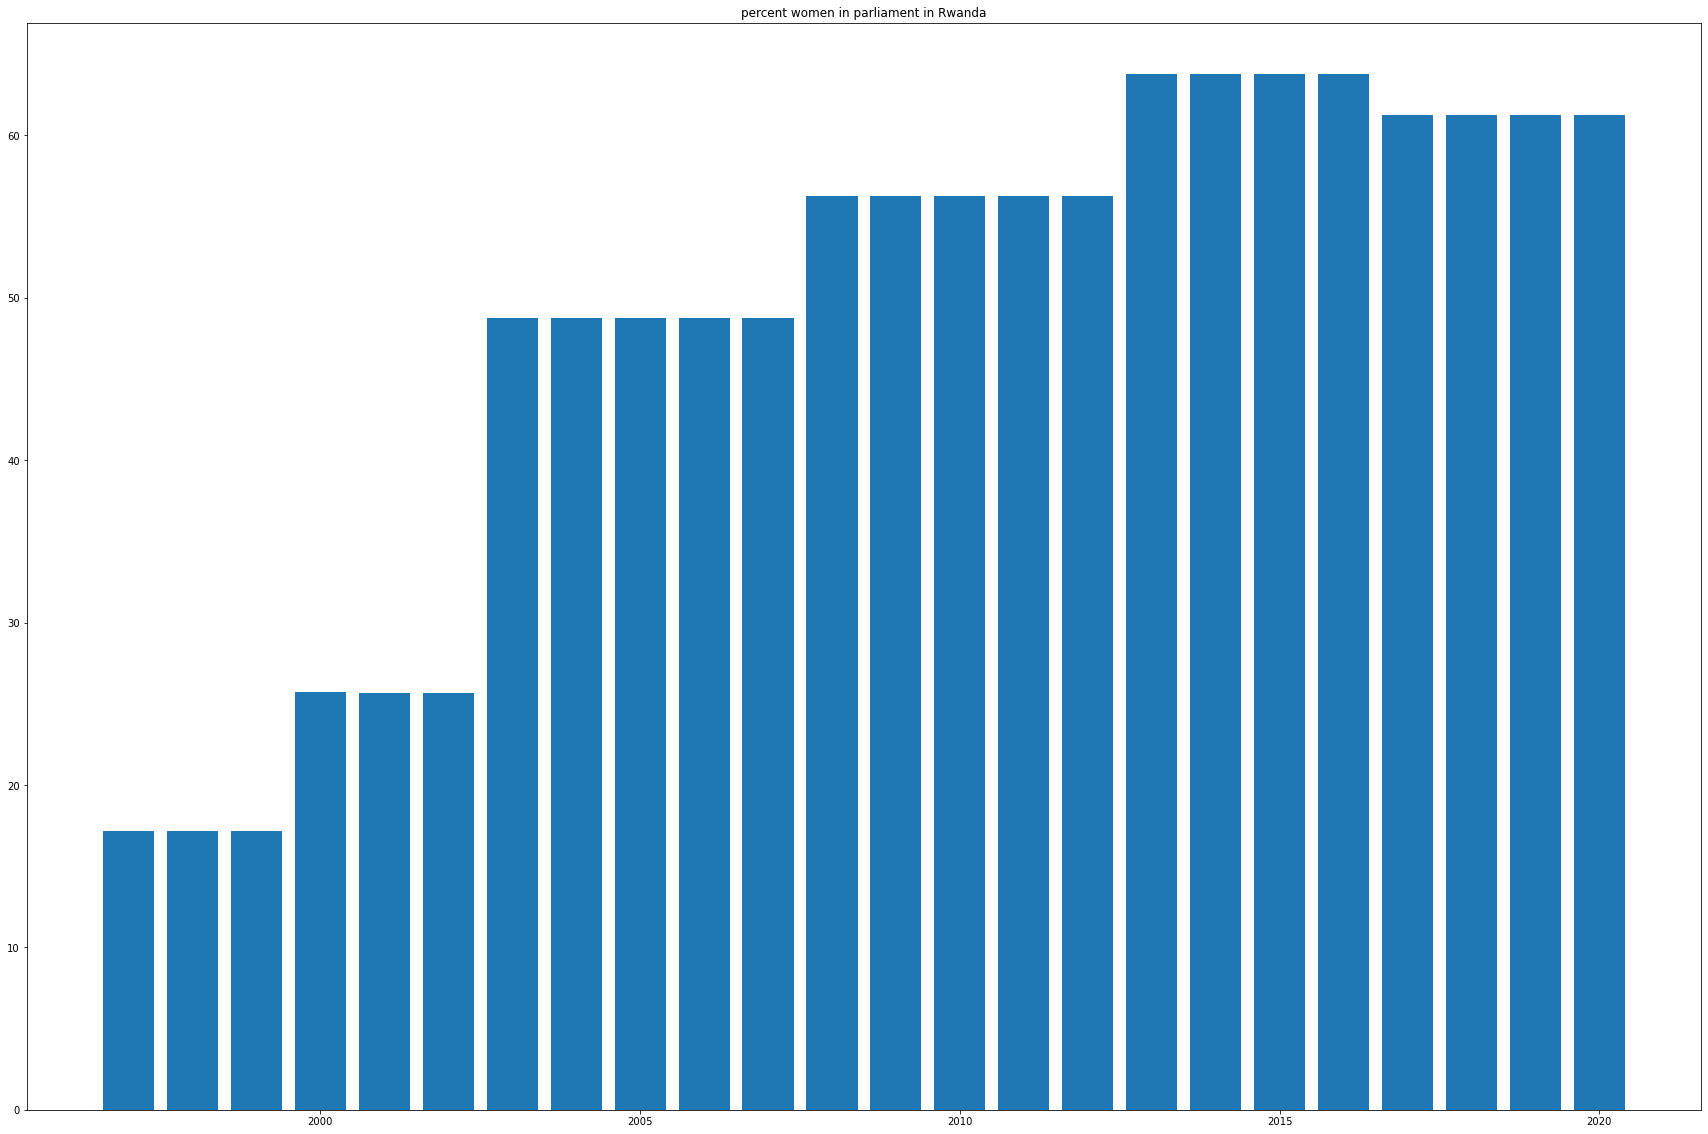

In [566]:
b= input("input a country ")

country_choice= df.loc[(df["Country"]==b)]

plt.bar(country_choice["Year"], country_choice["Women in parliament percent"])
plt.title("percent women in parliament in " + str(b))
plt.show()



In [441]:
women= df[["Year","Women in parliament percent"]].groupby(by="Year").agg("mean")
women
women2= women.reset_index()

### on average, more women are joining parliaments globally

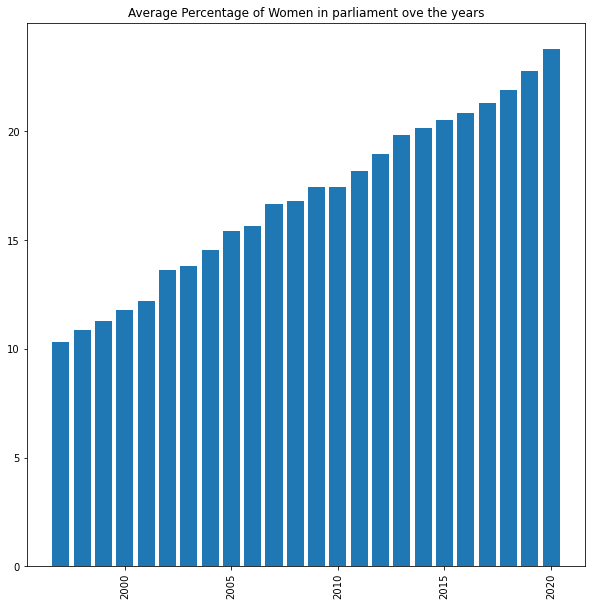

In [447]:
from matplotlib.pyplot import figure
plt.bar(women2["Year"], women2["Women in parliament percent"])

plt.title("Average Percentage of Women in parliament ove the years")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [446]:
import matplotlib.pyplot as plt

In [81]:
df_women_in_parliment= df_2020[["Country", "Women in parliament percent"]].sort_values(by = "Women in parliament percent")



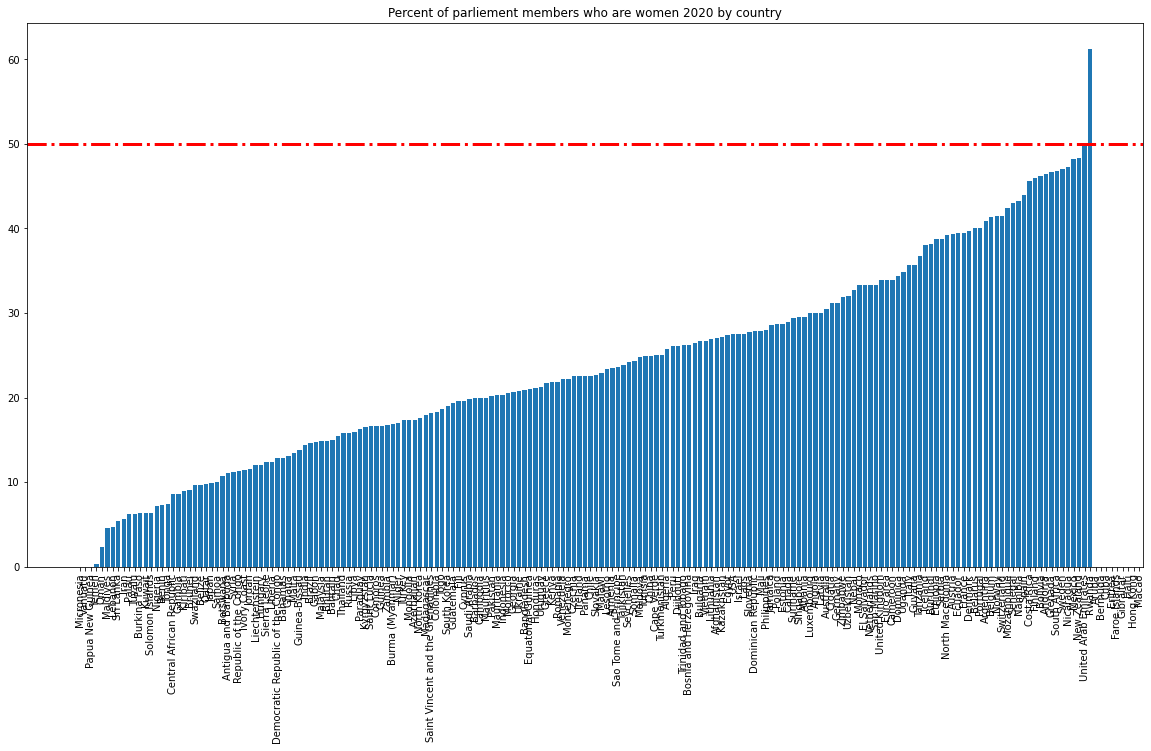

In [604]:
from matplotlib.pyplot import figure
plt.bar(df_women_in_parliment["Country"], df_women_in_parliment["Women in parliament percent"])

plt.title("Percent of parliement members who are women 2020 by country")
plt.xticks(rotation = 90)
plt.axhline(y=50, xmin=0, xmax=1, color='r', linestyle='-.', linewidth=3)
plt.rcParams['figure.figsize'] = (20,10)
plt.show()

In [601]:
df_2021= df.loc[(df["Year"]==2021)]
df_2021

,Country,Code,ContinentCode,Year,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,...,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military,imports_greater_than_exports
61,Afghanistan,AFG,AS,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.40,NaN,NaN,NaN,NaN,0.5
123,Albania,ALB,EU,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.20,NaN,NaN,NaN,NaN,0.5
185,Algeria,DZA,AF,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.12,NaN,NaN,NaN,NaN,0.5
430,Argentina,ARG,SA,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.97,NaN,NaN,NaN,NaN,0.5
492,Armenia,ARM,AS,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.40,NaN,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11991,Venezuela,VEN,SA,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.93,NaN,NaN,NaN,NaN,0.5
12053,Vietnam,VNM,AS,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.49,NaN,NaN,NaN,NaN,0.5
12115,Yemen,YEM,AS,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.20,NaN,NaN,NaN,NaN,0.5
12177,Zambia,ZMB,AF,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,NaN,0.5


## Here we take a look at the Gini Happiness Index

In [95]:
df_2021["Happiness Index 0 (unhappy) - 10 (happy)"].max()

7.82

In [96]:
df_2021["Happiness Index 0 (unhappy) - 10 (happy)"].min()

2.4

In [99]:
df_happy_2020= df_2021[["Country", "Happiness Index 0 (unhappy) - 10 (happy)"]].sort_values(by="Happiness Index 0 (unhappy) - 10 (happy)")
df_happy_2020


,Country,Happiness Index 0 (unhappy) - 10 (happy)
61,Afghanistan,2.40
6079,Lebanon,2.96
12239,Zimbabwe,3.00
9236,Rwanda,3.27
1540,Botswana,3.47
...,...,...
7725,Netherlands,7.41
10714,Switzerland,7.51
4902,Iceland,7.56
2930,Denmark,7.64


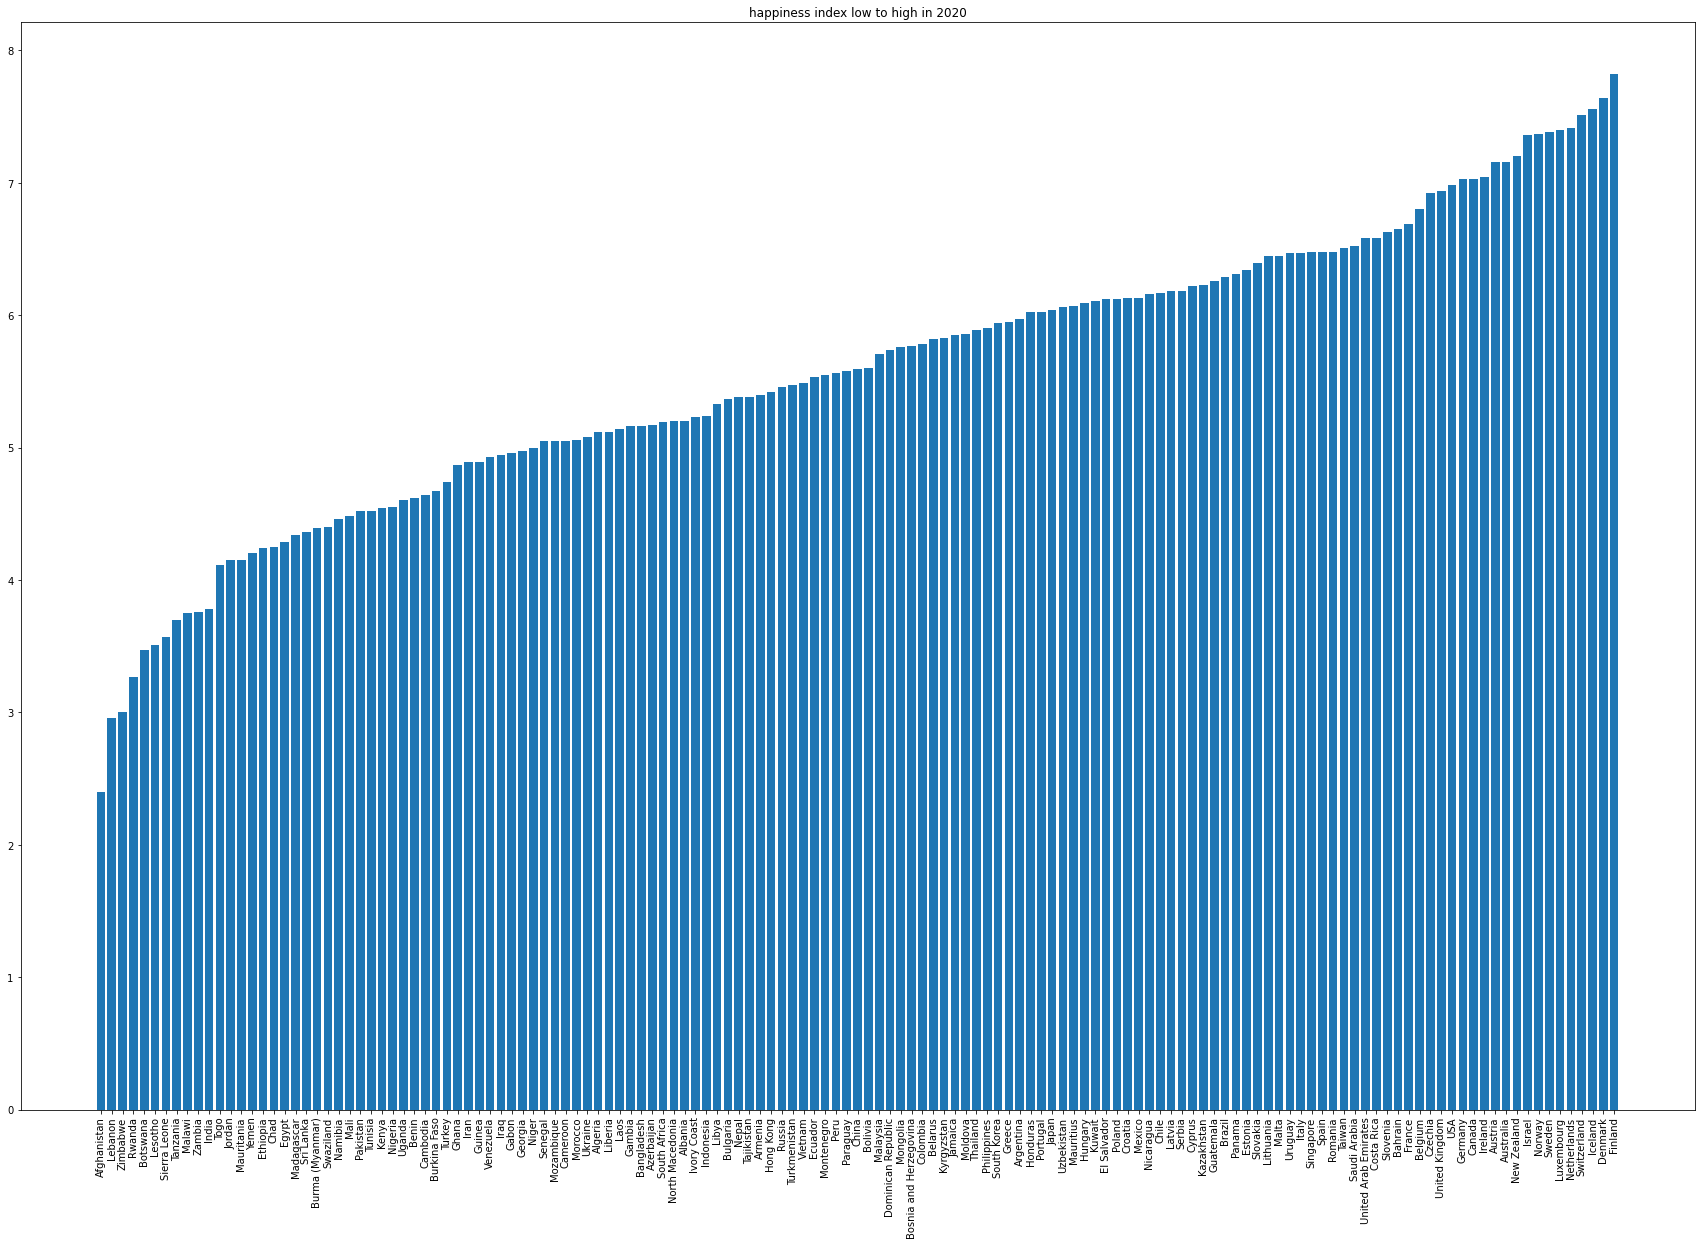

In [452]:
plt.bar(df_happy_2020["Country"], df_happy_2020["Happiness Index 0 (unhappy) - 10 (happy)"])

plt.title("happiness index low to high in 2020")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (30,20)
plt.show()

In [102]:
df_happy_2020.loc[(df_happy_2020["Country"]=="USA")]

,Country,Happiness Index 0 (unhappy) - 10 (happy)
11806,USA,6.98


In [104]:
df["Happiness Index 0 (unhappy) - 10 (happy)"].mean()

5.435896580483744

In [105]:
df_happy_2020["Happiness Index 0 (unhappy) - 10 (happy)"].mean()

5.565460992907801

In [108]:
df_happy_military = df[["Country", "Armed forces personnel percent of the labor force", "Happiness Index 0 (unhappy) - 10 (happy)"]]
df_happy_military= df_happy_military.dropna()
df_happy_military


,Country,Armed forces personnel percent of the labor force,Happiness Index 0 (unhappy) - 10 (happy)
53,Afghanistan,4.06,4.04
55,Afghanistan,3.57,3.58
56,Afghanistan,3.47,3.36
57,Afghanistan,3.34,3.79
58,Afghanistan,2.72,3.63
...,...,...,...
12233,Zimbabwe,0.76,4.61
12234,Zimbabwe,0.75,4.19
12235,Zimbabwe,0.74,3.88
12236,Zimbabwe,0.73,3.69


In [558]:
df_happy_spending = df[["Country", "Military spending percent of total government spending ", "Happiness Index 0 (unhappy) - 10 (happy)"]]
df_happy_spending = df_happy_spending .dropna()




In [559]:
df_happy_spending2= df_2020[["Country","Military spending percent of total government spending " ]].sort_values(by="Military spending percent of total government spending ")


## Here we look at overall military spending

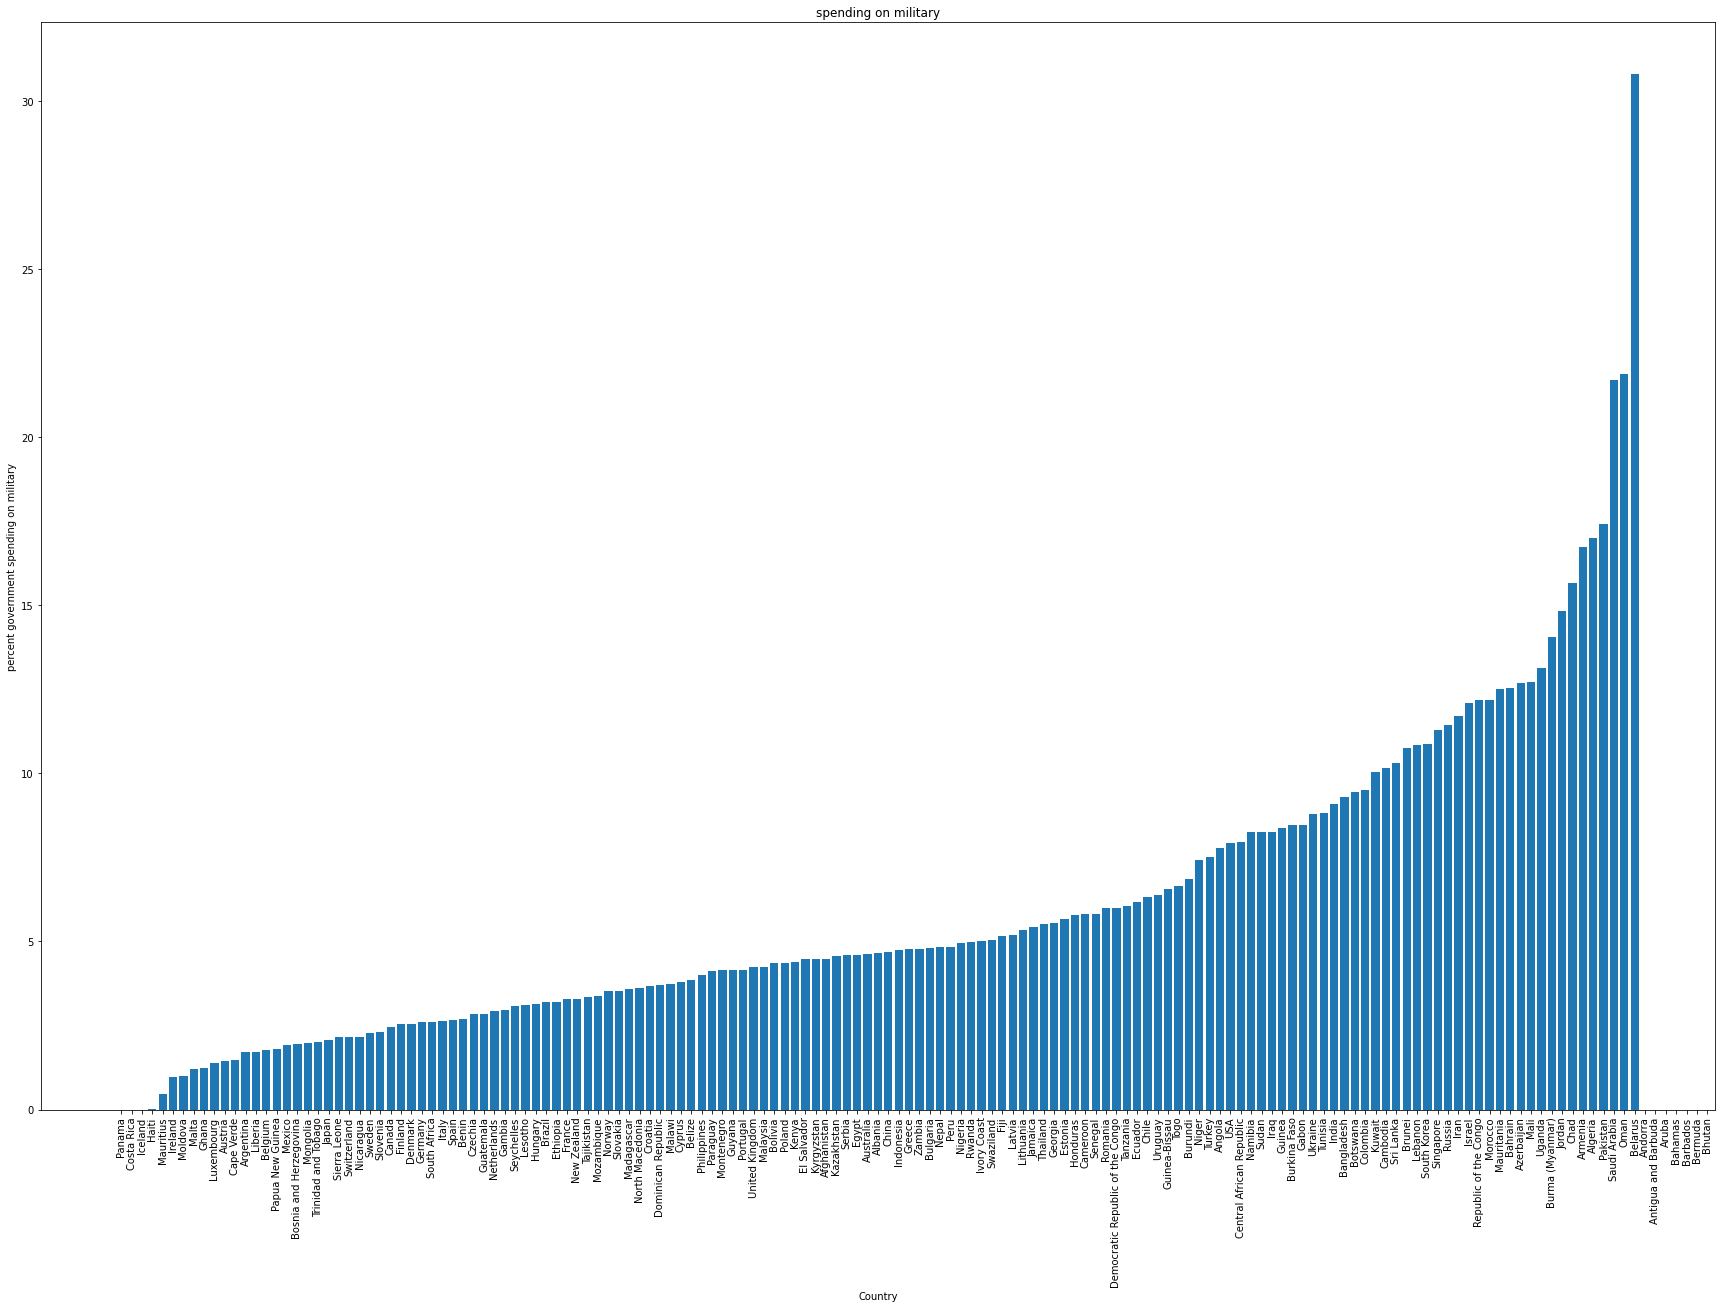

In [123]:

plt.bar(df_happy_spending2["Country"], df_happy_spending2["Military spending percent of total government spending "])

plt.xlabel("Country")
plt.ylabel("percent government spending on military")
plt.title("spending on military")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (30,20)
plt.show()

In [125]:
df_GDP_military = df_2020[["Country", "Military spending percent of GDP", "Military spending in billion U.S. dollars"]]
df_GDP_military

,Country,Military spending percent of GDP,Military spending in billion U.S. dollars
60,Afghanistan,1.37,0.28
122,Albania,1.54,0.22
184,Algeria,6.66,9.71
246,Andorra,NaN,NaN
307,Angola,1.62,0.99
...,...,...,...
11990,Venezuela,NaN,NaN
12052,Vietnam,NaN,NaN
12114,Yemen,NaN,NaN
12176,Zambia,1.15,0.21


In [128]:
df_GDP_military2= df_GDP_military.sort_values(by="Military spending percent of GDP")


Country                                      Zimbabwe
Military spending percent of GDP                10.87
Military spending in billion U.S. dollars      778.23
dtype: object

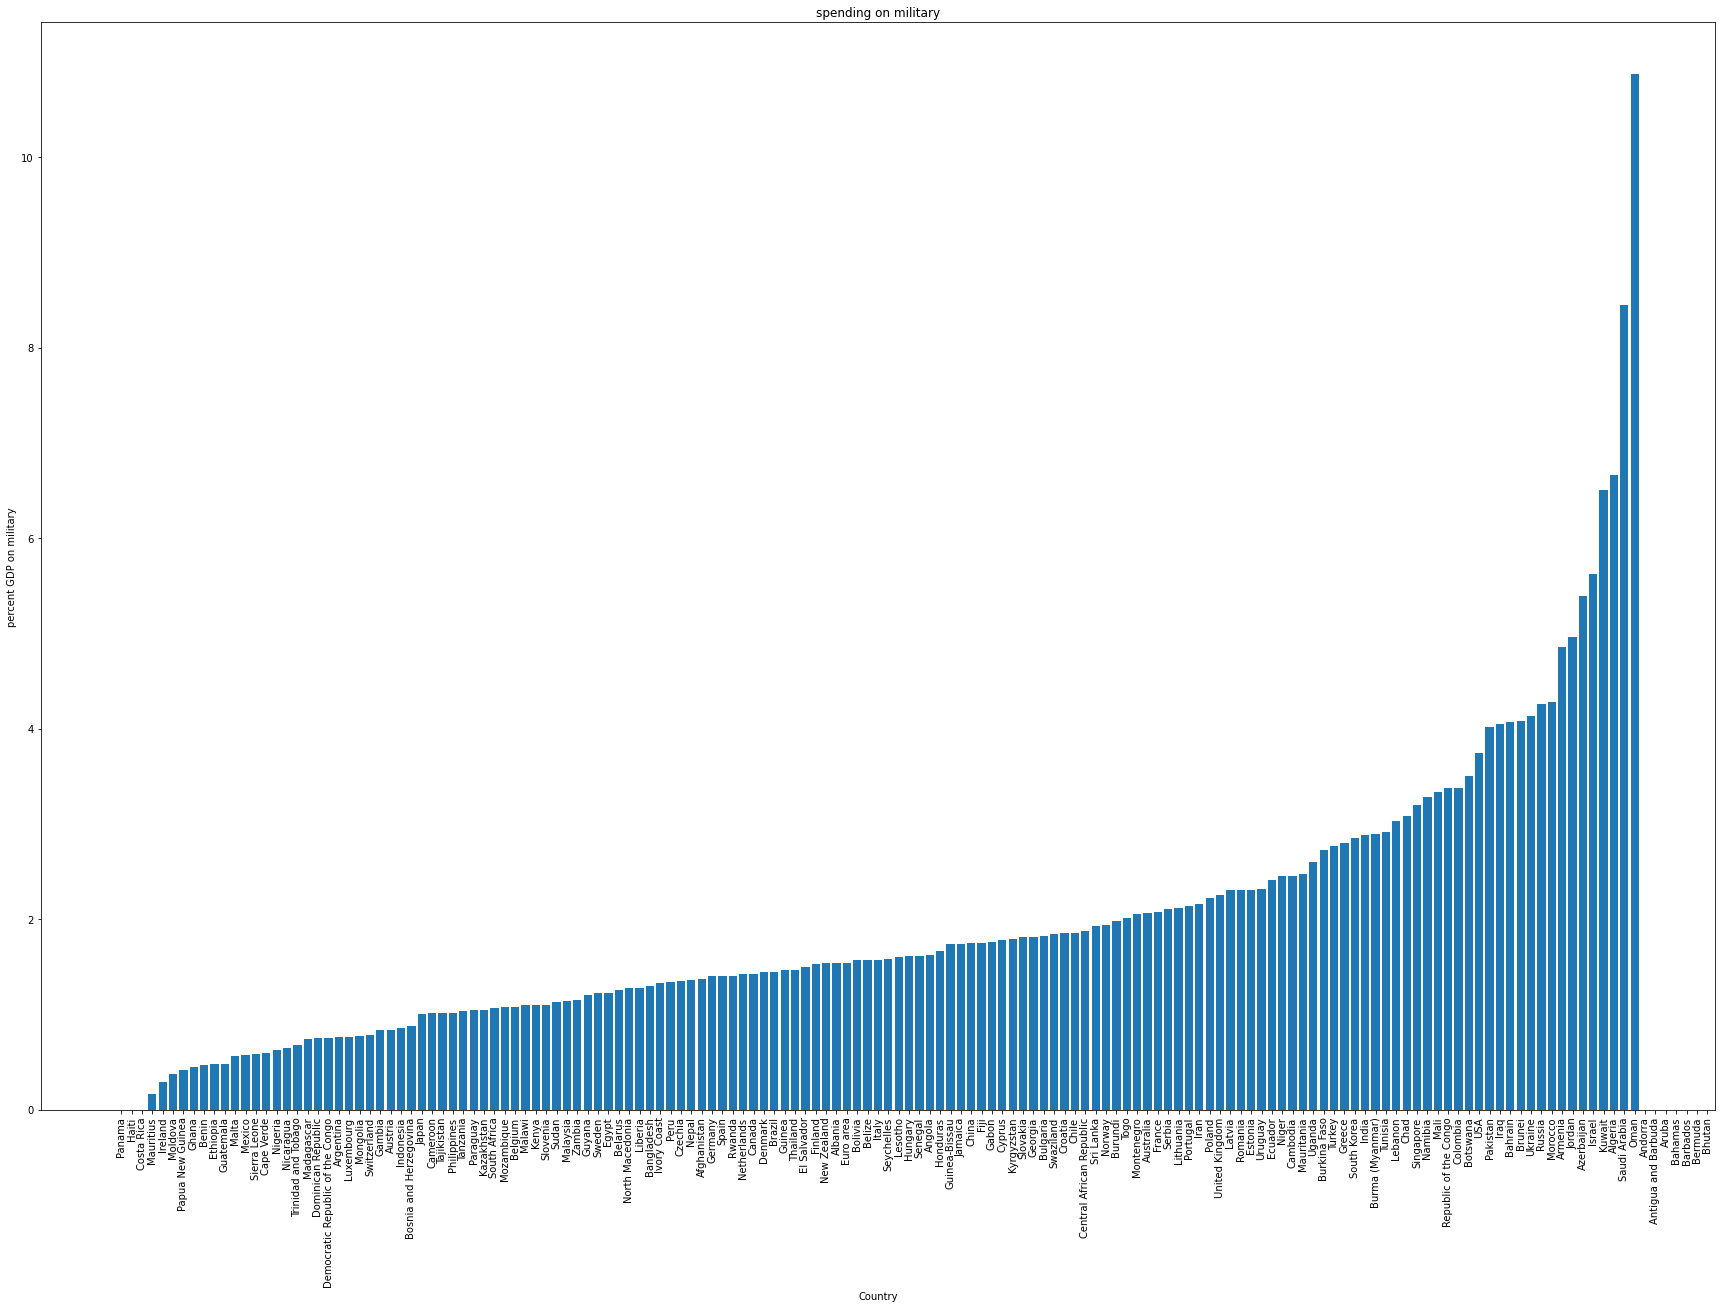

In [129]:

plt.bar(df_GDP_military2["Country"], df_GDP_military2["Military spending percent of GDP"])

plt.xlabel("Country")
plt.ylabel("percent GDP on military")
plt.title("spending on military")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (30,20)
plt.show()

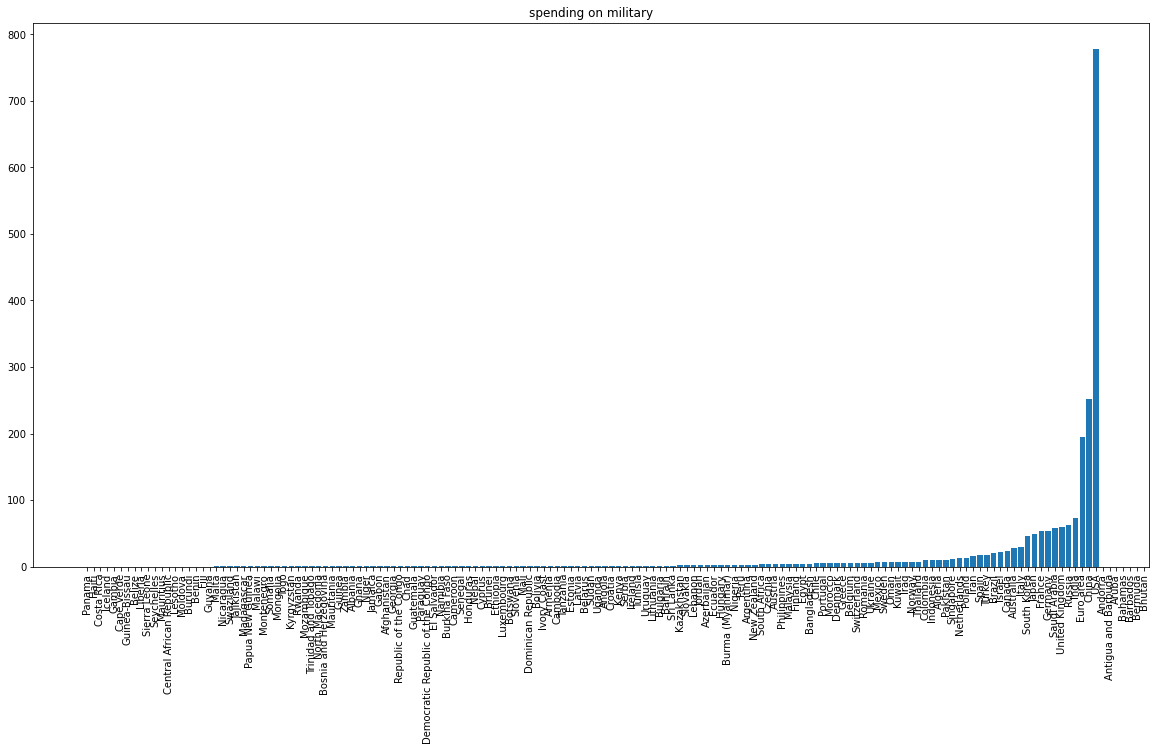

In [608]:
df_GDP_military3= df_GDP_military2.sort_values(by="Military spending in billion U.S. dollars")

plt.bar(df_GDP_military3["Country"], df_GDP_military3["Military spending in billion U.S. dollars"])


plt.title("spending on military")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

# a quick look at populaiton growth ove the years

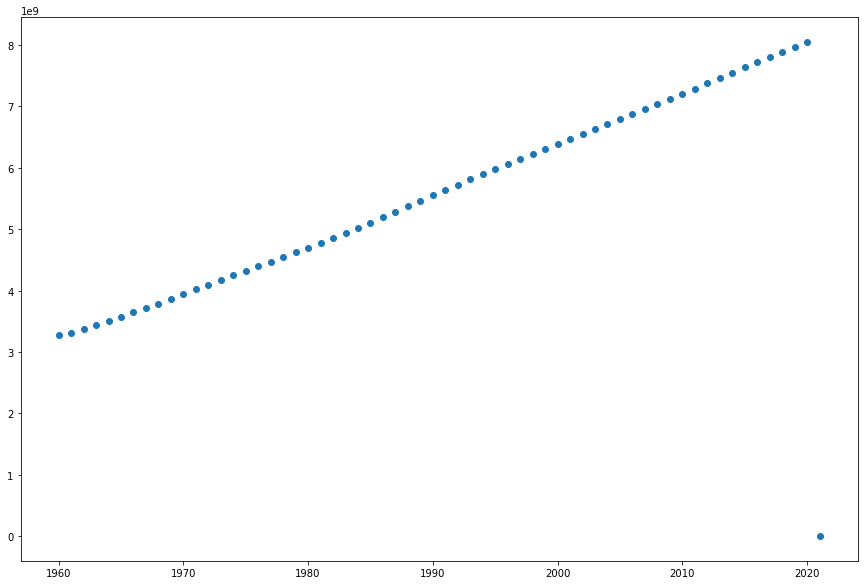

In [165]:
population= df[["Population", "Year"]].groupby(by="Year").sum()

population2= population.reset_index(drop= False)

population2.head()


x= population2["Year"]
y= population2["Population"]

plt.scatter(x,y)

r-squared = 0.6055500584306922


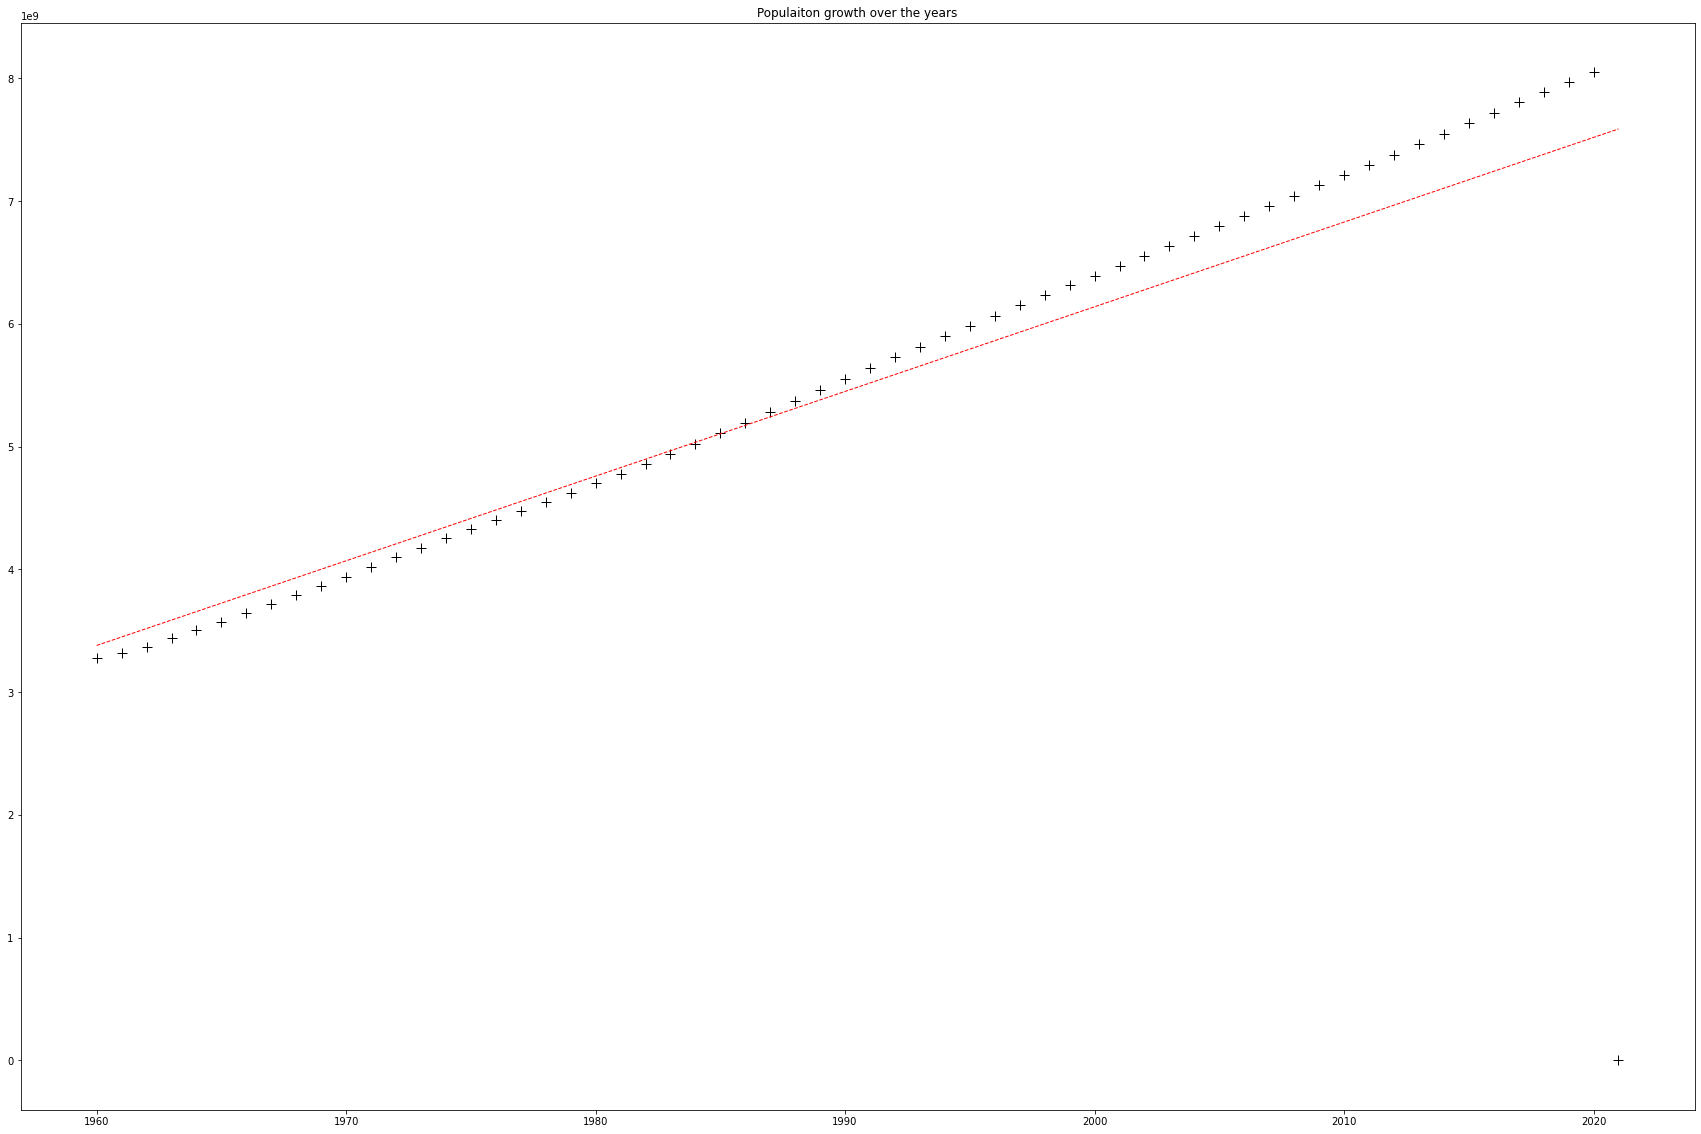

In [461]:
from sklearn.metrics import r2_score
x= population2["Year"]
y= population2["Population"]

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.title("Populaiton growth over the years")

corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq2 = corr**2
 
print("r-squared = " + str(R_sq2))
plt.plot(x, y_hat, "r--", lw=1)

In [456]:
df_2019= df.loc[(df["Year"]==2019)]


In [457]:
df_2018= df.loc[(df["Year"]==2018)]


In [458]:
df_2018_clean = df_2018.dropna()
 

## the relationship between women in parliament and Gini happiness index for 2019 - the rsquared value is .477, meanign there's a strong correlation. This implies that people in societies with greater gender equity are on average happier

r-squared = 0.4774699384638195


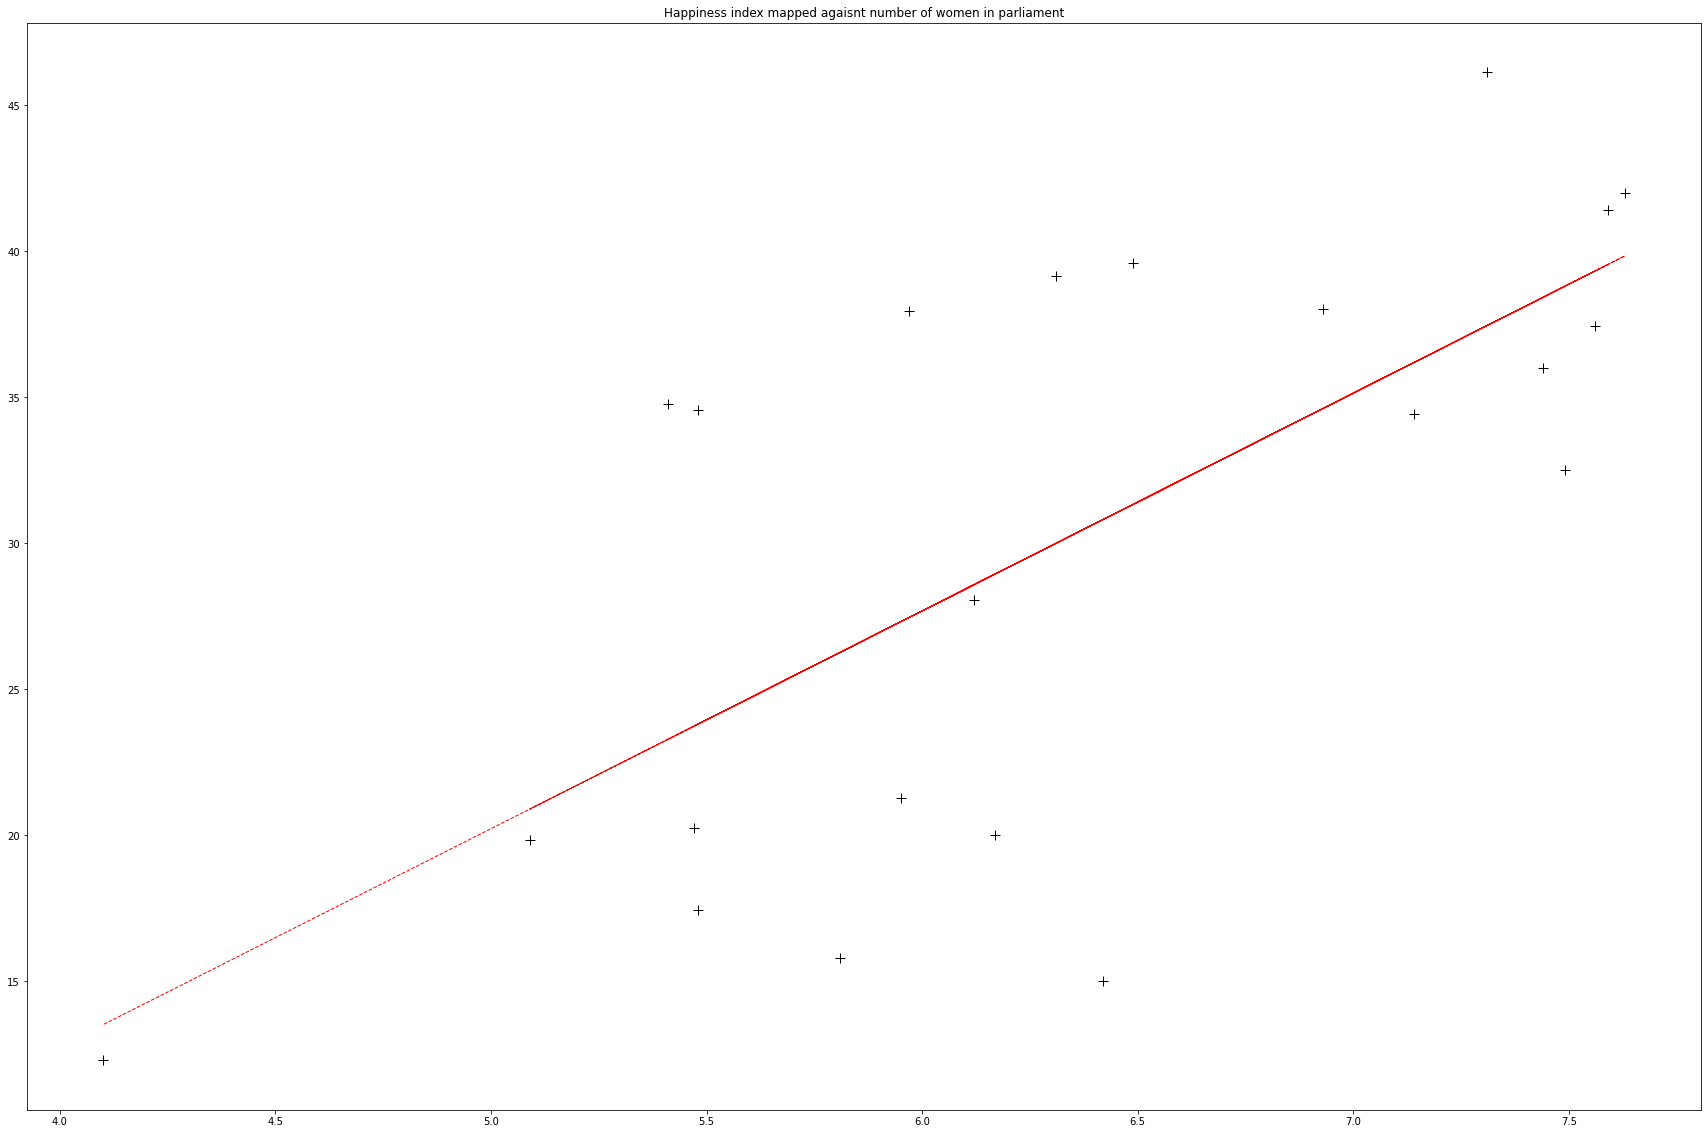

In [462]:
x= df_2018_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
y= df_2018_clean["Women in parliament percent"]

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.title("Happiness index mapped agaisnt number of women in parliament")

corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq2 = corr**2
 
print("r-squared = " + str(R_sq2))

plt.plot(x, y_hat, "r--", lw=1)

plt.show()

### we see that arms imports and percentage of workers in the military is inversly proportional to happiness, but the correlations are weal 


r-squared = 0.02935262366513555


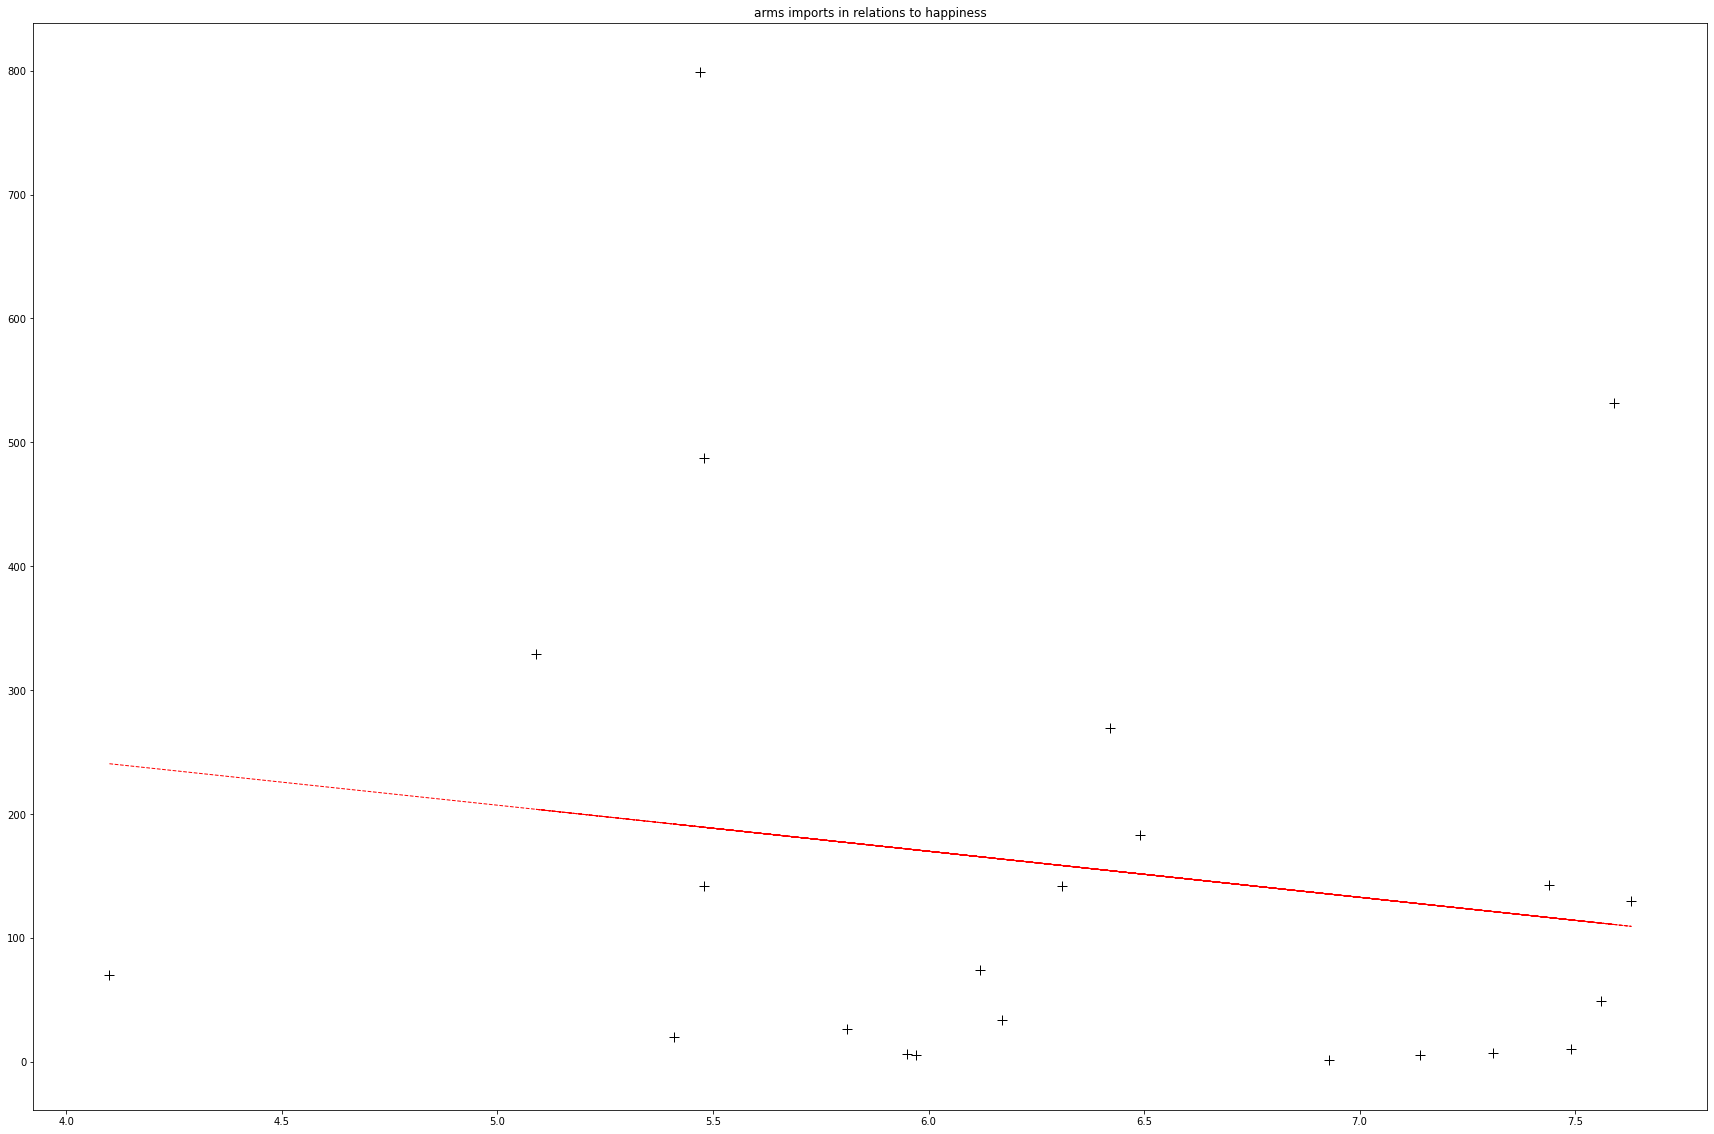

In [465]:
x= df_2018_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
y= df_2018_clean["Arms imports million constant U.S. dollars"]

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.title("arms imports in relations to happiness")

corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq2 = corr**2
 
print("r-squared = " + str(R_sq2))

plt.plot(x, y_hat, "r--", lw=1)

plt.show()

r-squared = 0.18117642854253801


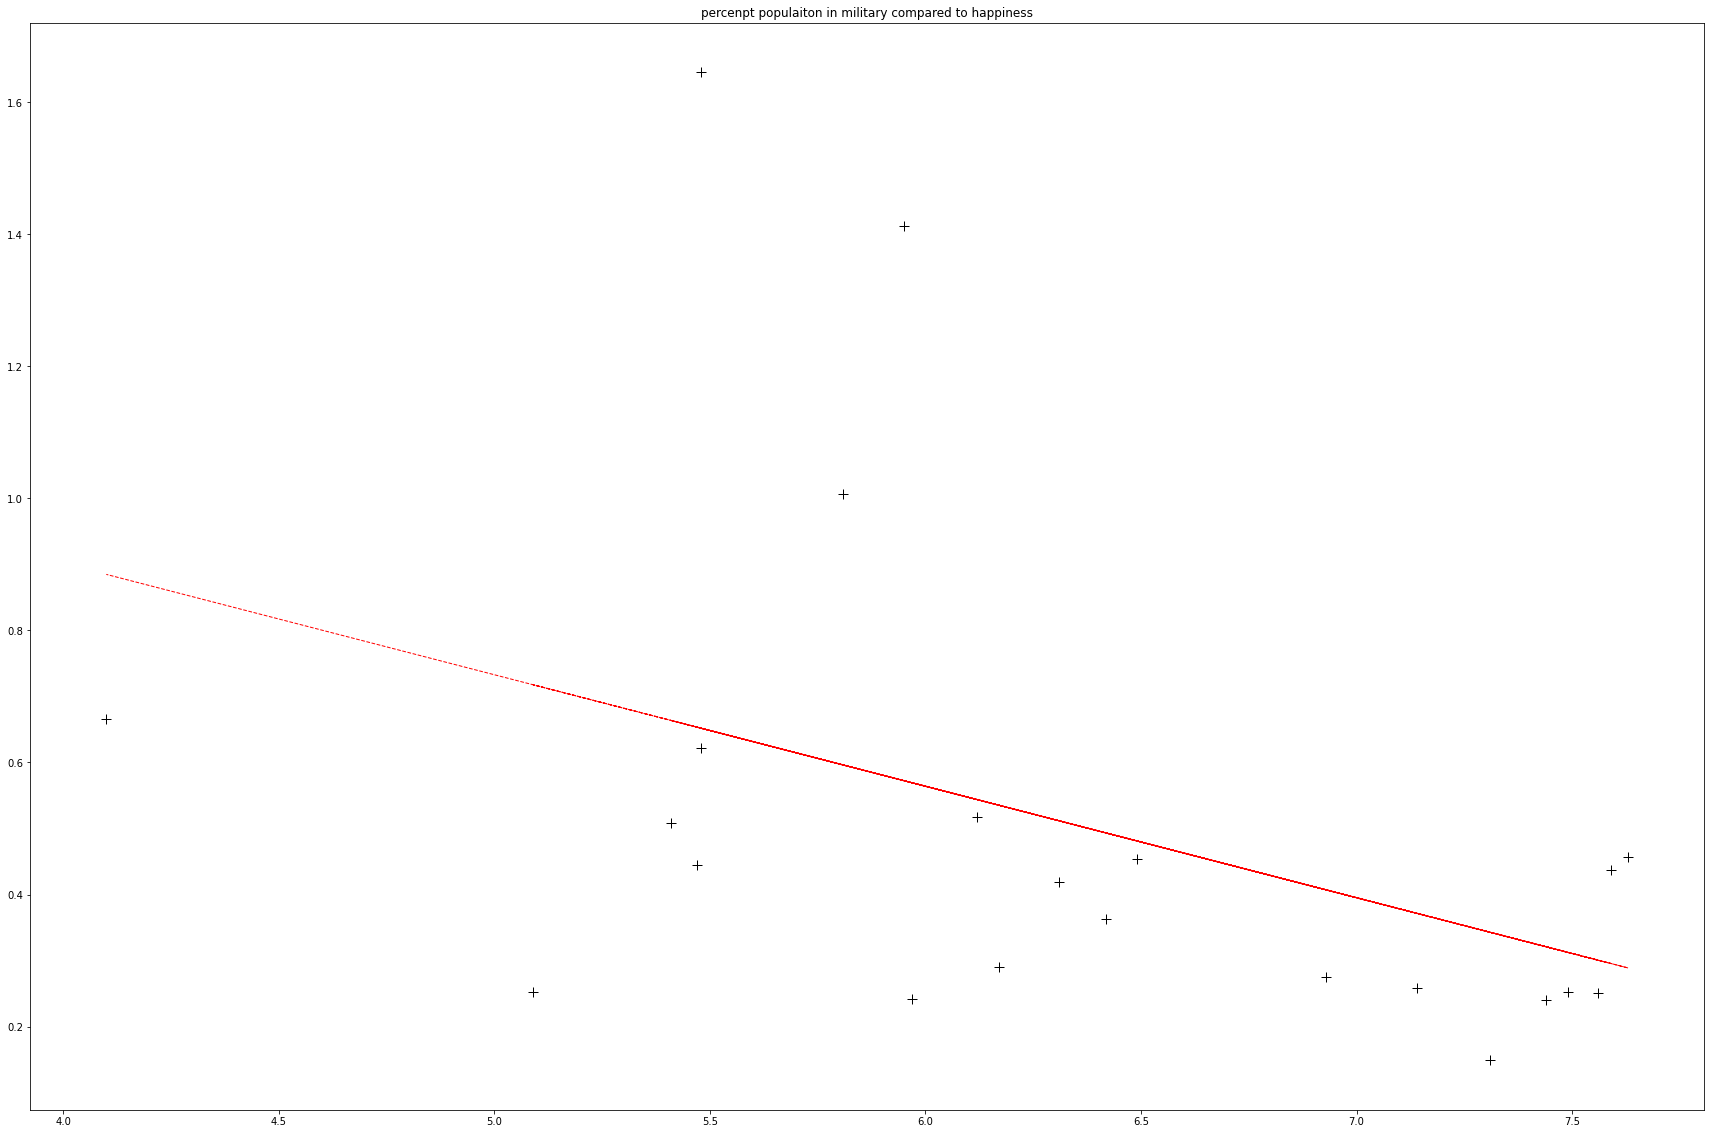

In [466]:
x= df_2018_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
y= df_2018_clean["Percent Populaiton in military"]

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.title("percenpt populaiton in military compared to happiness")

plt.plot(x, y_hat, "r--", lw=1)
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq2 = corr**2
 
print("r-squared = " + str(R_sq2))

plt.show()

### the following plots sho the relationship betwen Gini happiness index and a variety of factors. teh two most statitically significat are military spendign as percetn of government spending and as percent of GDP. The more a country spendson its military, the less happy its citizens are. 

r-squared = 0.1893252864210202


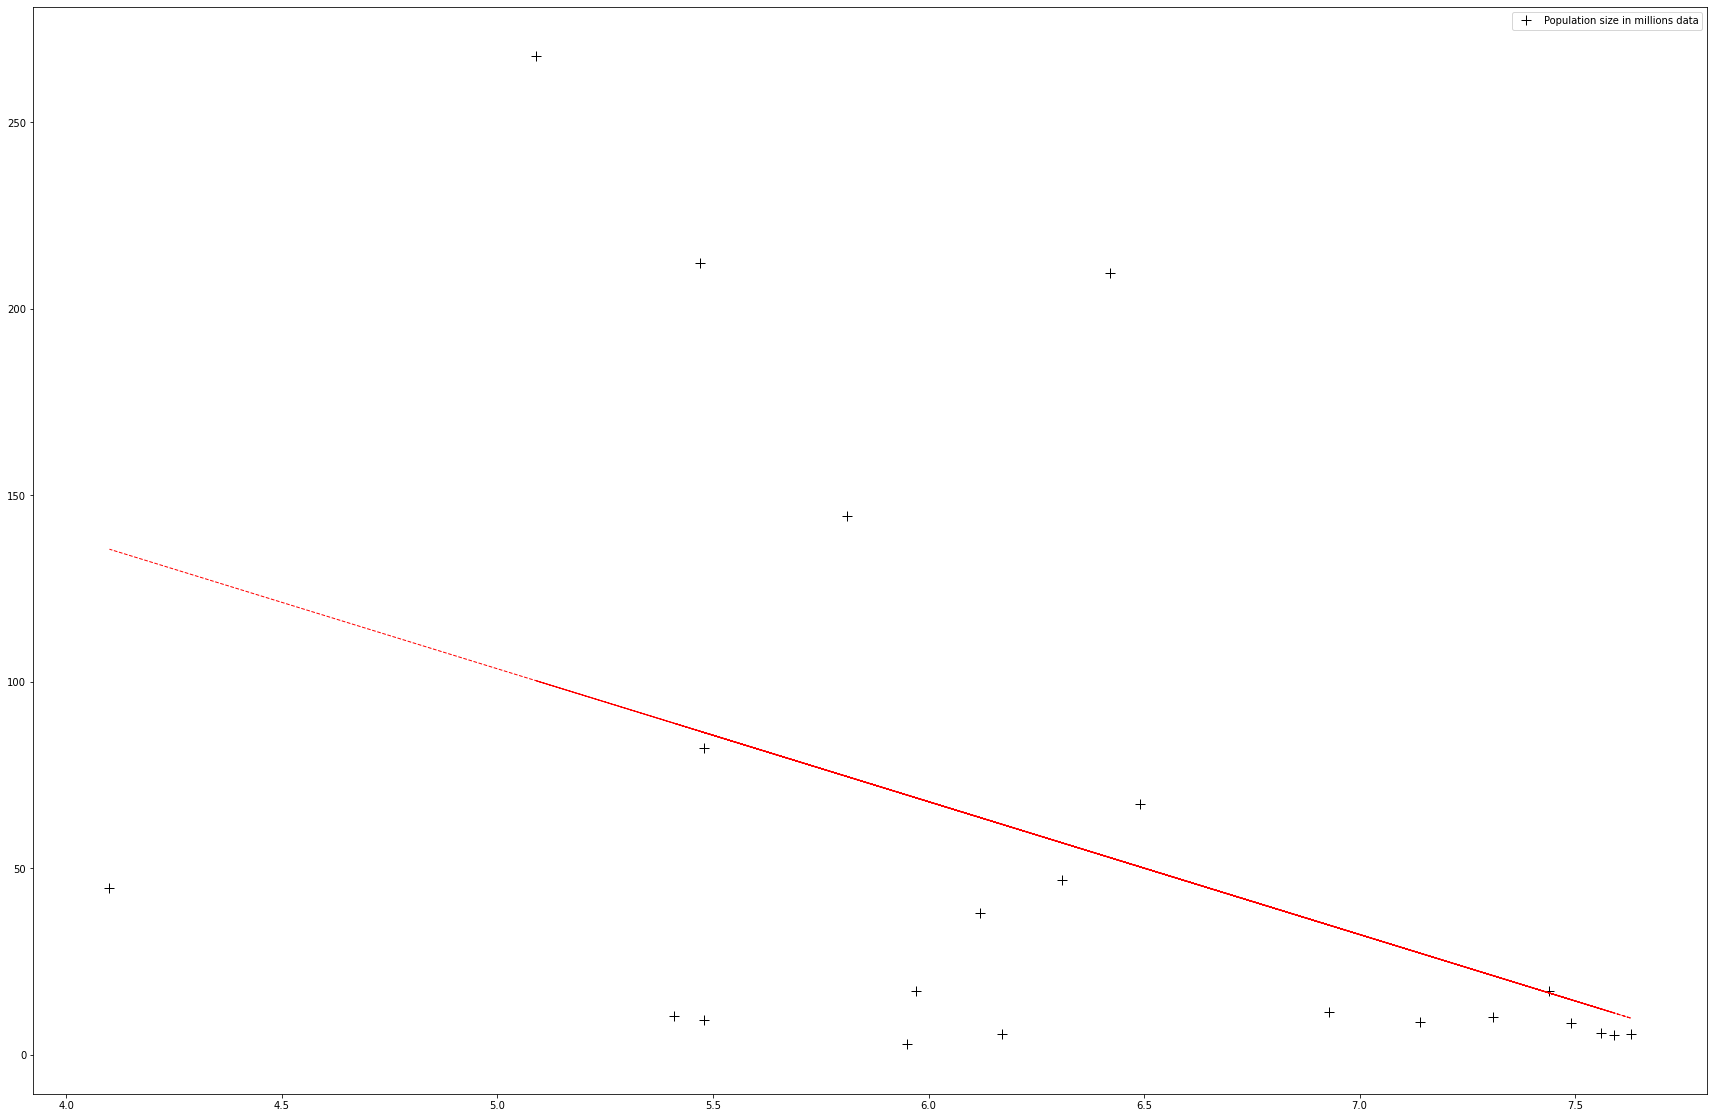

r-squared = 0.03942373772401532


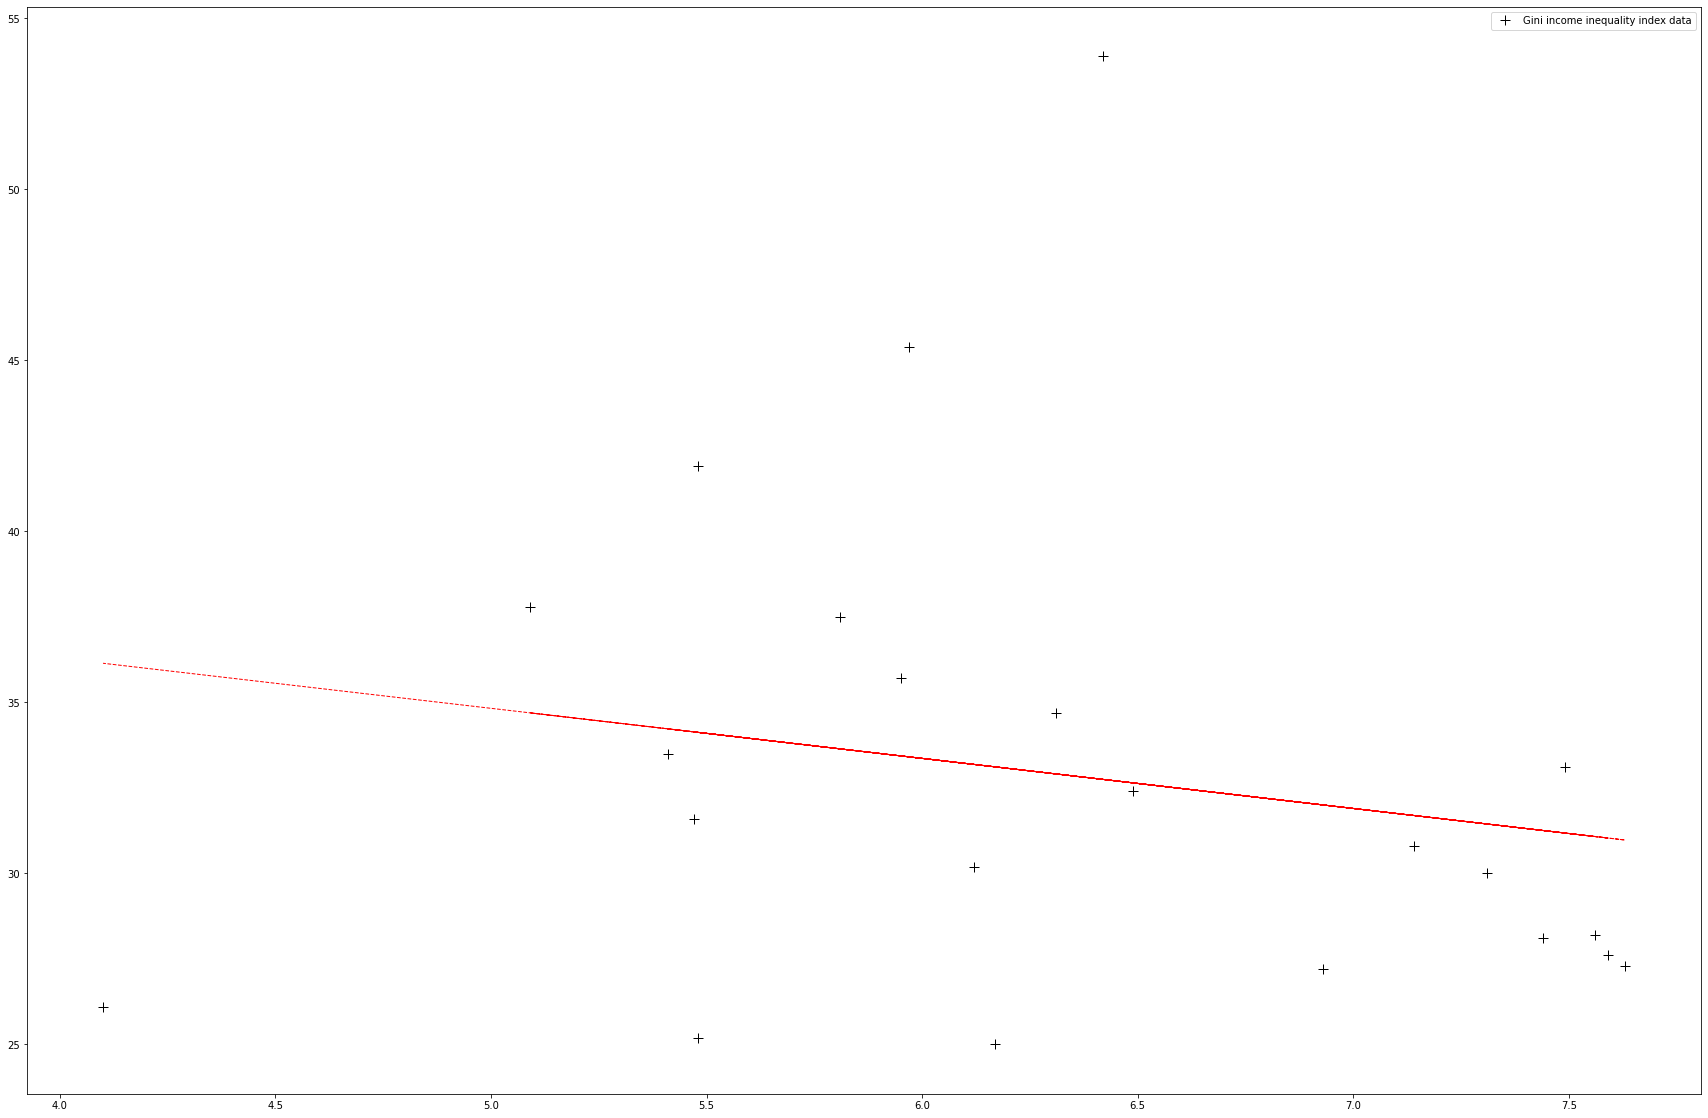

r-squared = 0.19001280308471705


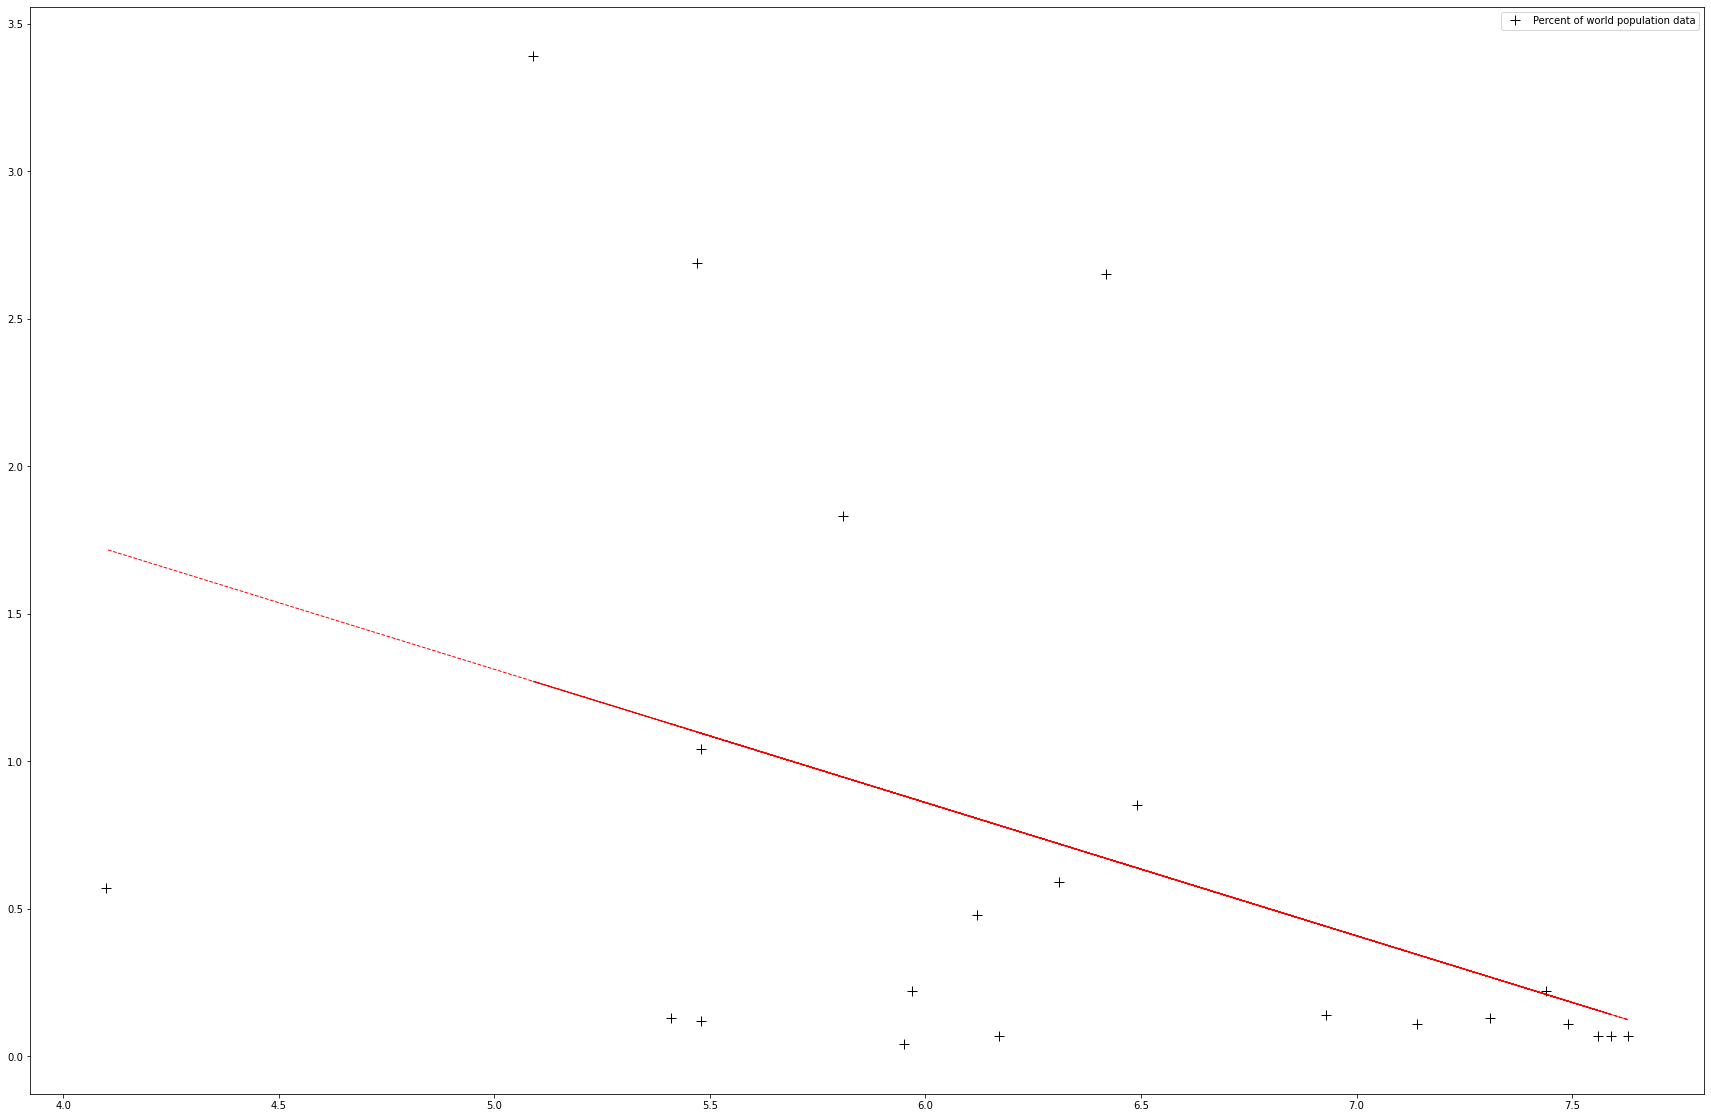

r-squared = 0.00633095152635541


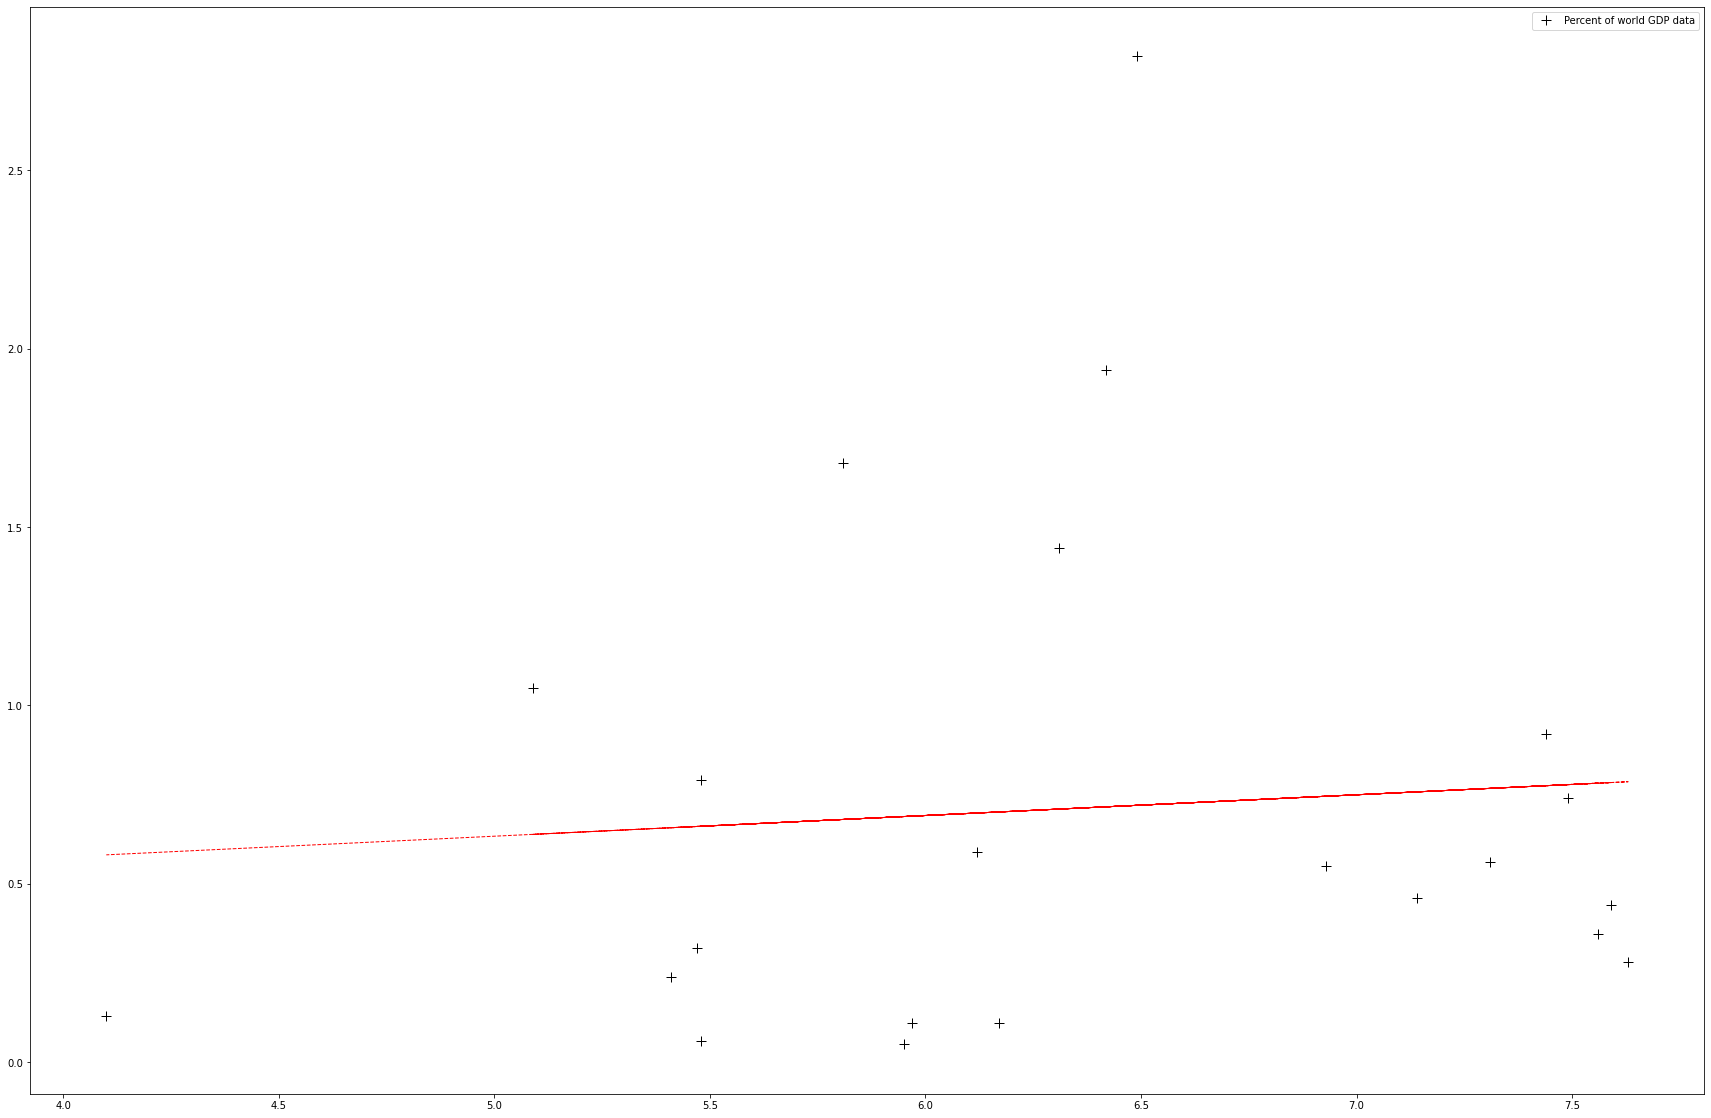

r-squared = 0.12814971078224063


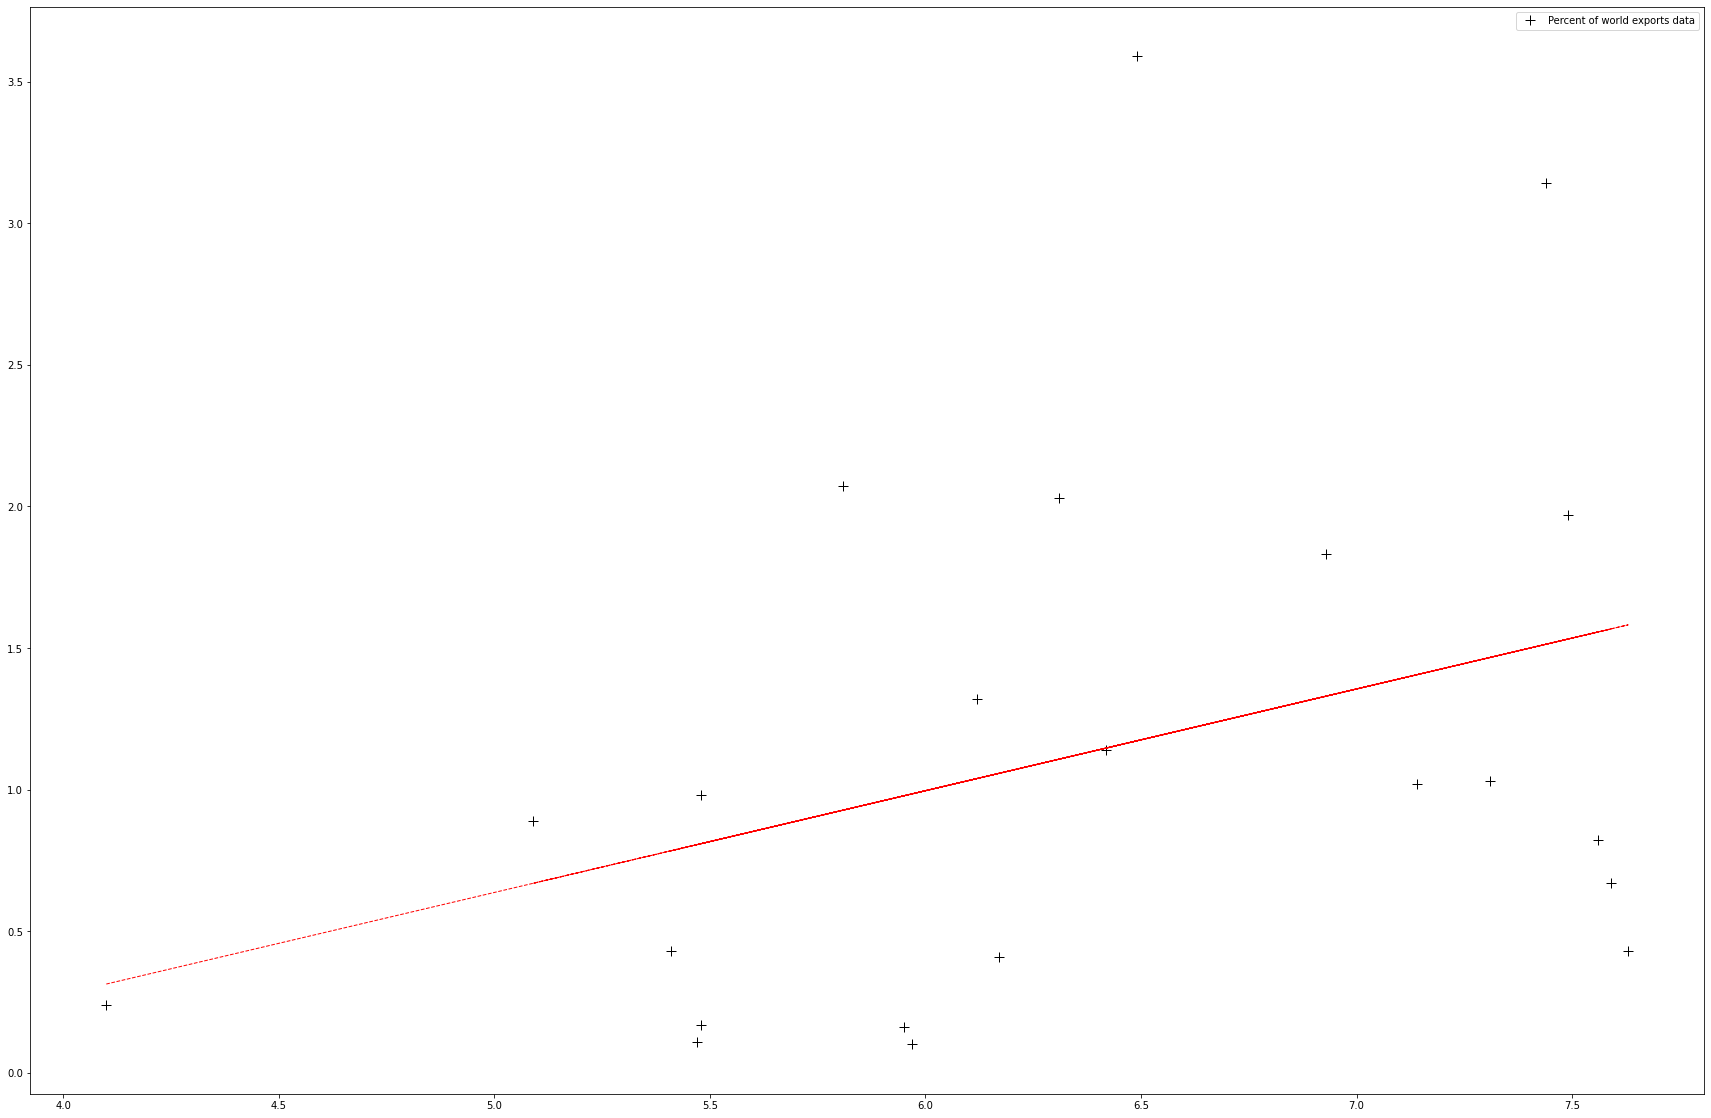

r-squared = 0.10807252073572826


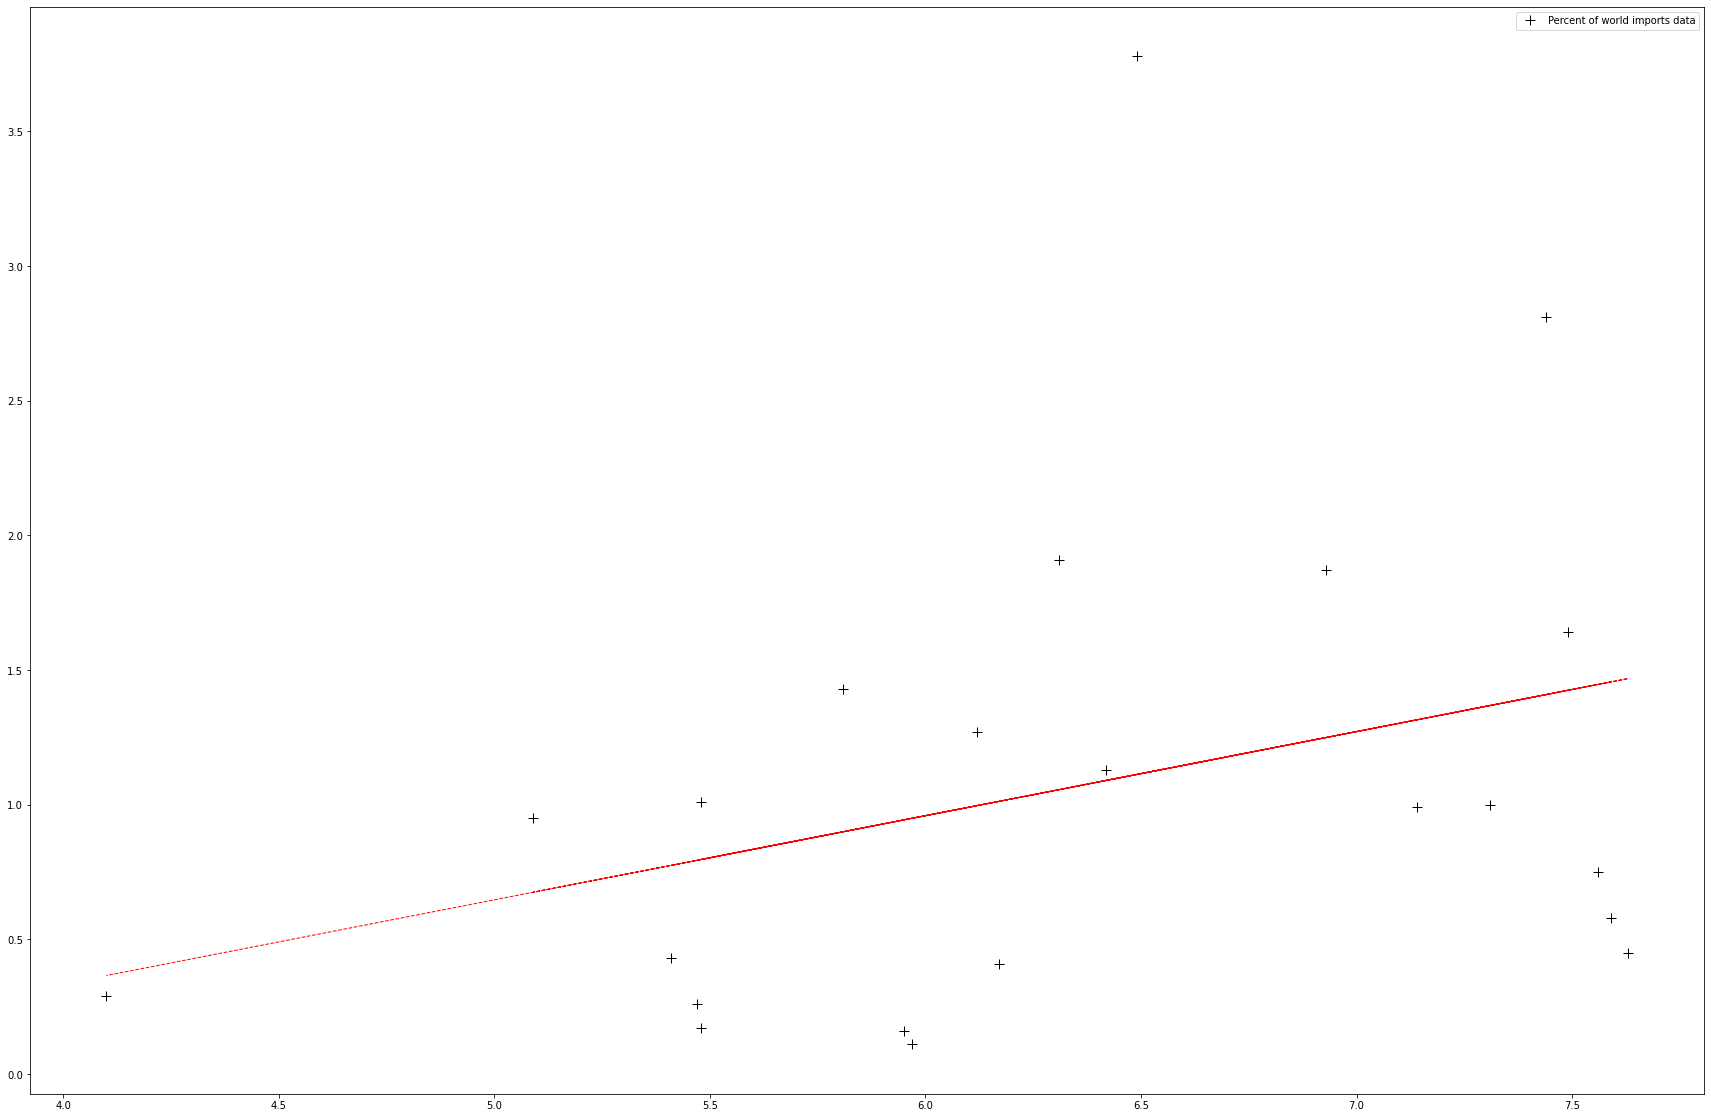

r-squared = 0.14185171219528195


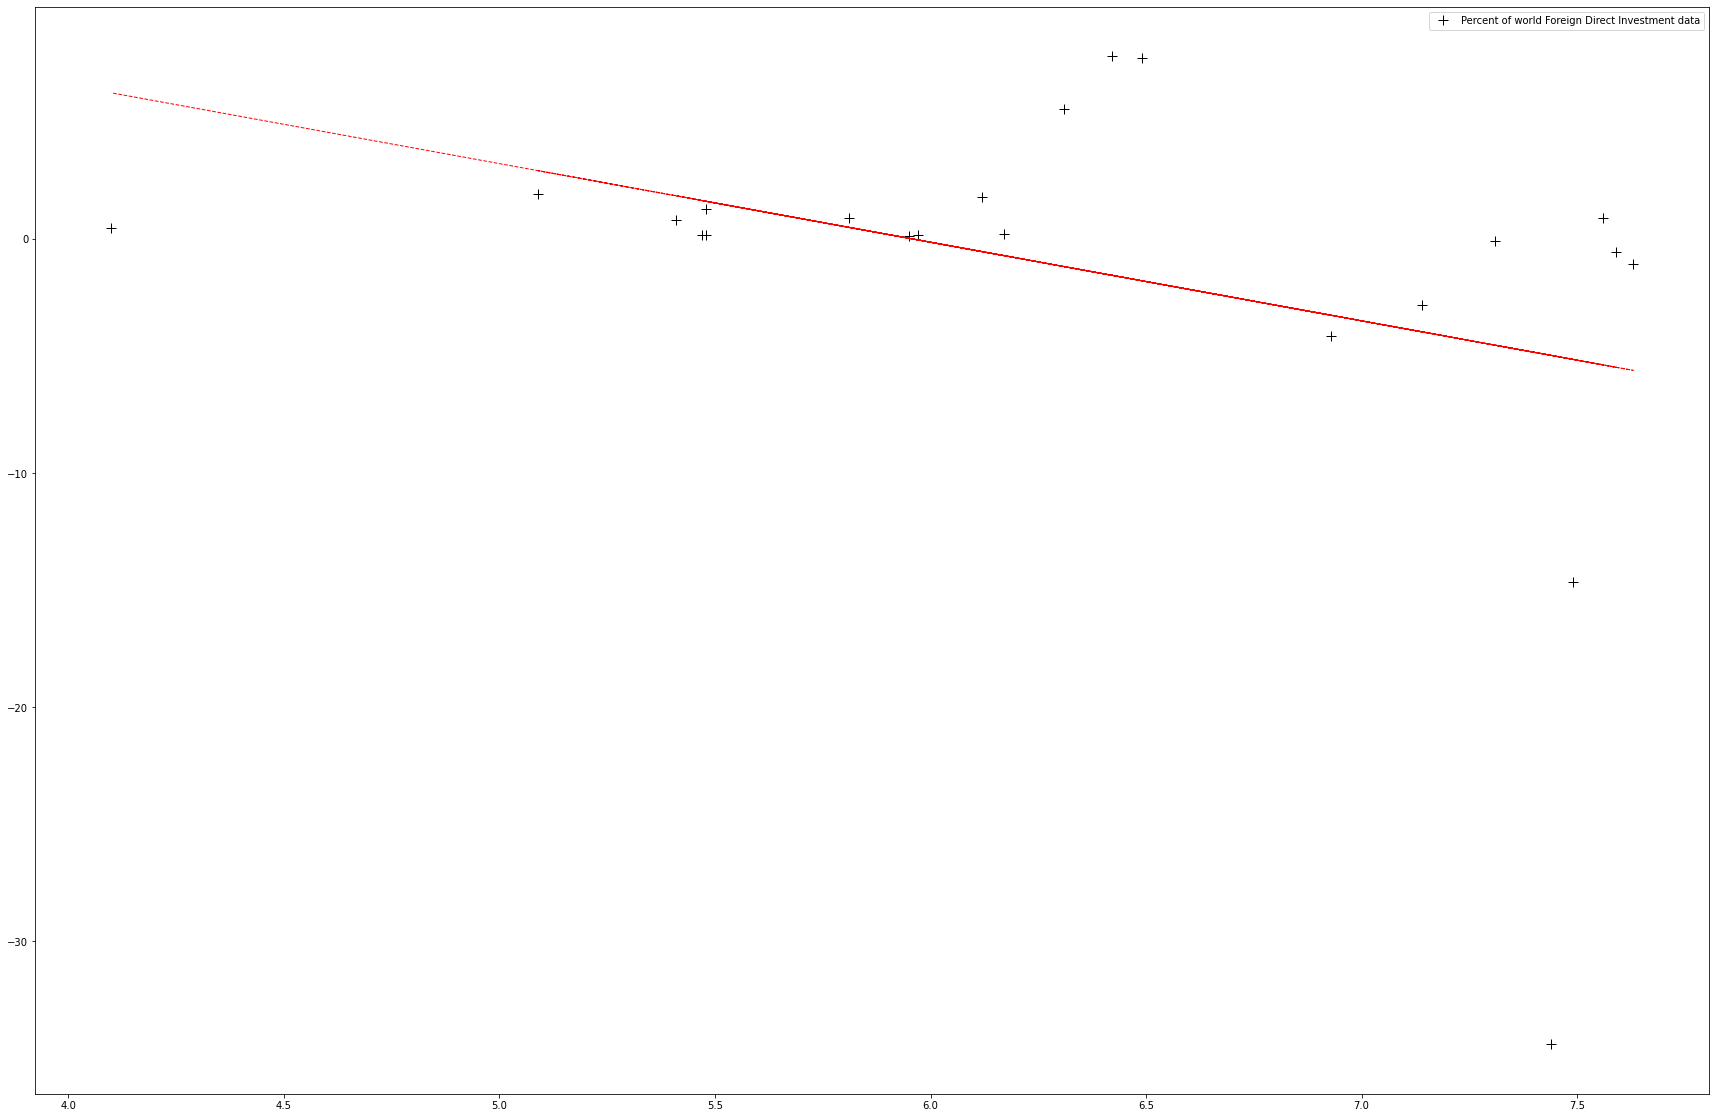

r-squared = 0.012965552913607719


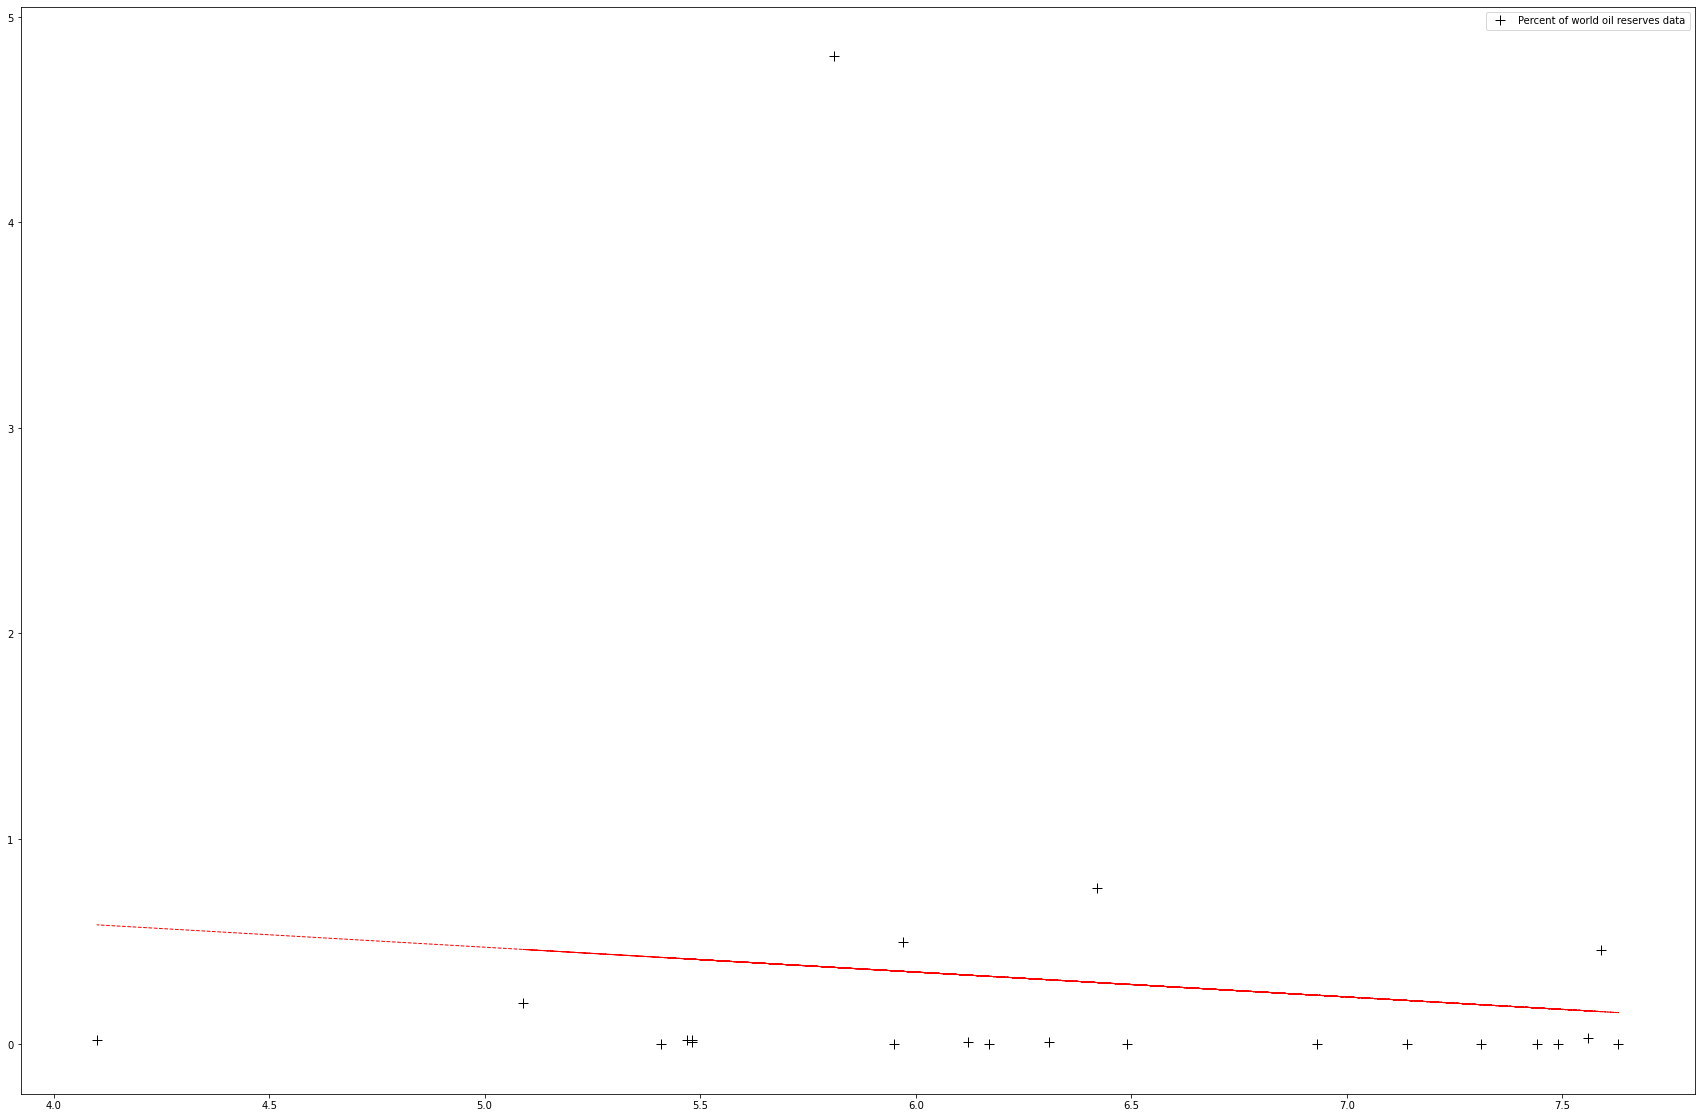

r-squared = 0.007499992531566565


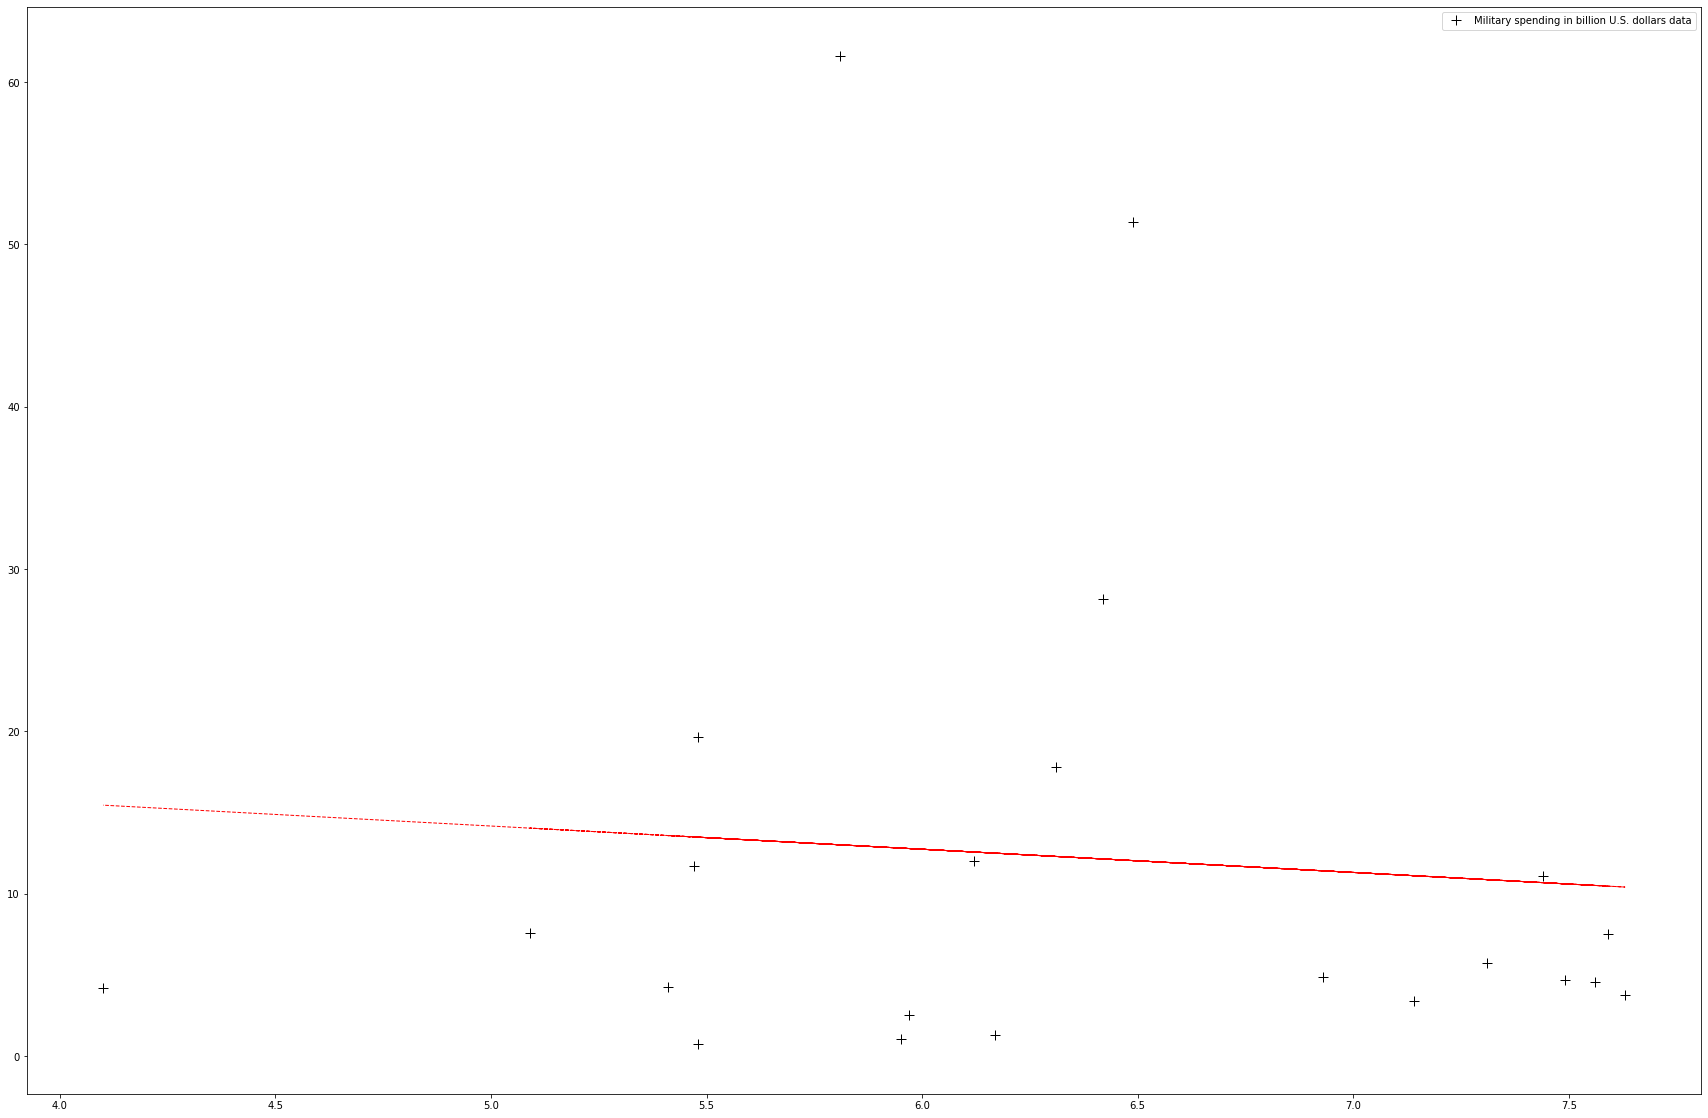

r-squared = 0.30291880459580495


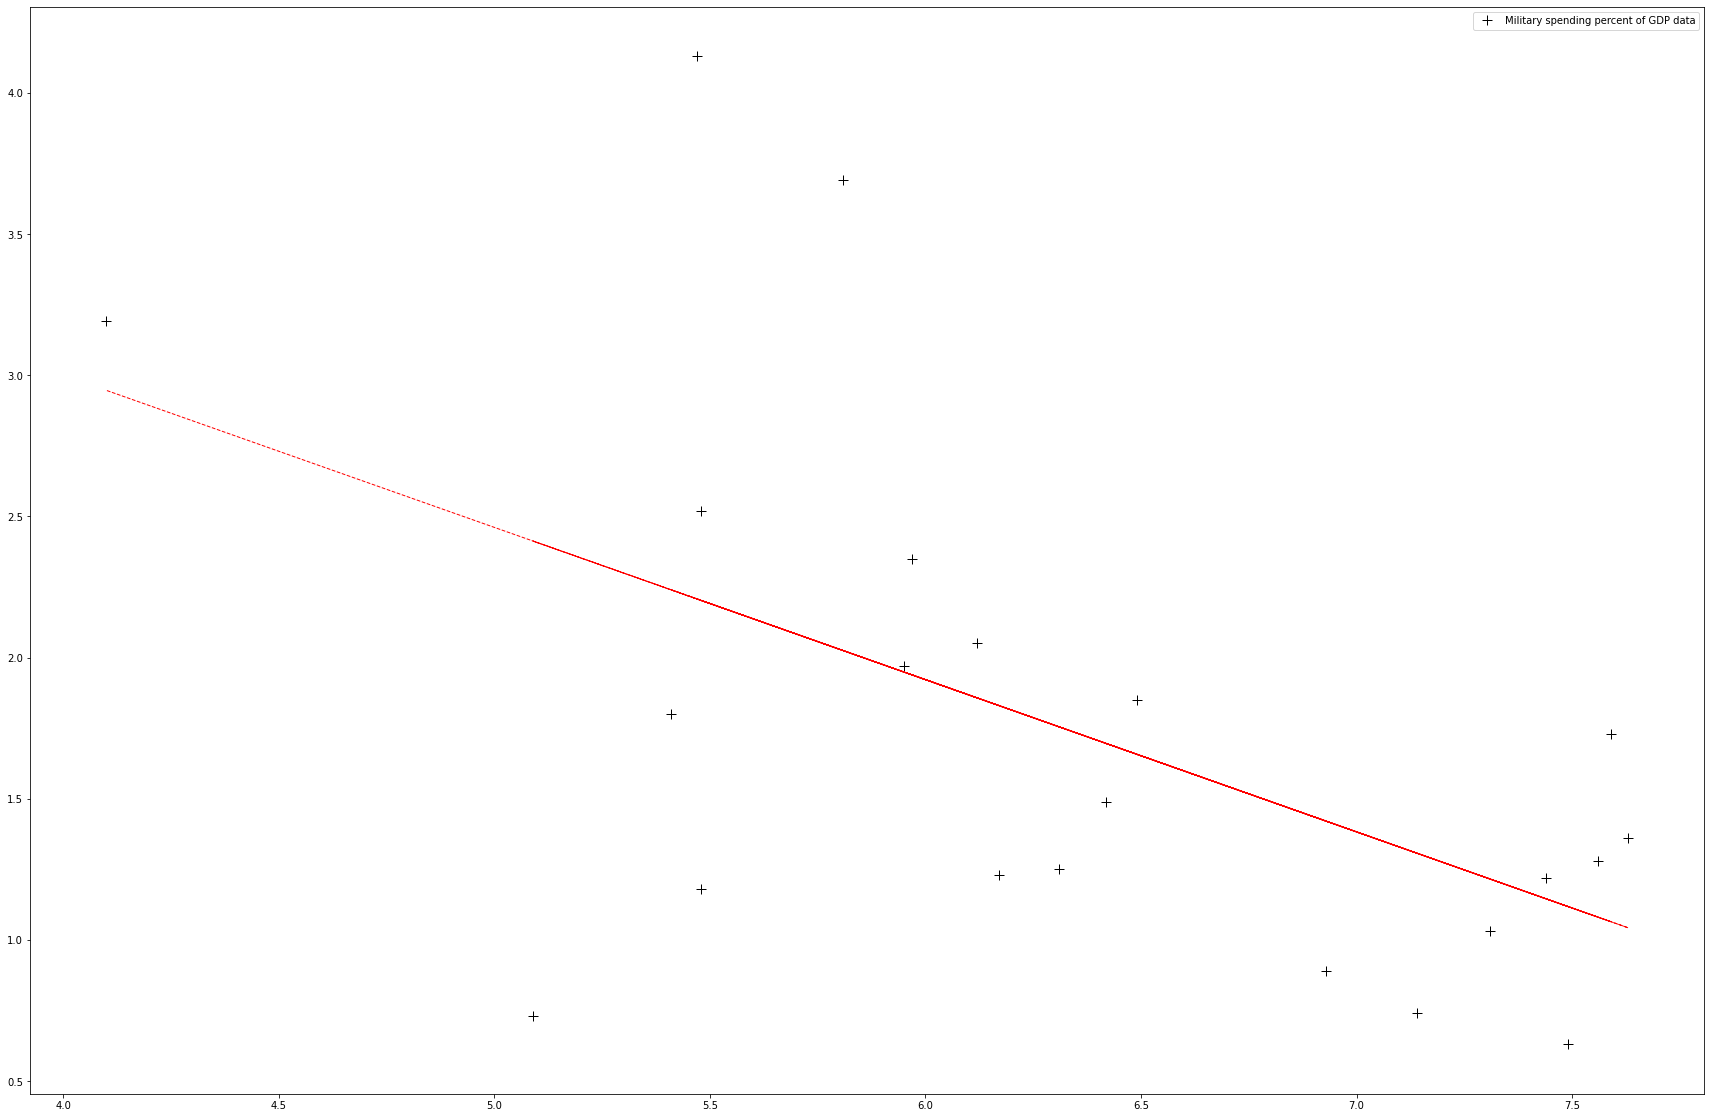

r-squared = 0.22761958659985912


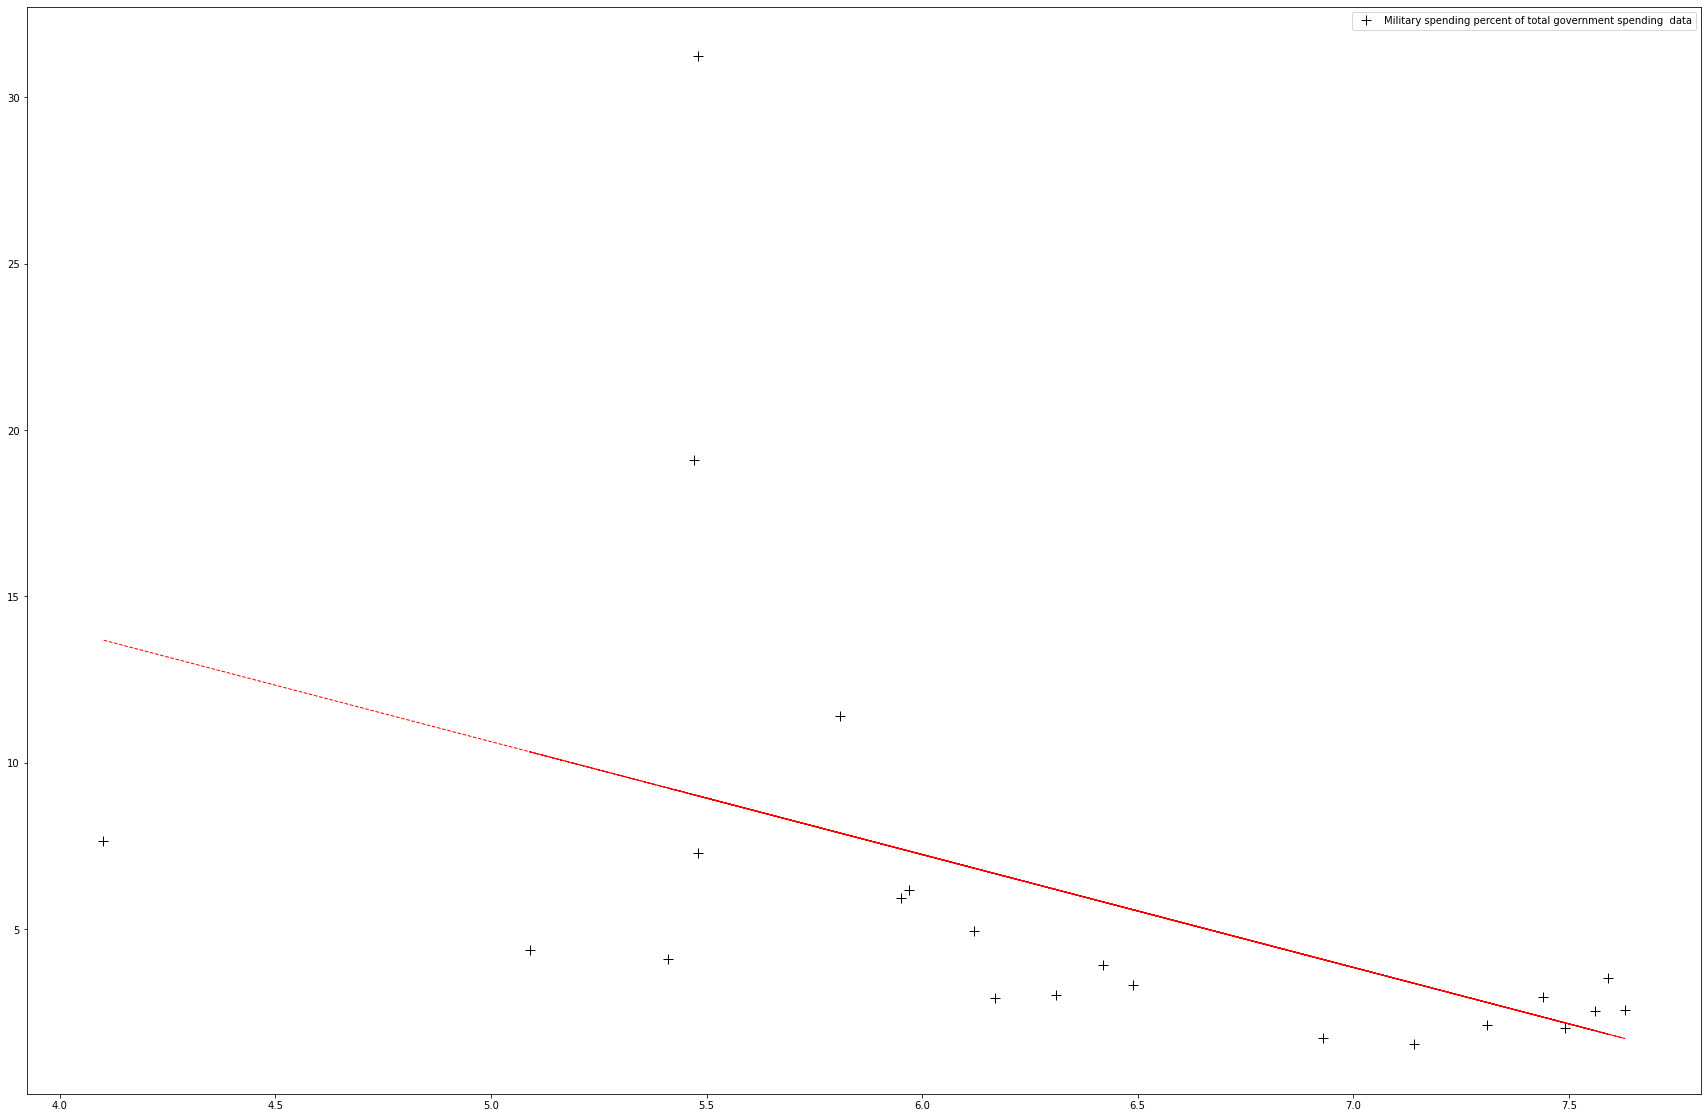

r-squared = 0.2020064821203992


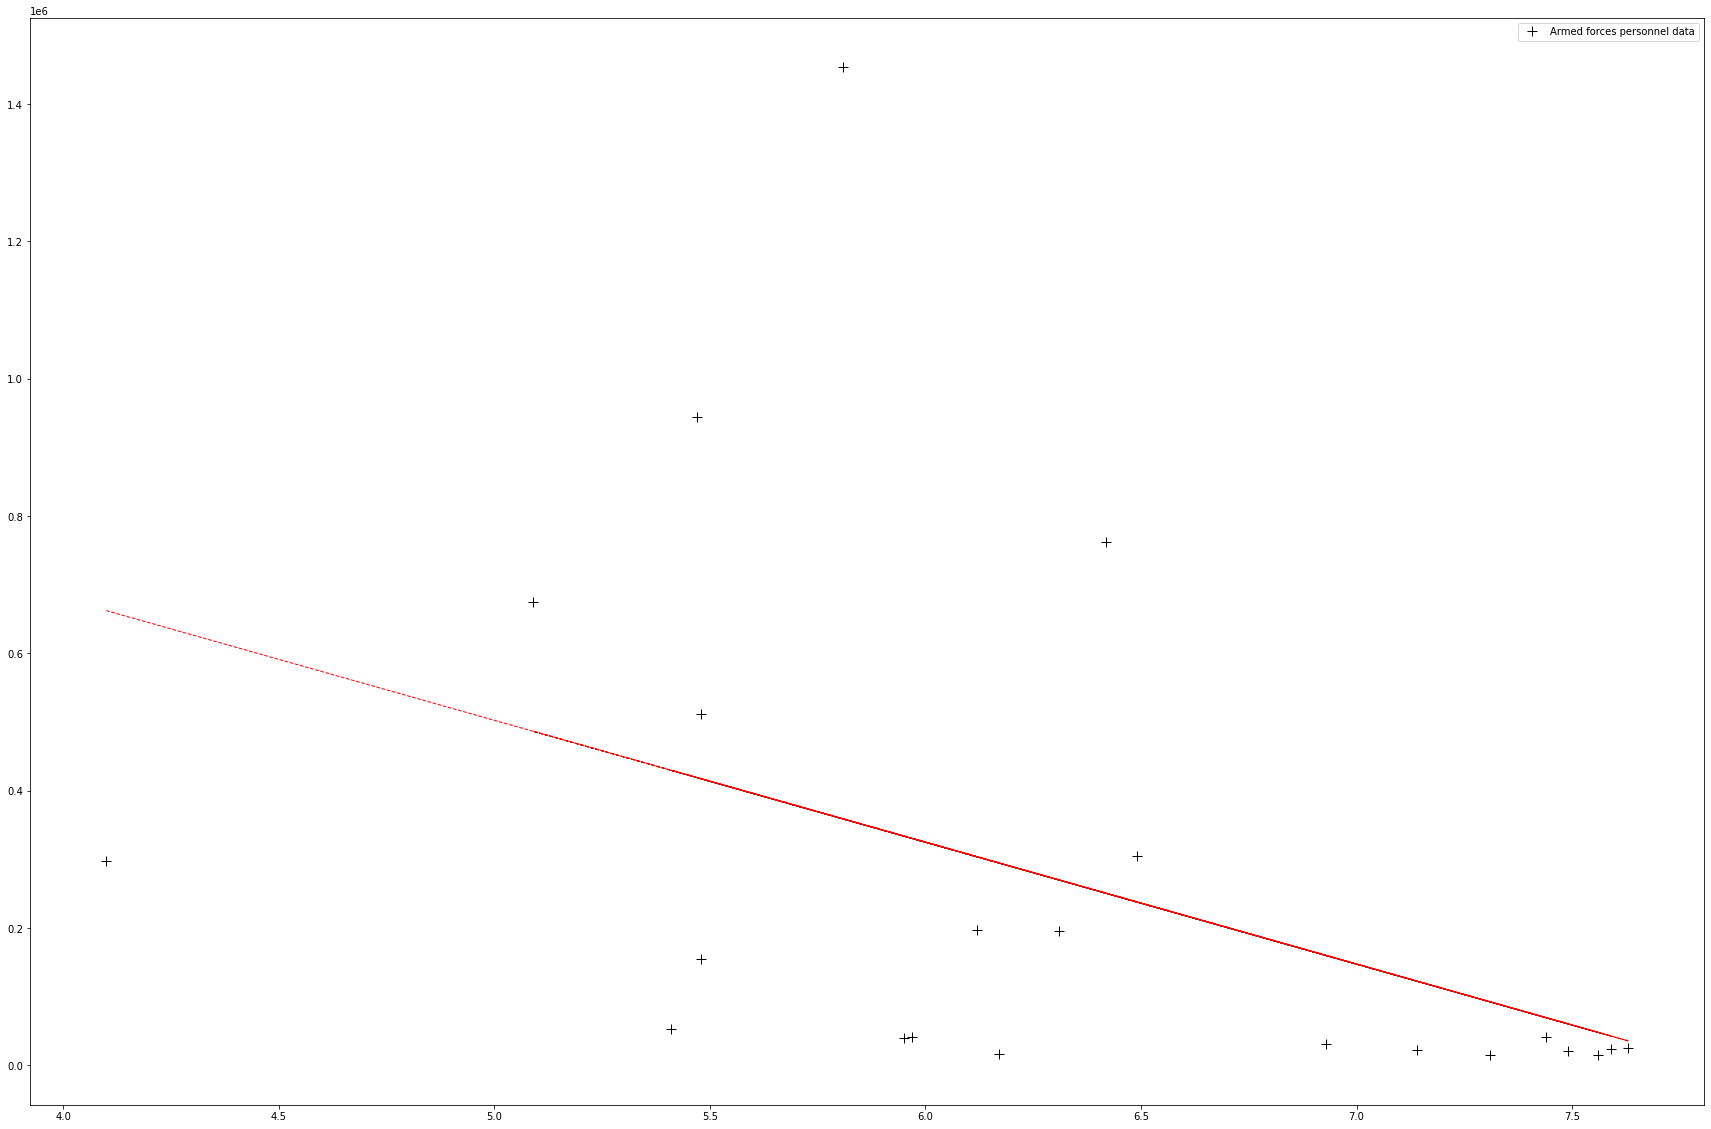

r-squared = 0.24393290333941992


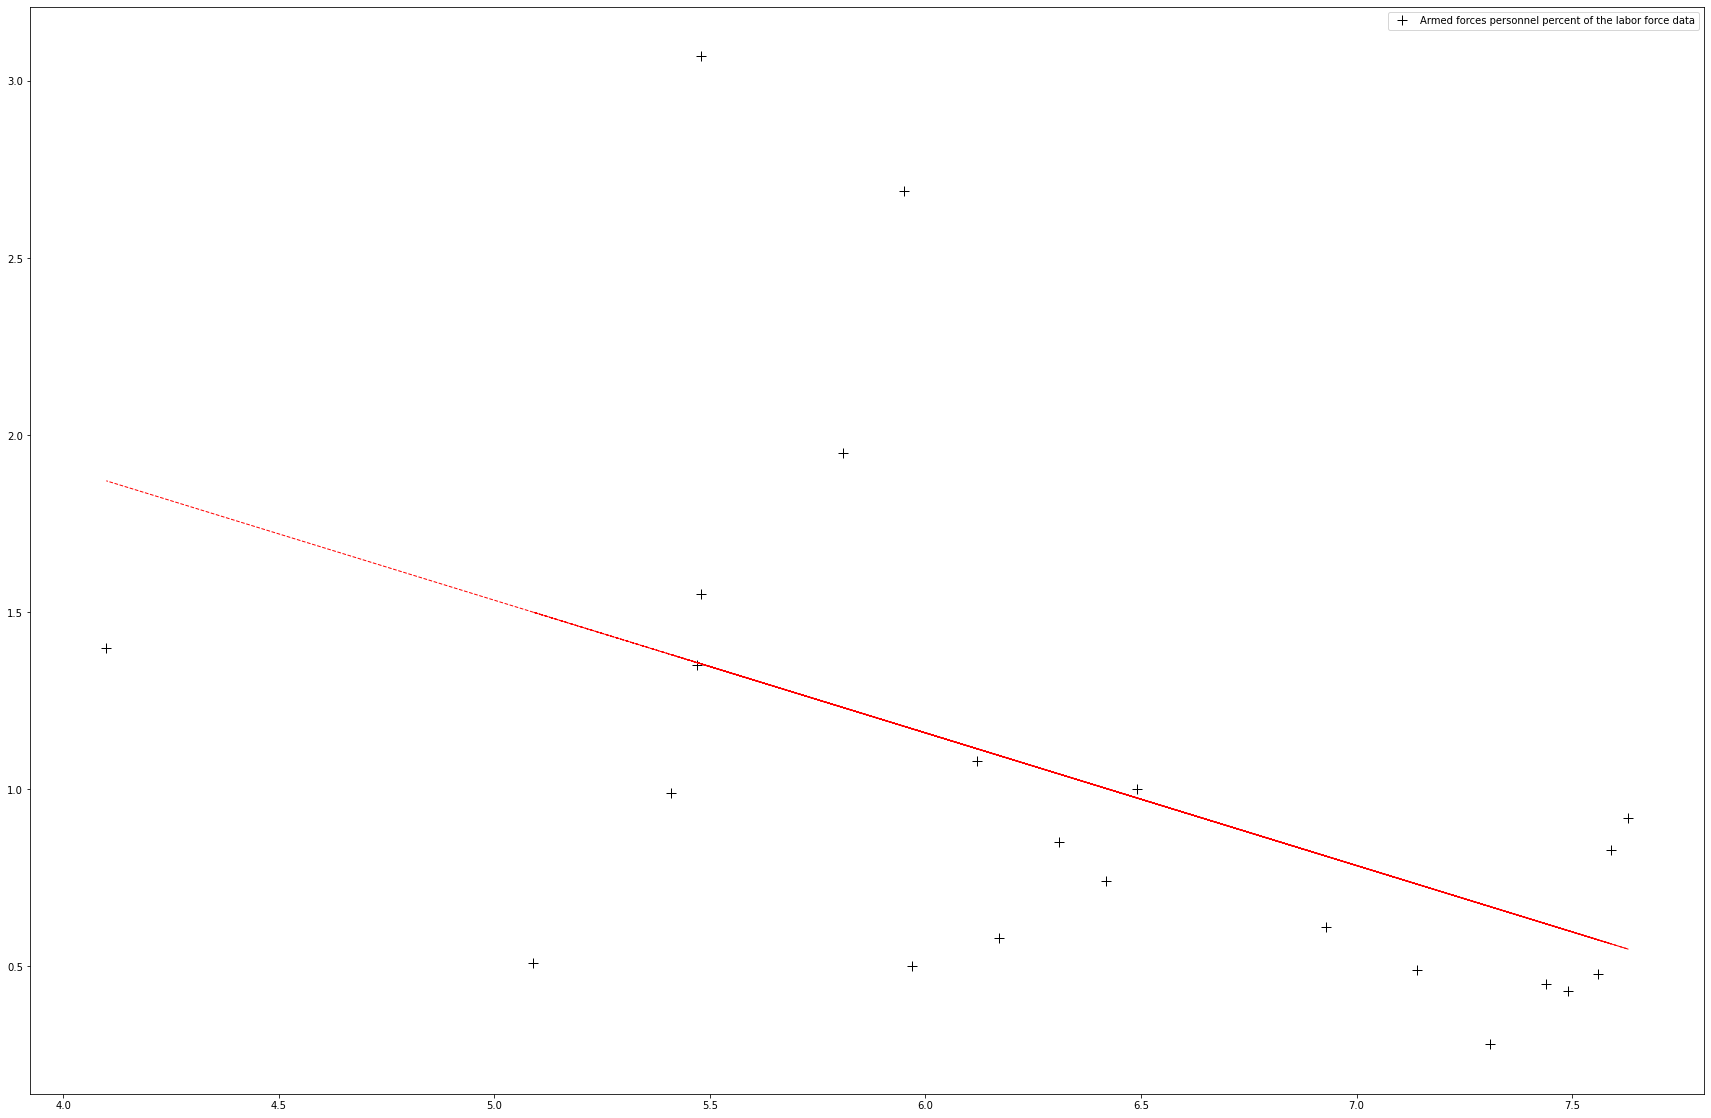

r-squared = 0.010060636773548681


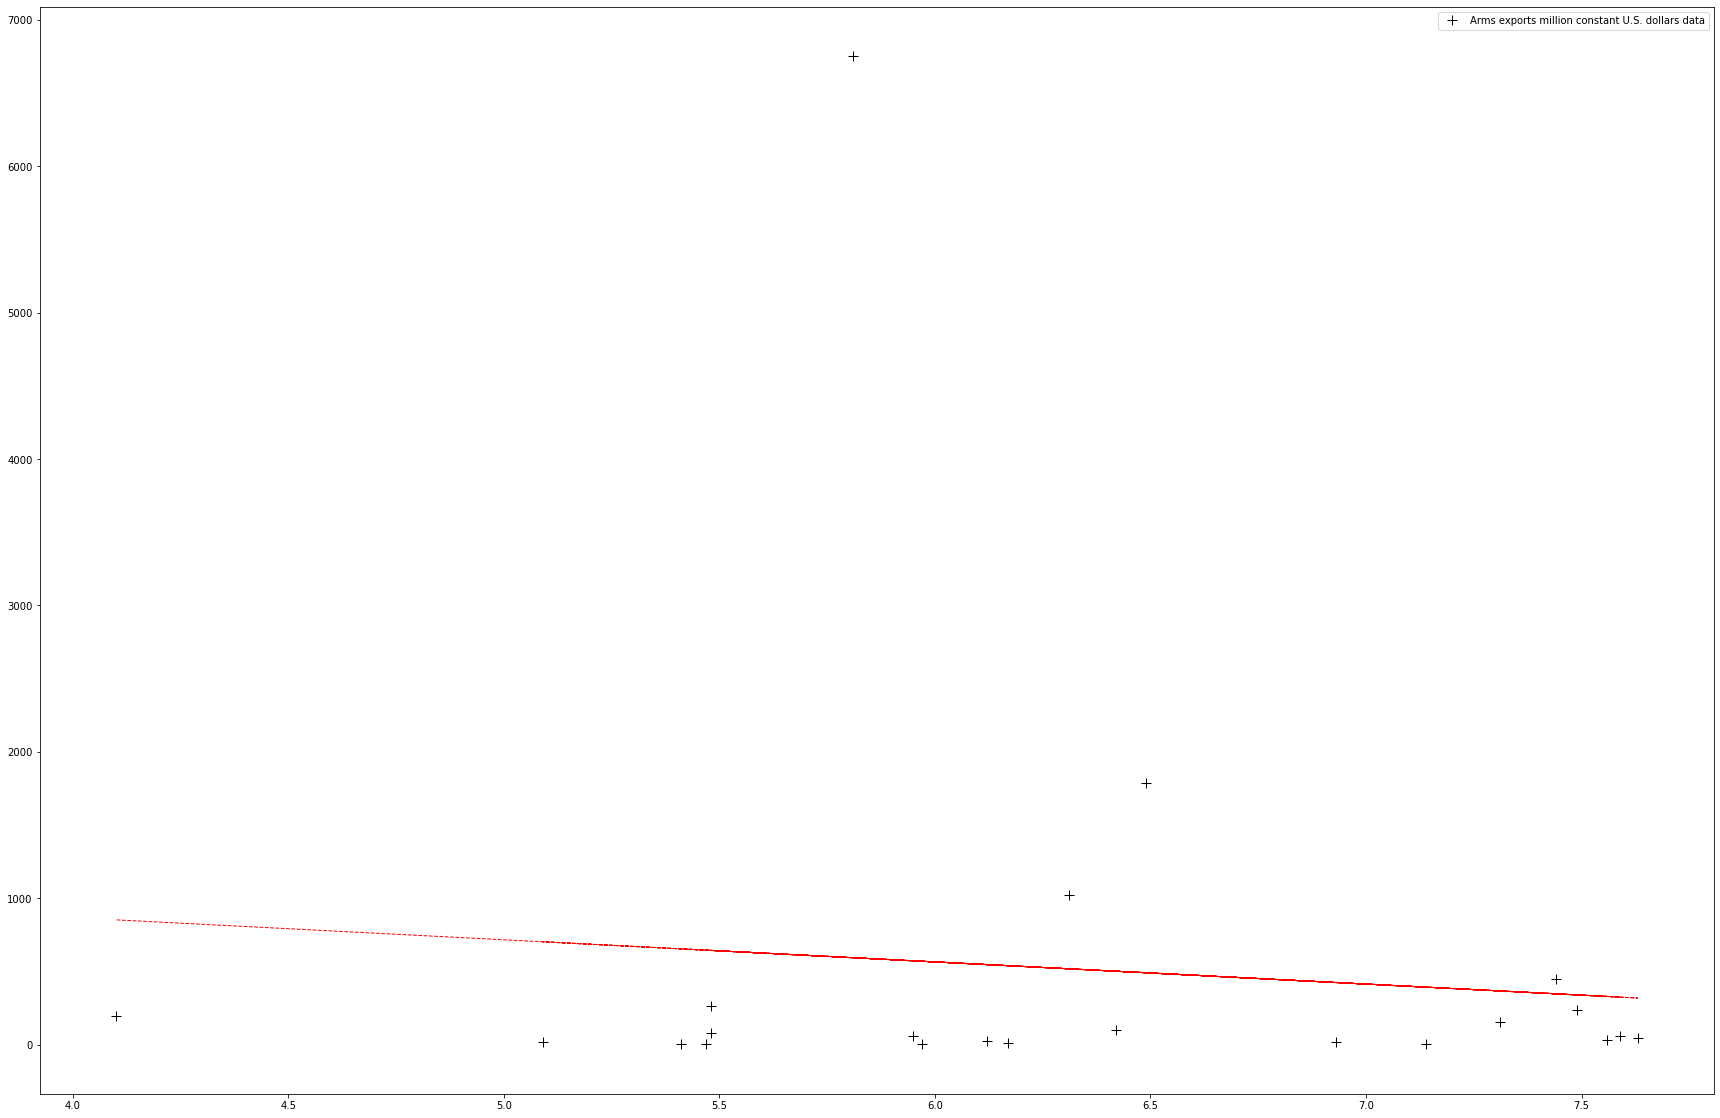

r-squared = 0.02935262366513555


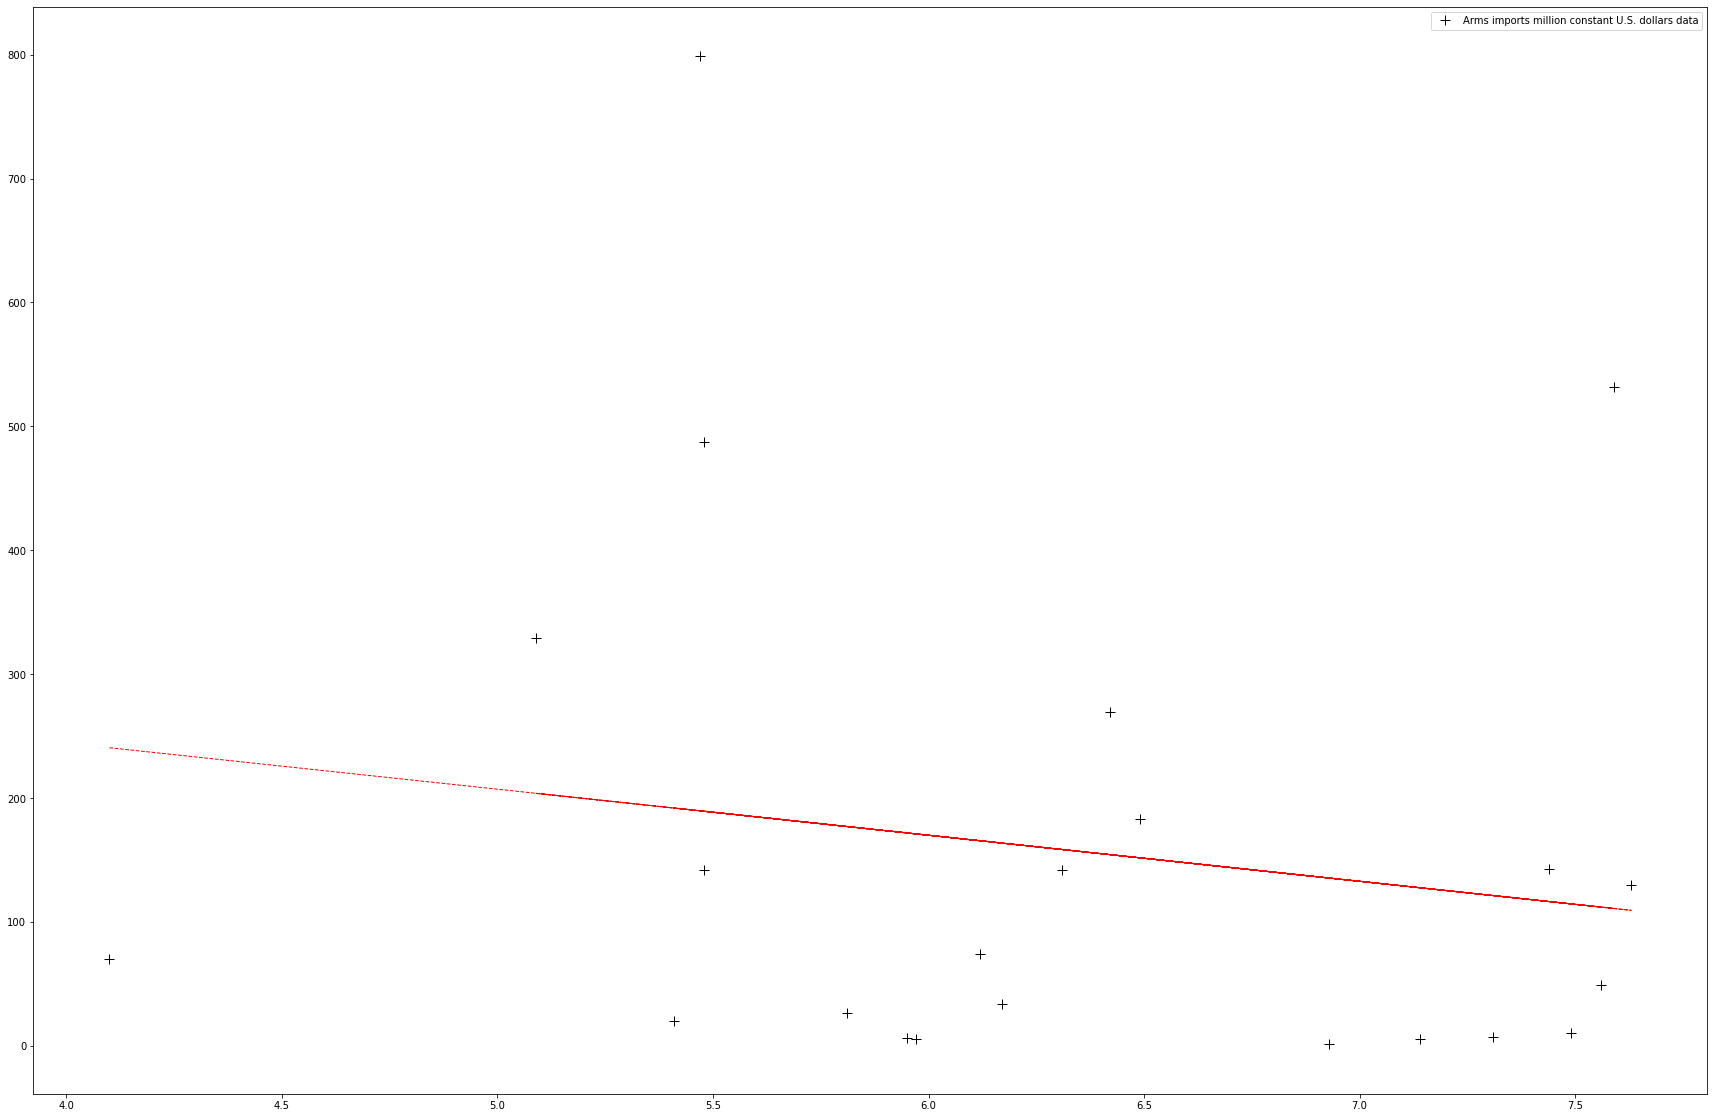

r-squared = 1.0


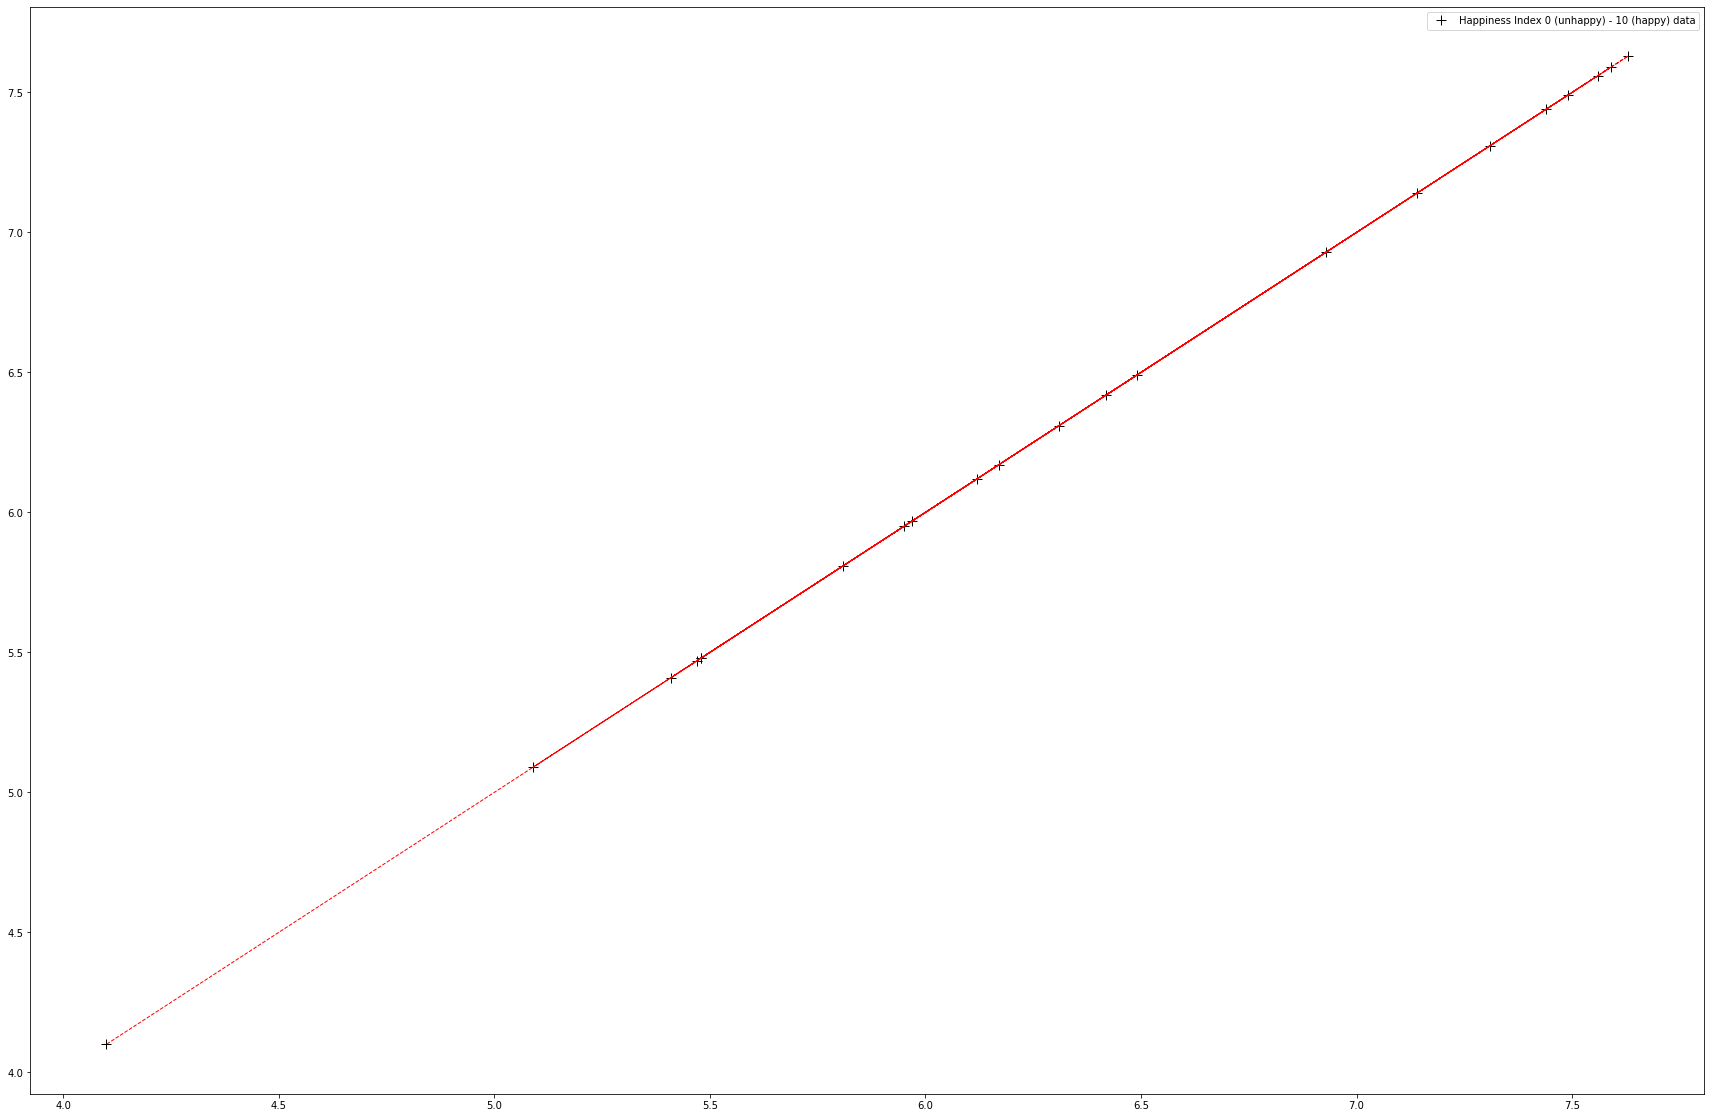

r-squared = 0.557903084675195


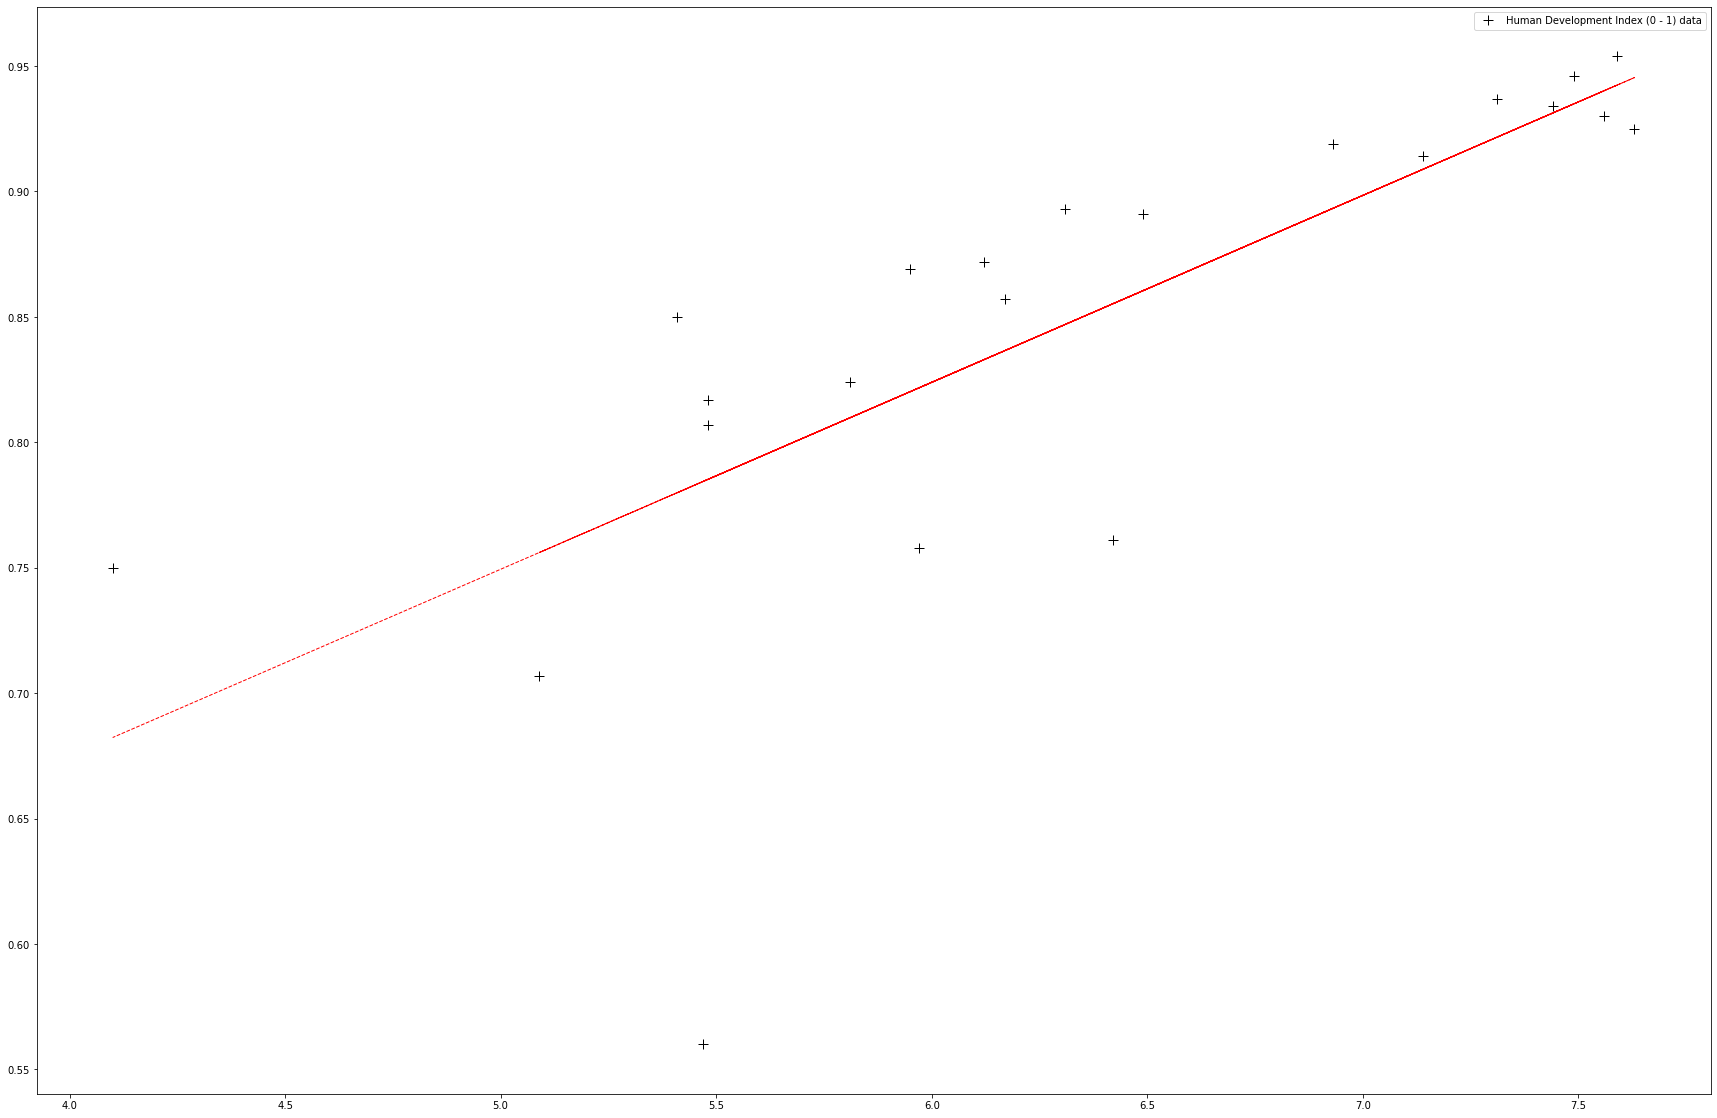

r-squared = 0.4774699384638195


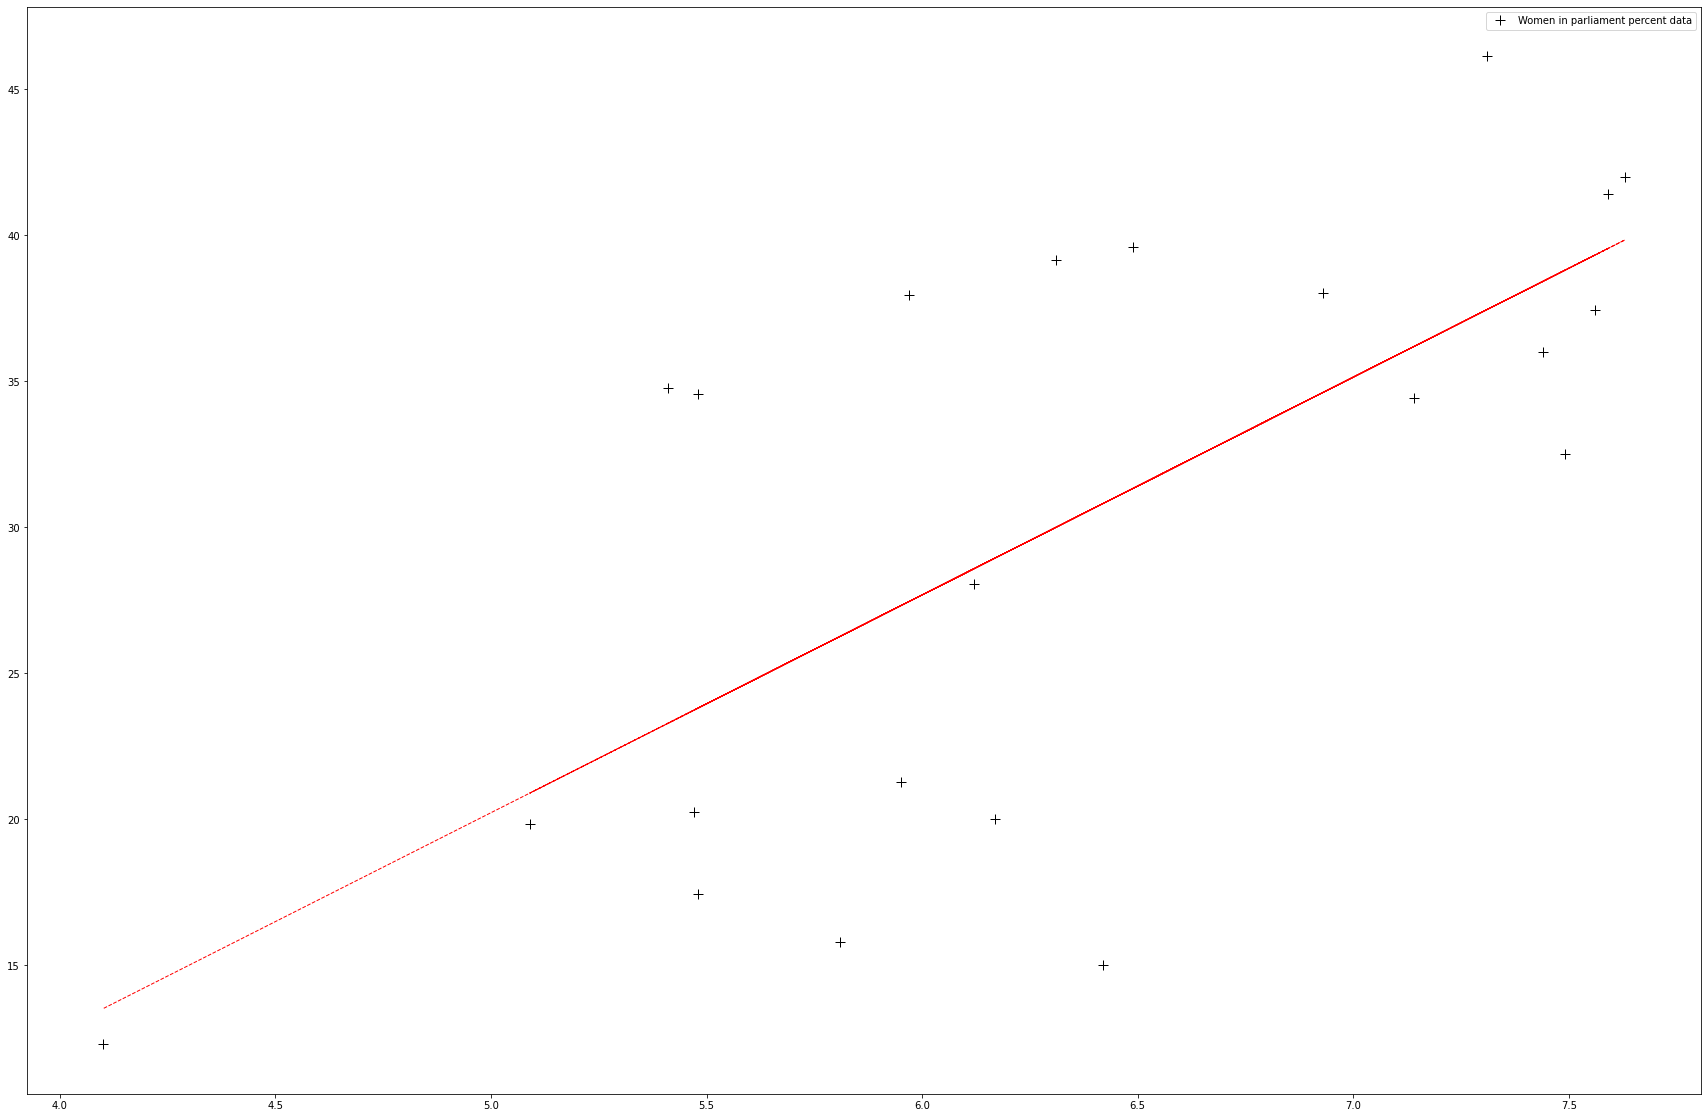

r-squared = 0.18932528642102006


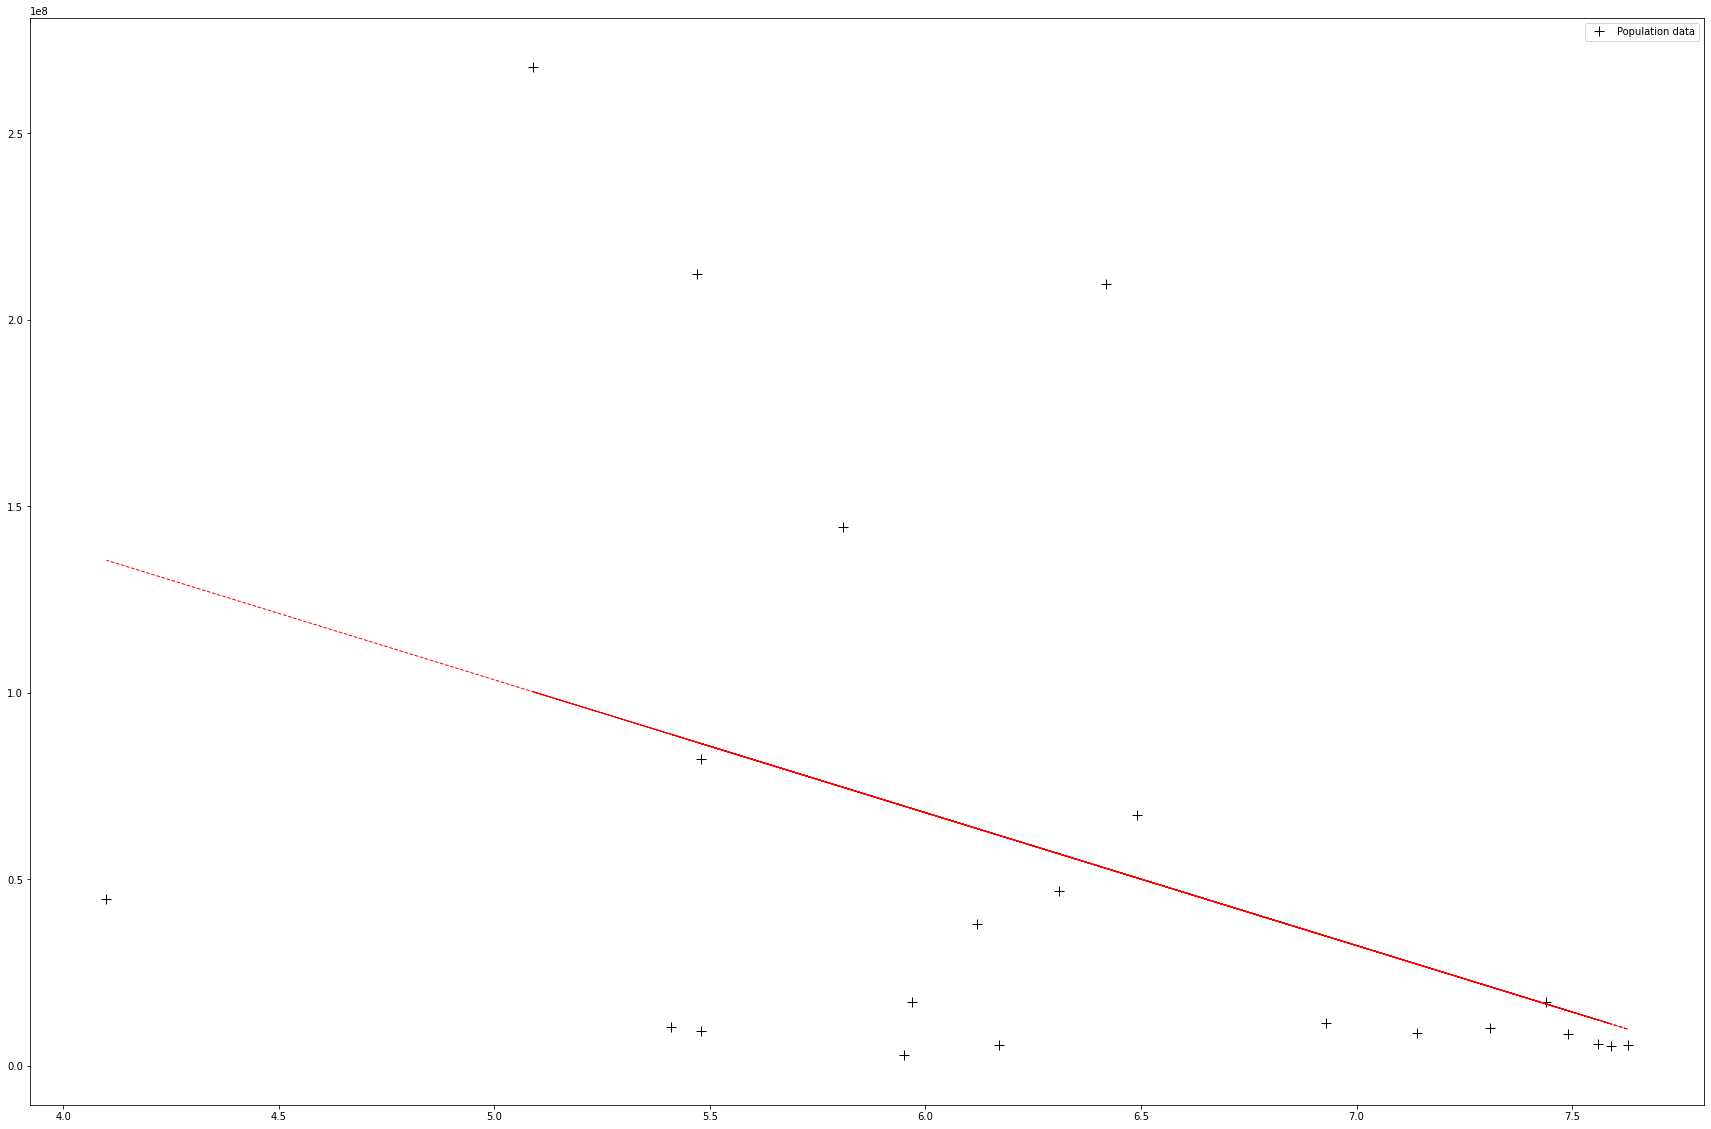

r-squared = 0.18117642854253801


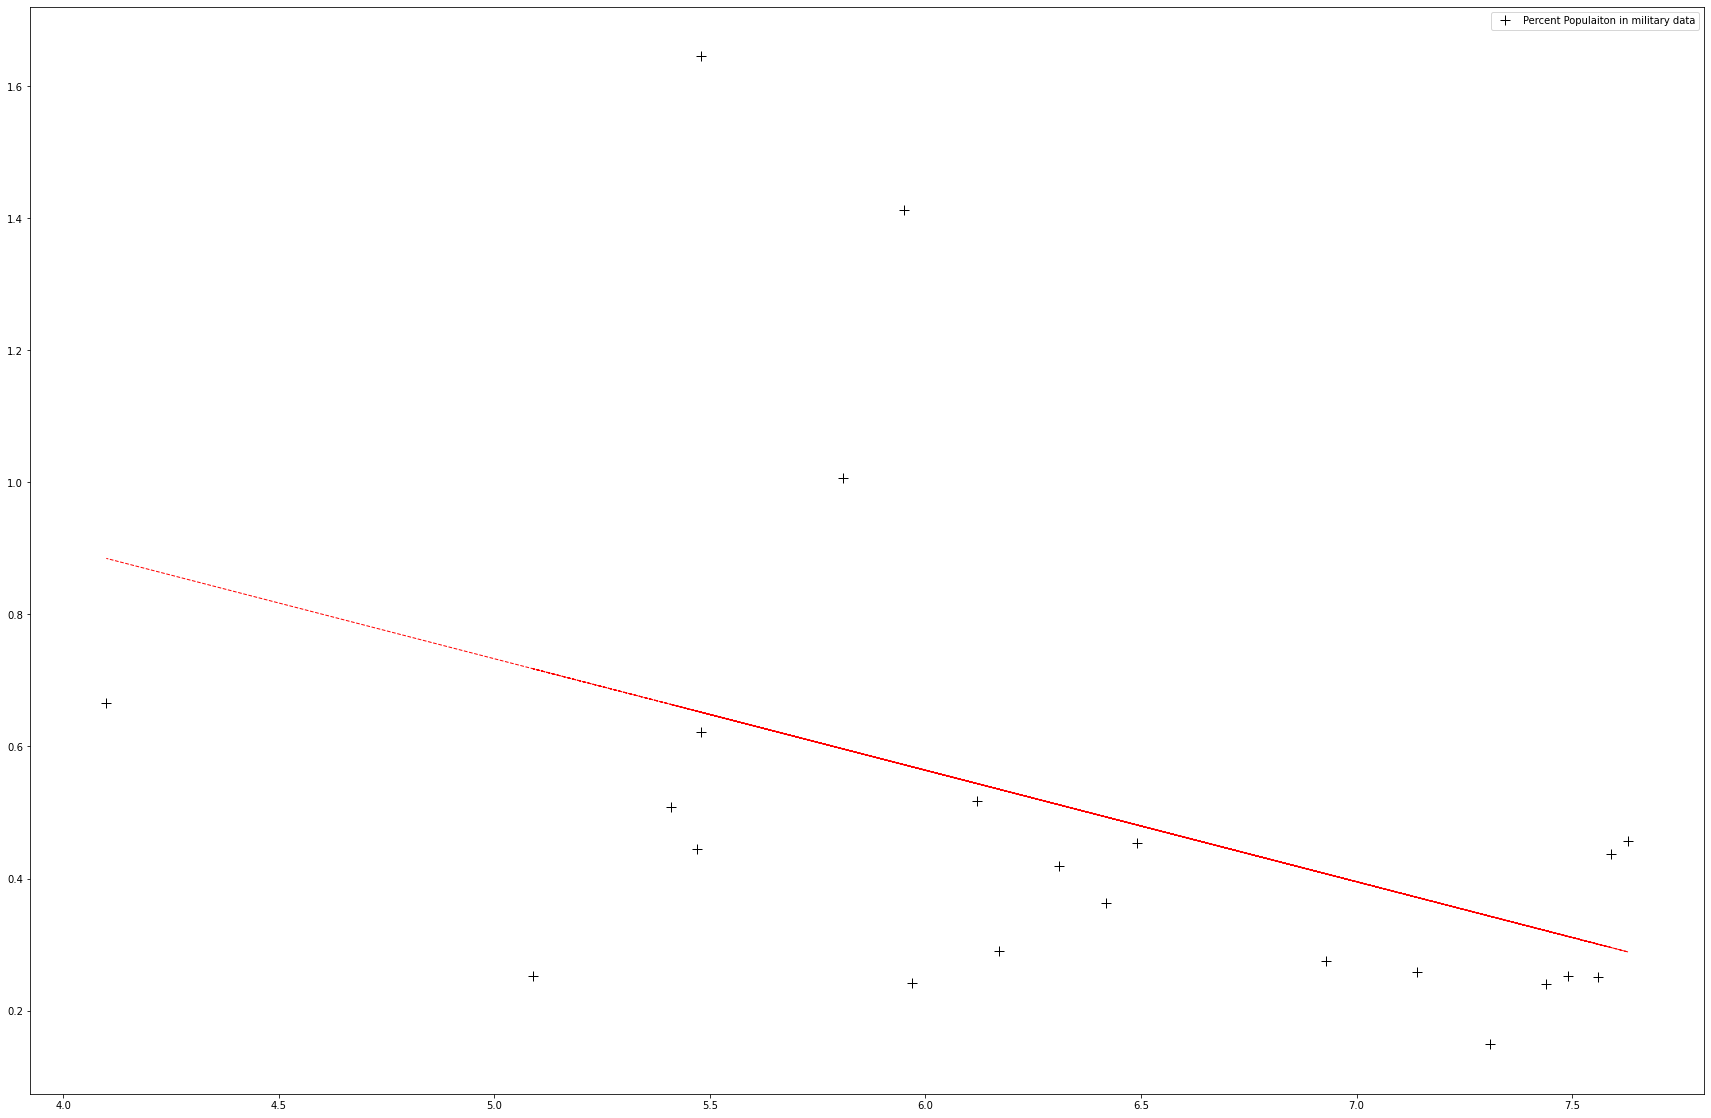

In [467]:
listy = df[['Population size in millions', 'Gini income inequality index',
       'Percent of world population', 'Percent of world GDP',
       'Percent of world exports', 'Percent of world imports',
       'Percent of world Foreign Direct Investment',
       'Percent of world oil reserves',
       'Military spending in billion U.S. dollars',
       'Military spending percent of GDP',
       'Military spending percent of total government spending ',
       'Armed forces personnel',
       'Armed forces personnel percent of the labor force',
       'Arms exports million constant U.S. dollars',
       'Arms imports million constant U.S. dollars',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Human Development Index (0 - 1)', 'Women in parliament percent',
       'Population', 'Percent Populaiton in military']]
for item in listy:

    x= df_2018_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
    y= df_2018_clean[item]

    plt.plot(x,y,"+", ms=10, mec="k", label='%s data' % item)
   
    plt.legend()

    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)

    plt.plot(x, y_hat, "r--", lw=1)
    corr_matrix = np.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq2 = corr**2
 
    print("r-squared = " + str(R_sq2))
       

    plt.show()


r-squared = 0.22761958659985912


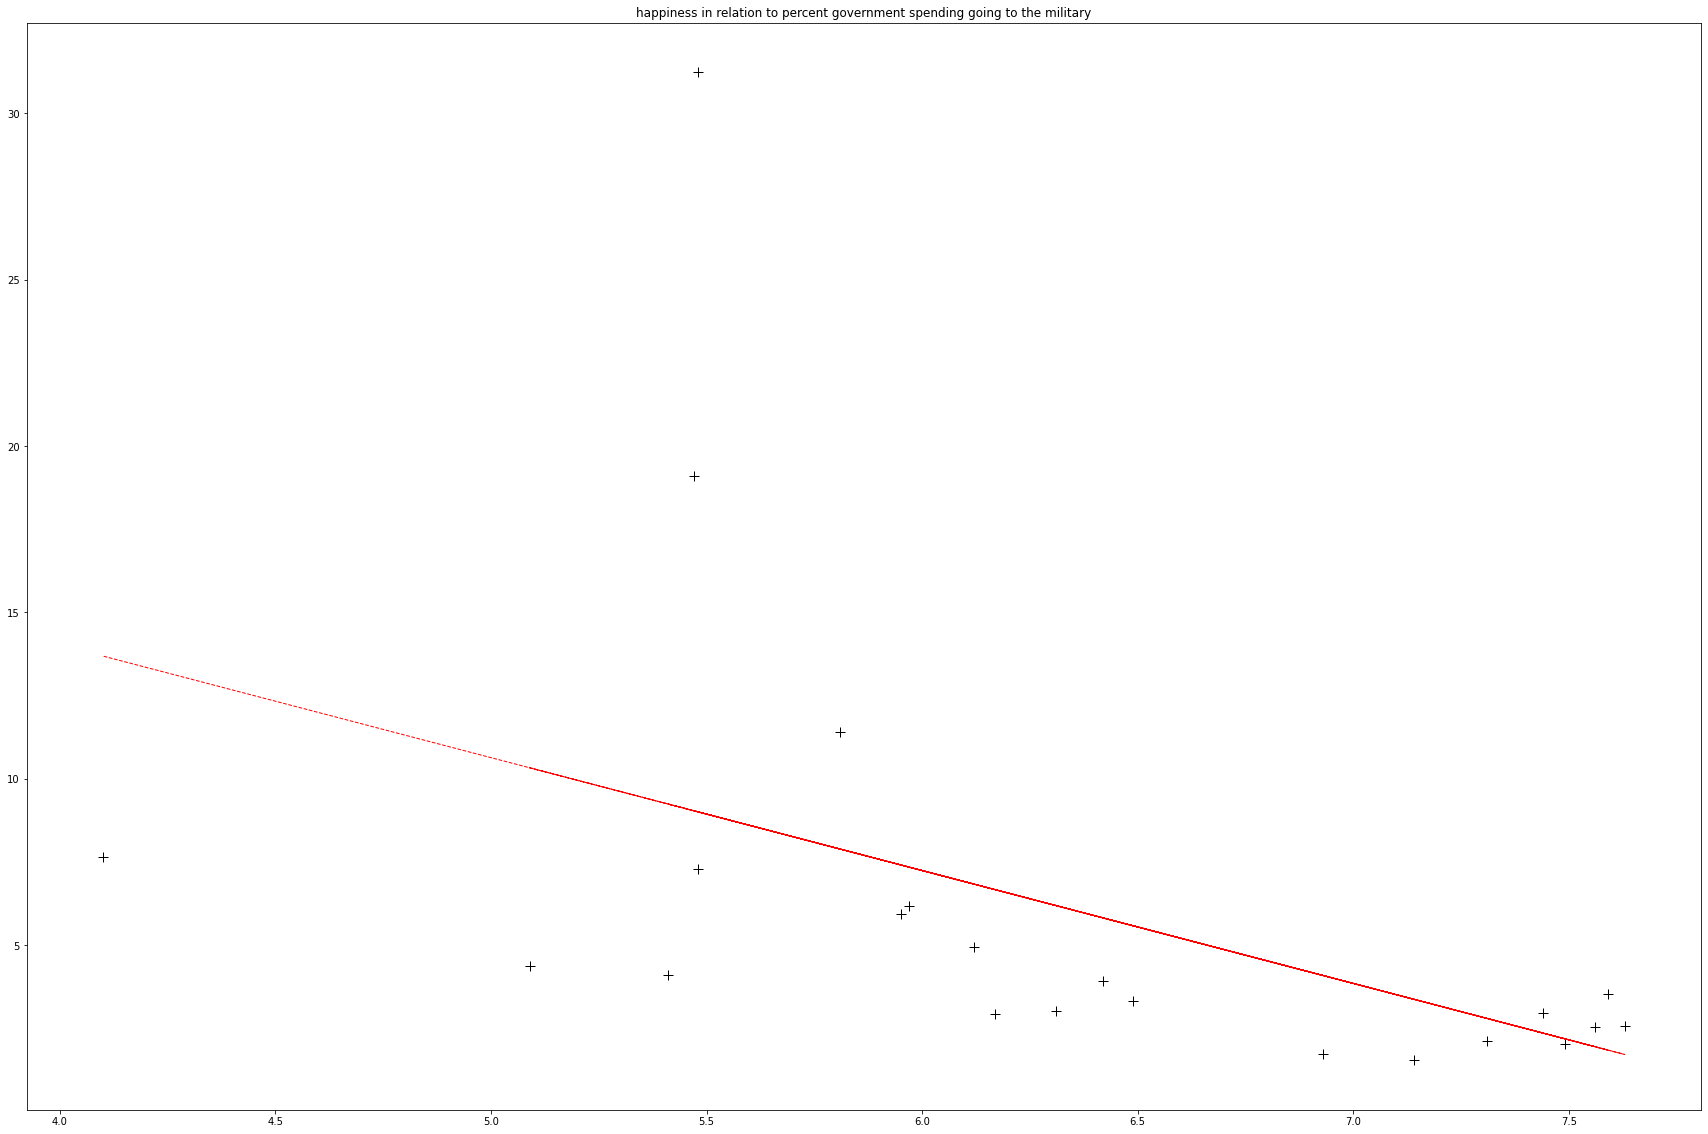

In [471]:
x= df_2018_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
y= df_2018_clean["Military spending percent of total government spending "]

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)
plt.title("happiness in relation to percent government spending going to the military")

plt.plot(x, y_hat, "r--", lw=1)
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq2 = corr**2
 
print("r-squared = " + str(R_sq2))

plt.show()

In [484]:
df_happy_military = df[["Year", "Country","Happiness Index 0 (unhappy) - 10 (happy)", "Military spending percent of total government spending ", "Armed forces personnel percent of the labor force"]]

df_happy_military_2018 = df_happy_military.loc[(df_happy_military["Year"]==2018 )]

                  
                        

### We take the average value for each country over the apst 40 years

In [250]:
df_clean_mean = df_clean[['Country', 'ContinentCode',
       'Population size in millions', 'Gini income inequality index',
       'Percent of world population', 'Percent of world GDP',
       'Percent of world exports', 'Percent of world imports',
       'Percent of world Foreign Direct Investment',
       'Percent of world oil reserves',
       'Military spending in billion U.S. dollars',
       'Military spending percent of GDP',
       'Military spending percent of total government spending ',
       'Armed forces personnel',
       'Armed forces personnel percent of the labor force',
       'Arms exports million constant U.S. dollars',
       'Arms imports million constant U.S. dollars',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Human Development Index (0 - 1)', 'Women in parliament percent',
       'Population', 'Percent Populaiton in military']].groupby(by="Country").agg("mean")
df_clean_mean

,Population size in millions,Gini income inequality index,Percent of world population,Percent of world GDP,Percent of world exports,Percent of world imports,Percent of world Foreign Direct Investment,Percent of world oil reserves,Military spending in billion U.S. dollars,Military spending percent of GDP,Military spending percent of total government spending,Armed forces personnel,Armed forces personnel percent of the labor force,Arms exports million constant U.S. dollars,Arms imports million constant U.S. dollars,Happiness Index 0 (unhappy) - 10 (happy),Human Development Index (0 - 1),Women in parliament percent,Population,Percent Populaiton in military
Country,,,,,,,,,,,,,,,,,,,,
Austria,8.700000,30.520000,0.110000,0.456000,1.004000,0.966000,-0.718000,0.000000,3.066000,0.736000,1.470000,2.202000e+04,0.482000,17.000000,6.600000,7.168000,0.907400,32.678000,8.700000e+06,0.253170
Belarus,9.454000,25.620000,0.122000,0.064000,0.166000,0.172000,0.084000,0.010000,0.720000,1.222000,30.532000,1.563400e+05,3.082000,138.400000,115.000000,5.632000,0.812600,31.506000,9.454000e+06,1.653700
Belgium,11.314000,27.520000,0.148000,0.552000,1.814000,1.840000,-1.190000,0.000000,4.598000,0.916000,1.716000,3.423000e+04,0.682000,22.400000,22.800000,6.932000,0.914400,38.532000,1.131400e+07,0.302734
Brazil,205.794000,53.040000,2.670000,2.214000,1.154000,1.228000,4.002000,0.854000,27.830000,1.390000,3.622000,7.327960e+05,0.734000,68.400000,183.200000,6.768000,0.757000,10.838000,2.057940e+08,0.356062
Bulgaria,7.180000,38.600000,0.090000,0.060000,0.160000,0.160000,0.090000,0.000000,0.630000,1.250000,3.340000,4.730000e+04,1.420000,70.000000,3.000000,4.220000,0.807000,20.420000,7.180000e+06,0.658770
China,1376.963333,38.933333,18.110000,12.133333,10.793333,9.713333,10.106667,1.483333,186.383333,1.740000,5.706667,2.843667e+06,0.360000,2085.666667,1230.000000,5.123333,0.739333,23.546667,1.376963e+09,0.206593
Colombia,48.910000,49.700000,0.630000,0.340000,0.210000,0.290000,0.640000,0.120000,10.020000,3.210000,10.940000,4.810000e+05,1.870000,10.000000,99.000000,6.360000,0.760000,18.670000,4.891000e+07,0.983440
Croatia,4.120000,30.400000,0.050000,0.060000,0.120000,0.120000,0.020000,0.000000,0.920000,1.670000,3.680000,1.800000e+04,0.990000,3.000000,13.000000,5.290000,0.835000,18.540000,4.120000e+06,0.436890
Denmark,5.714000,28.360000,0.072000,0.362000,0.816000,0.736000,0.286000,0.036000,3.898000,1.182000,2.238000,1.588000e+04,0.540000,22.800000,56.600000,7.566000,0.927800,37.766000,5.714000e+06,0.278136


### the graphs above show that the factors that are correlated with happiness are the growth development index and the percent of women in parliament

r-squared = 0.021911207098447048


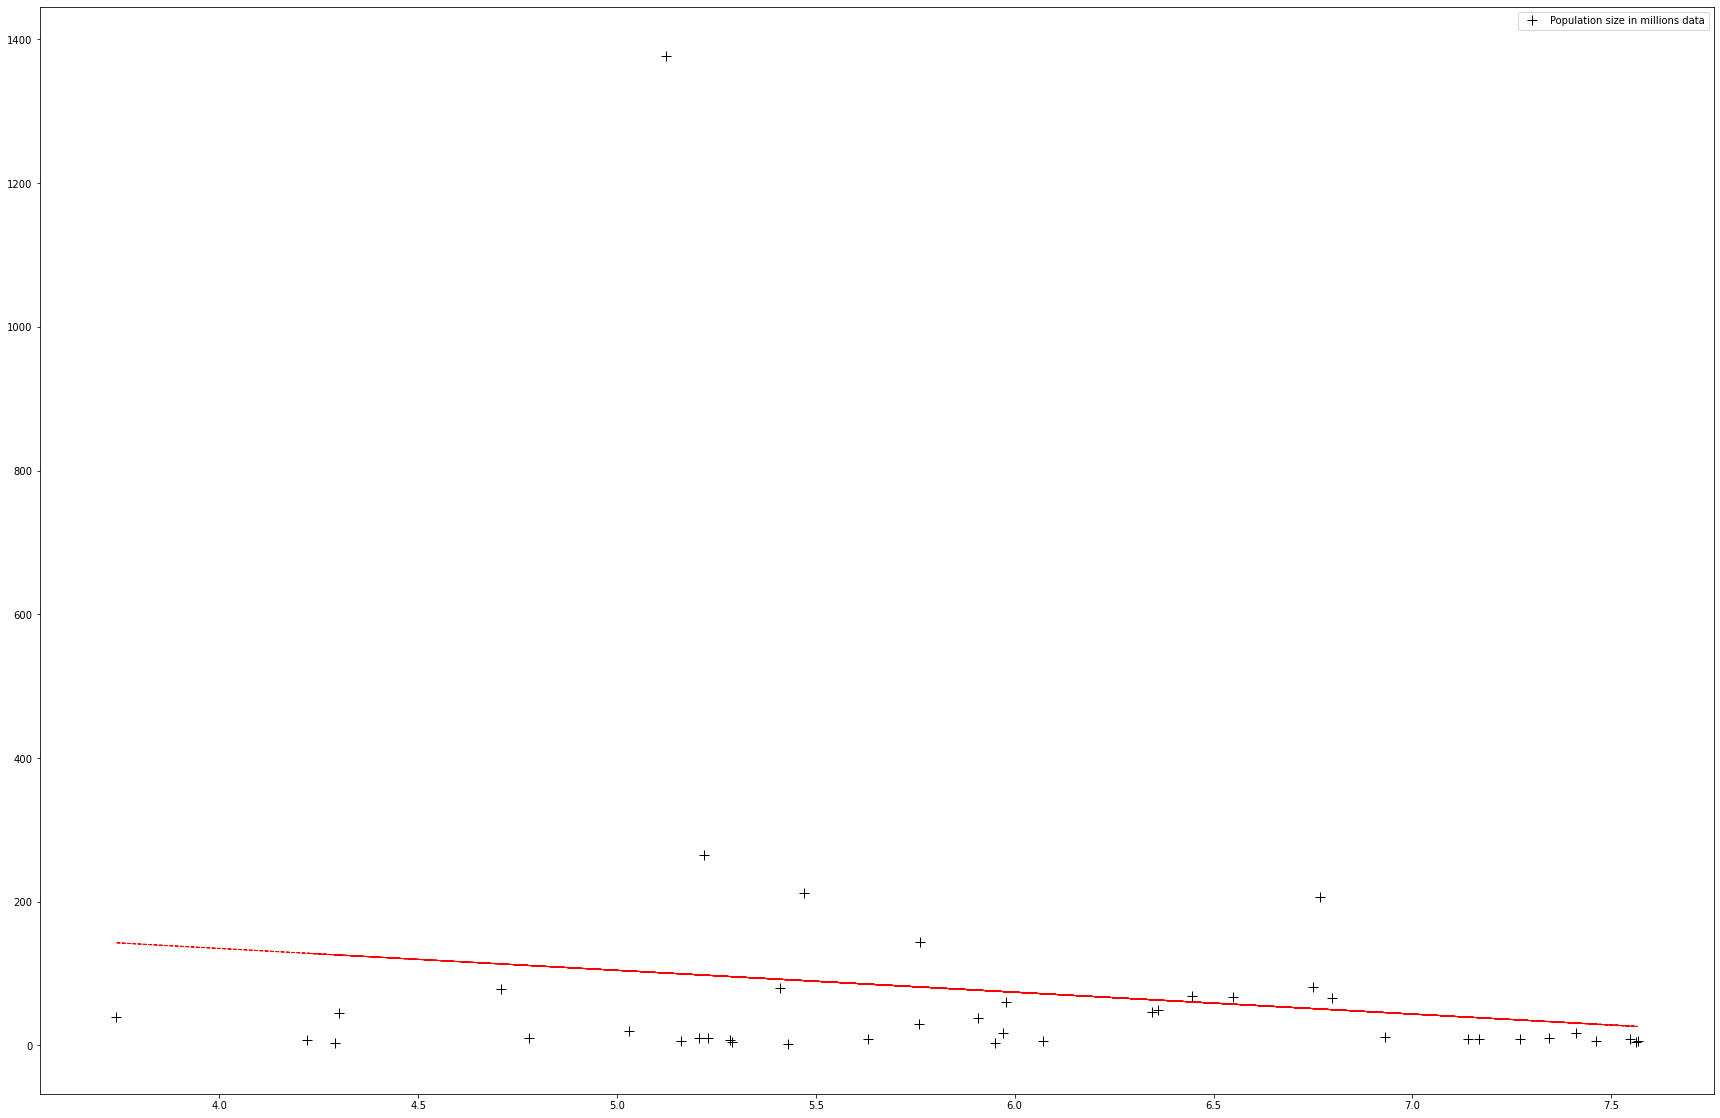

r-squared = 0.056738186842861735


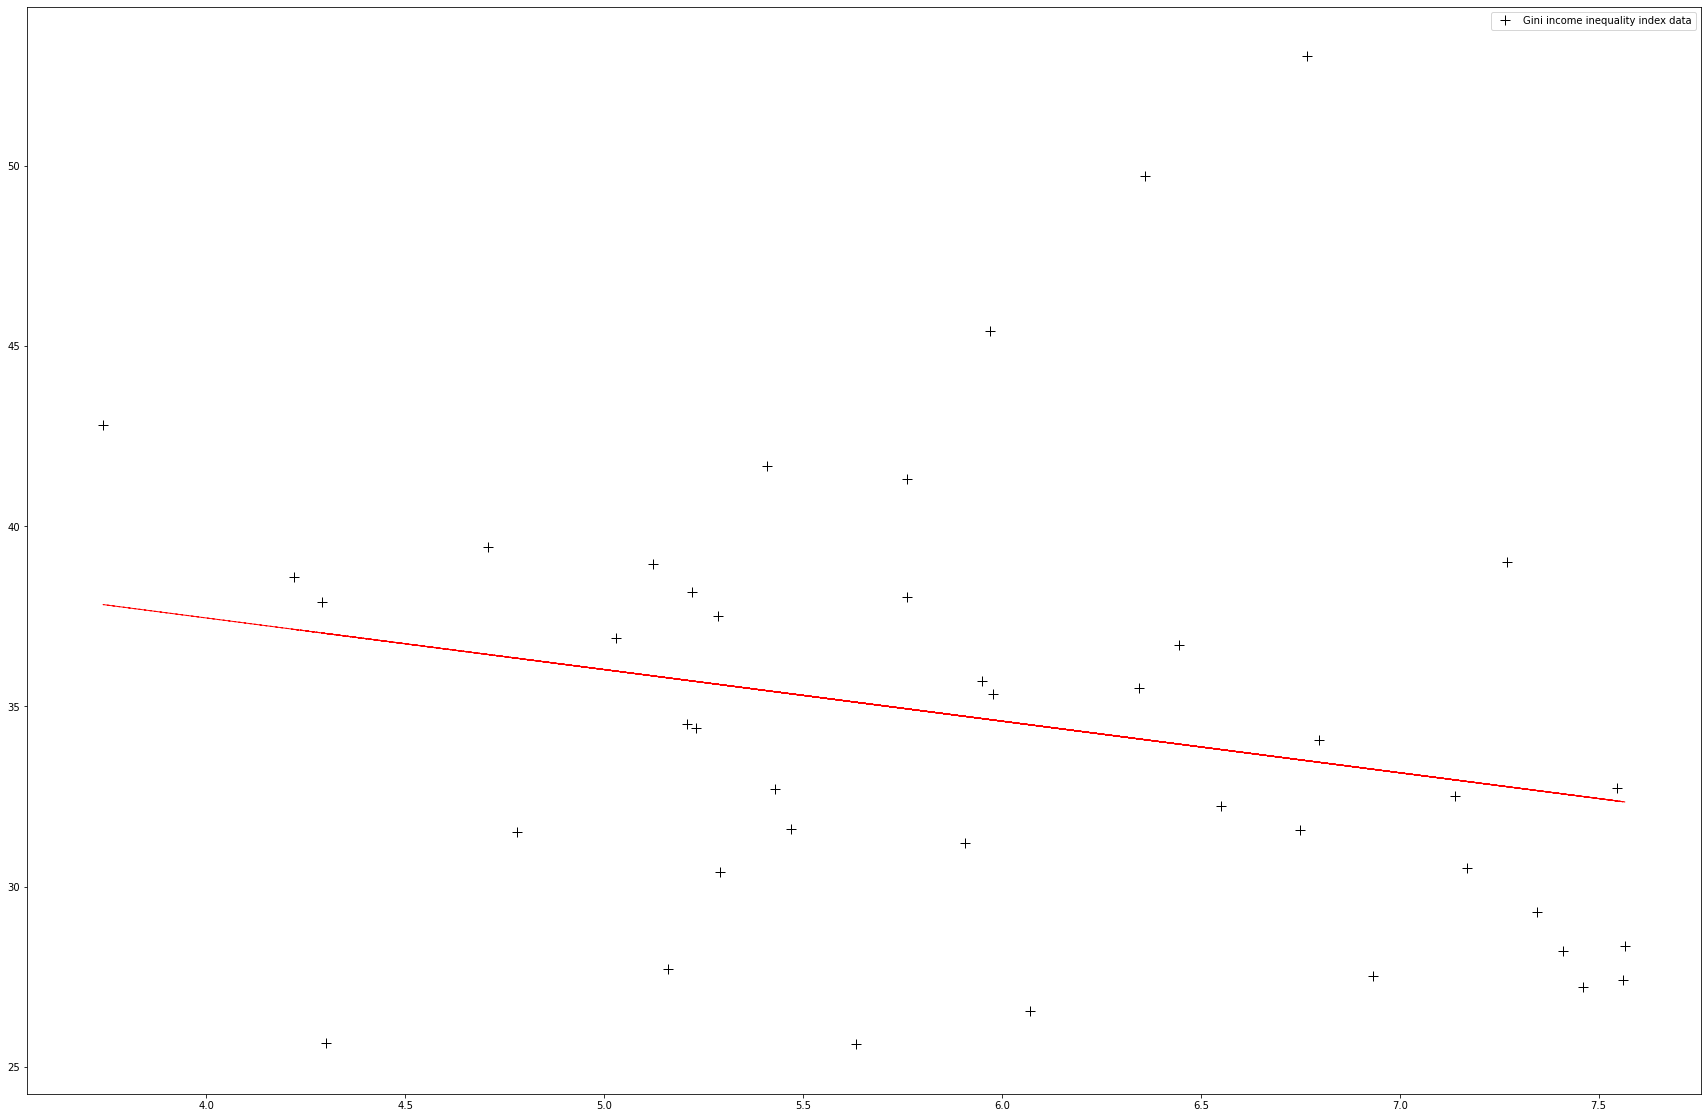

r-squared = 0.021699943006670854


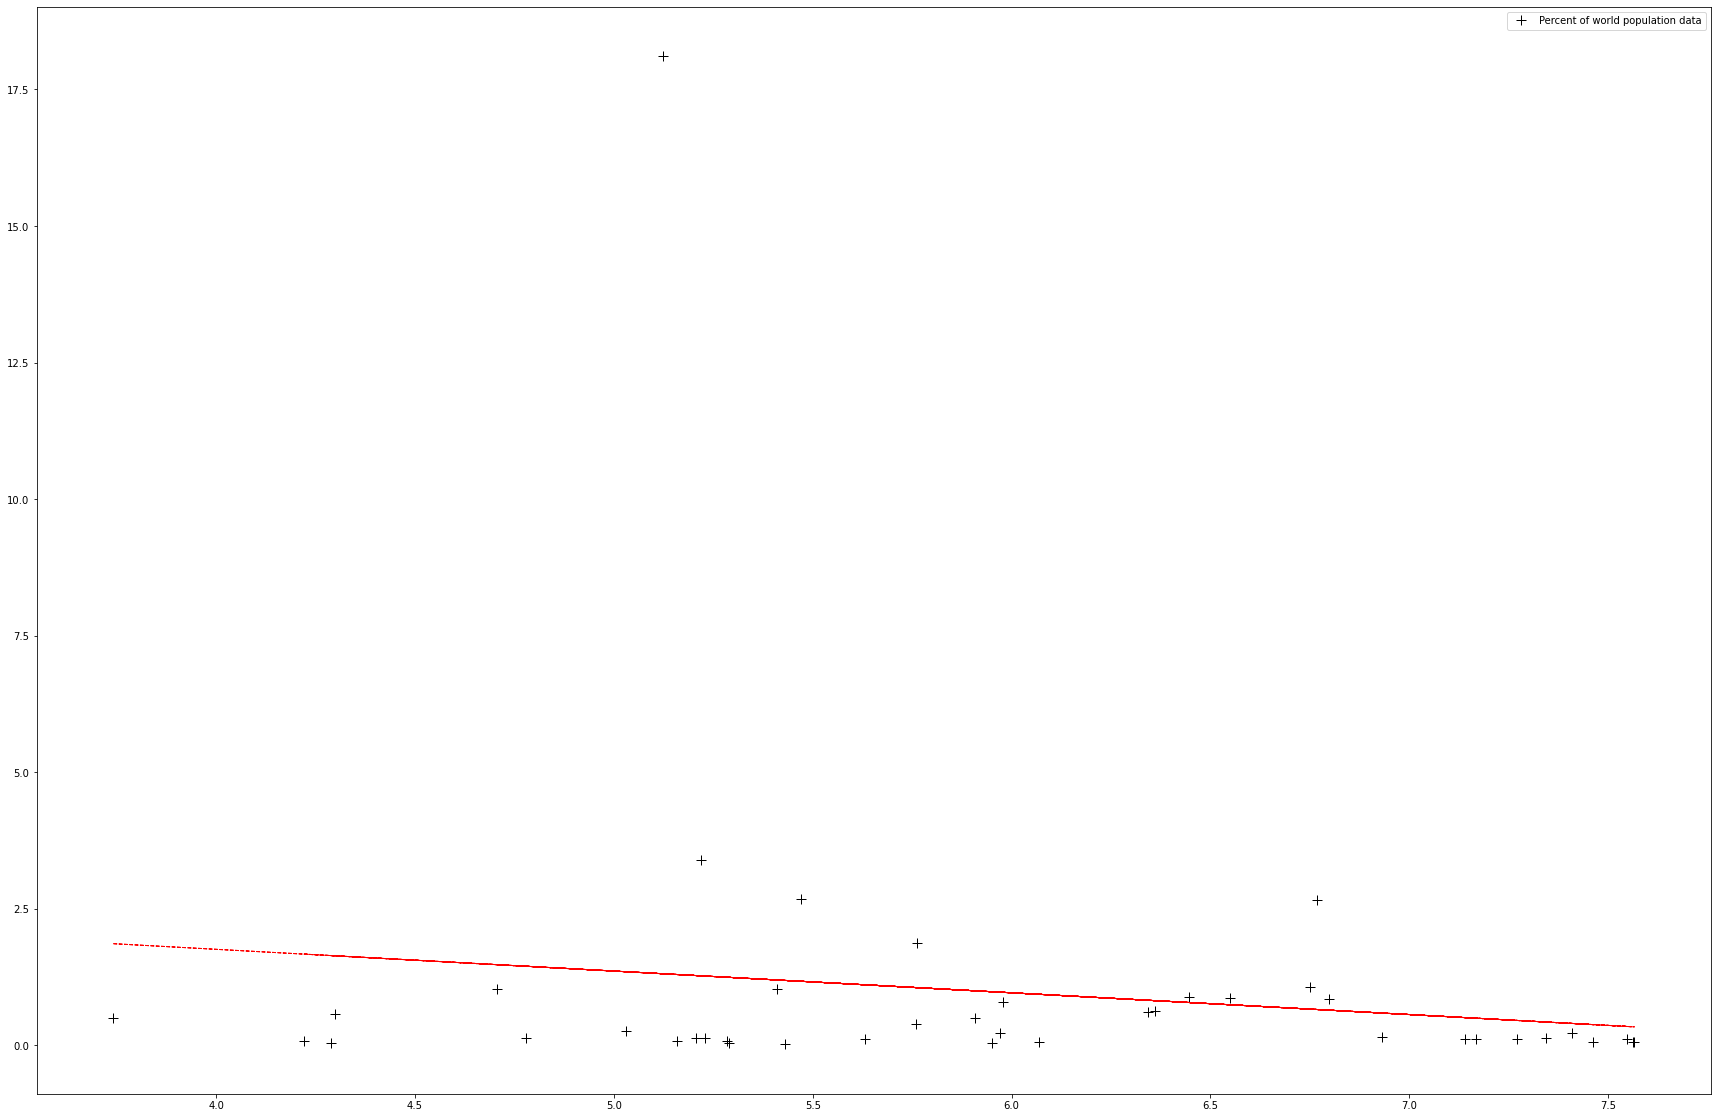

r-squared = 0.0017430127432424294


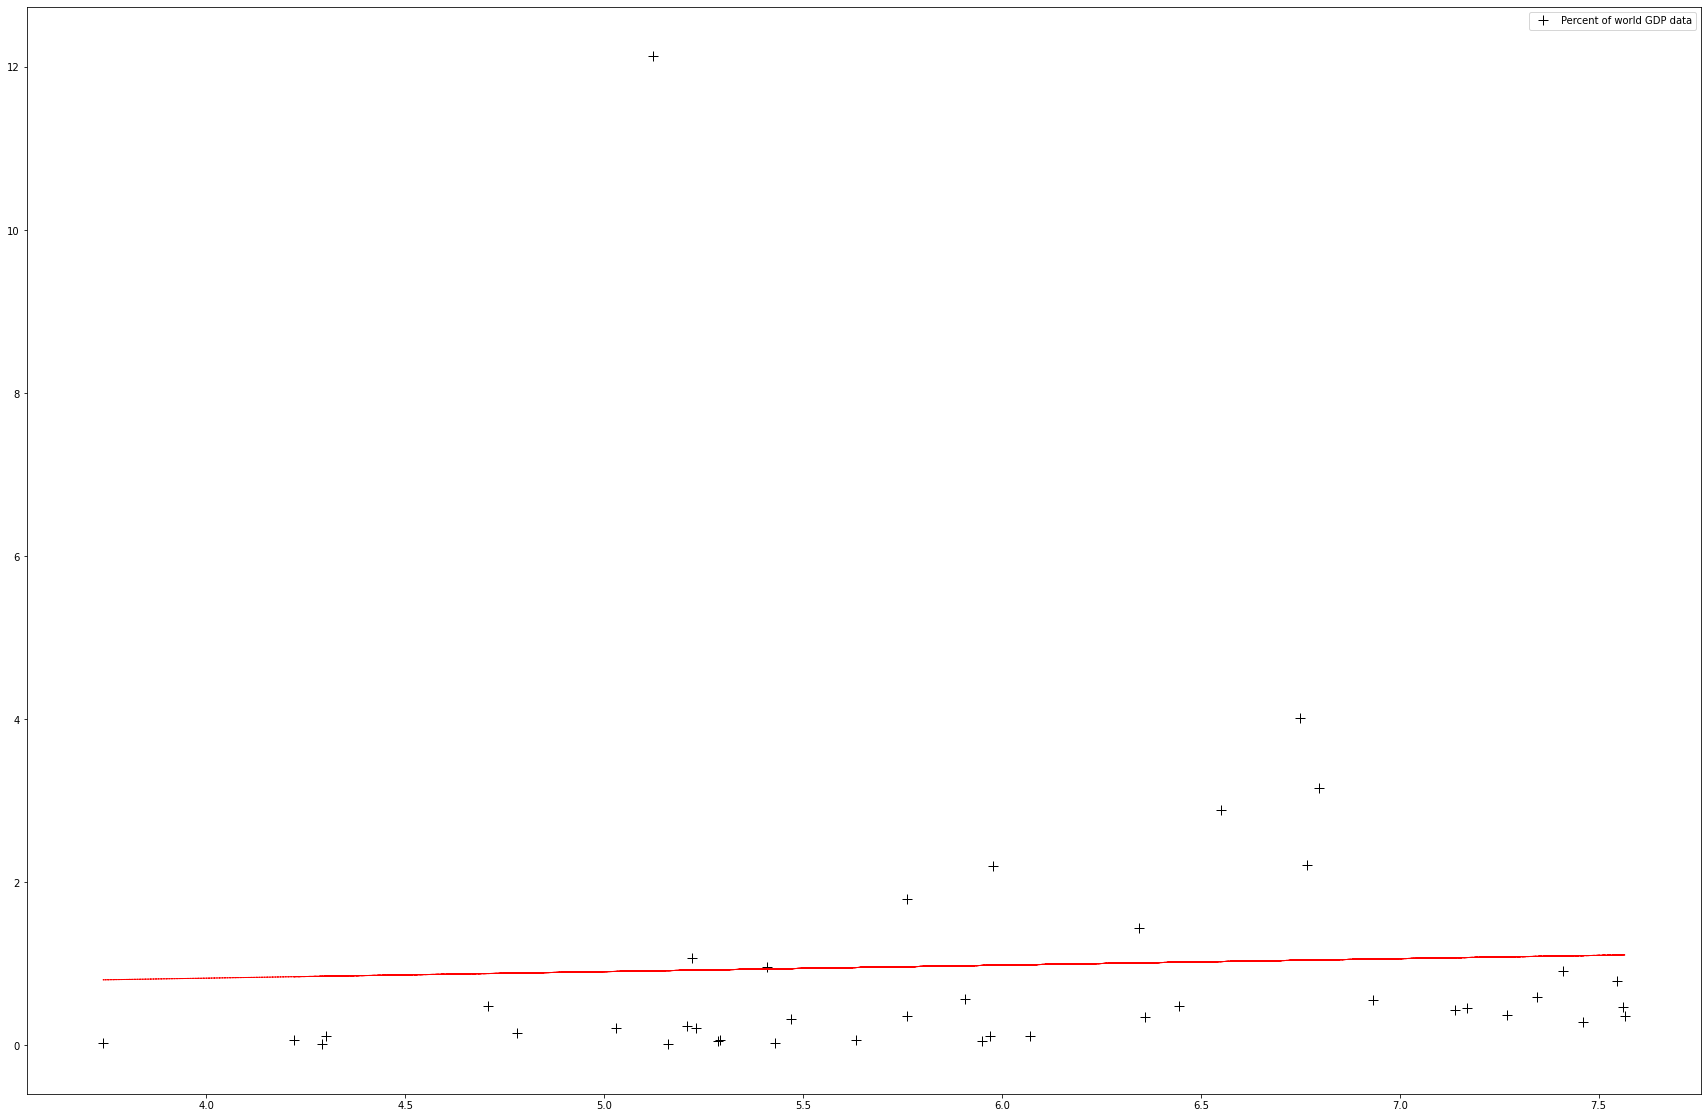

r-squared = 0.04053519206883379


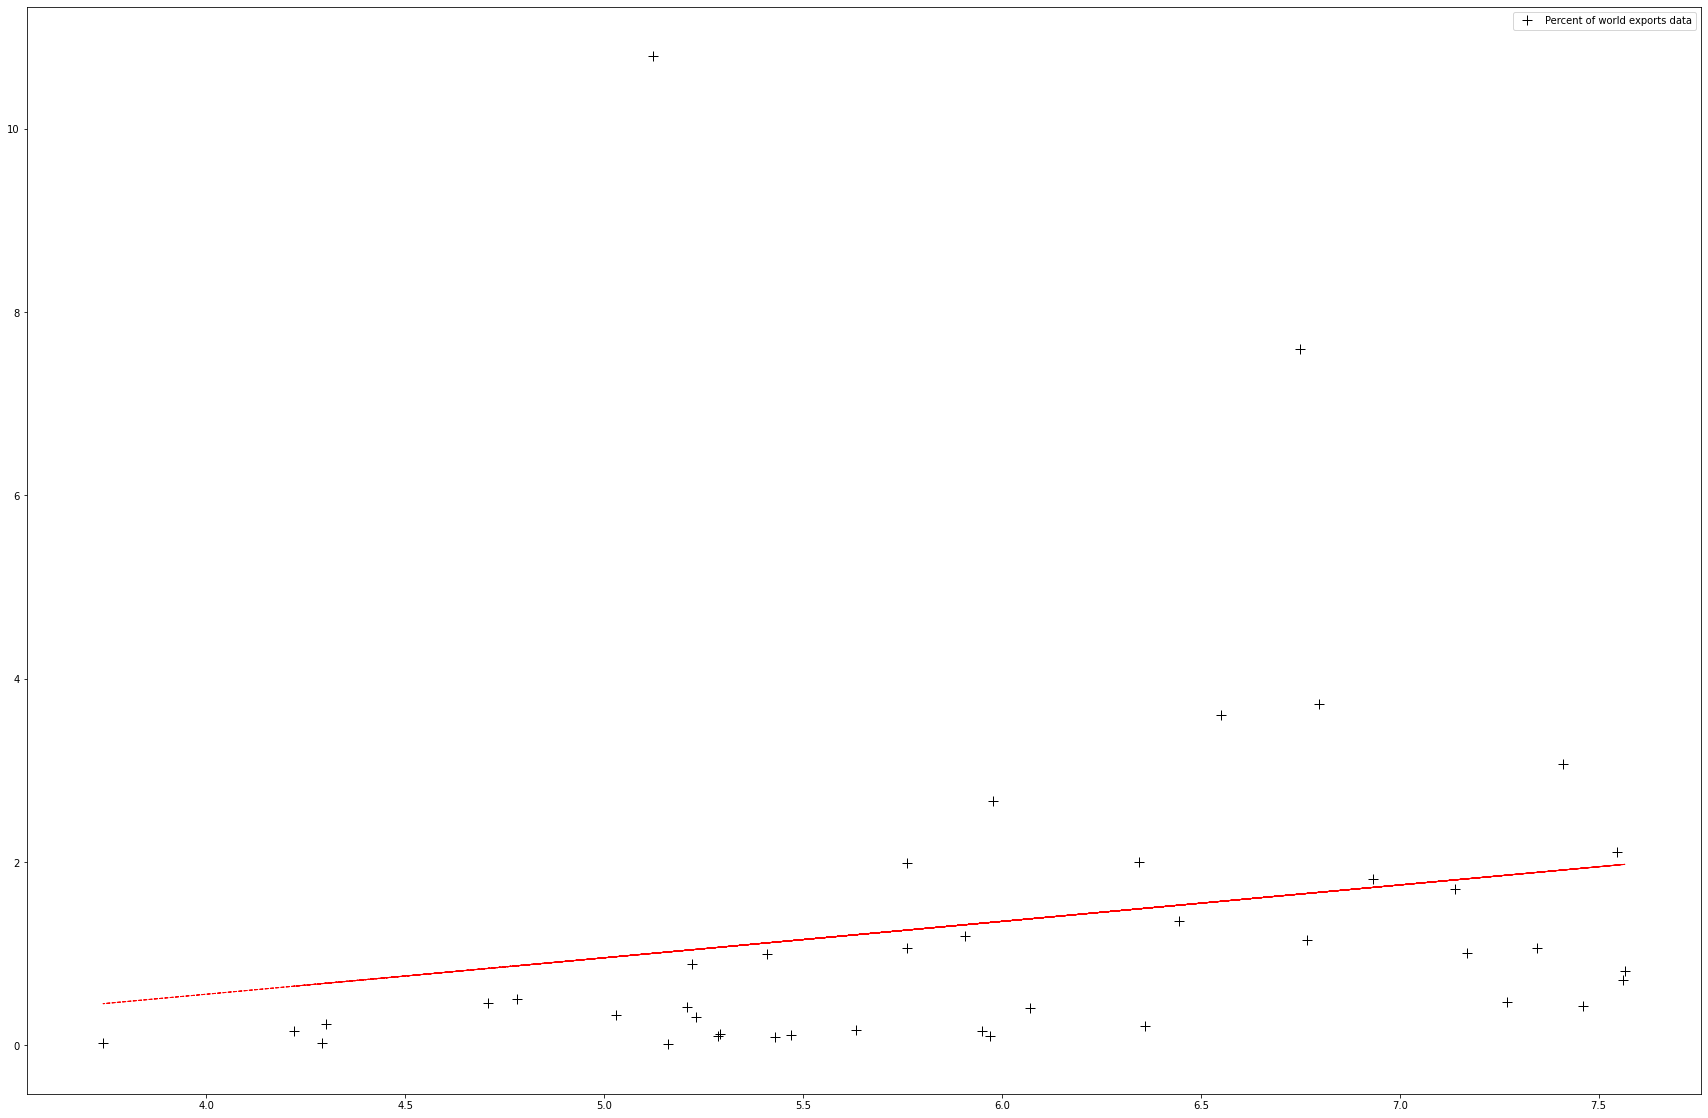

r-squared = 0.04036211898918048


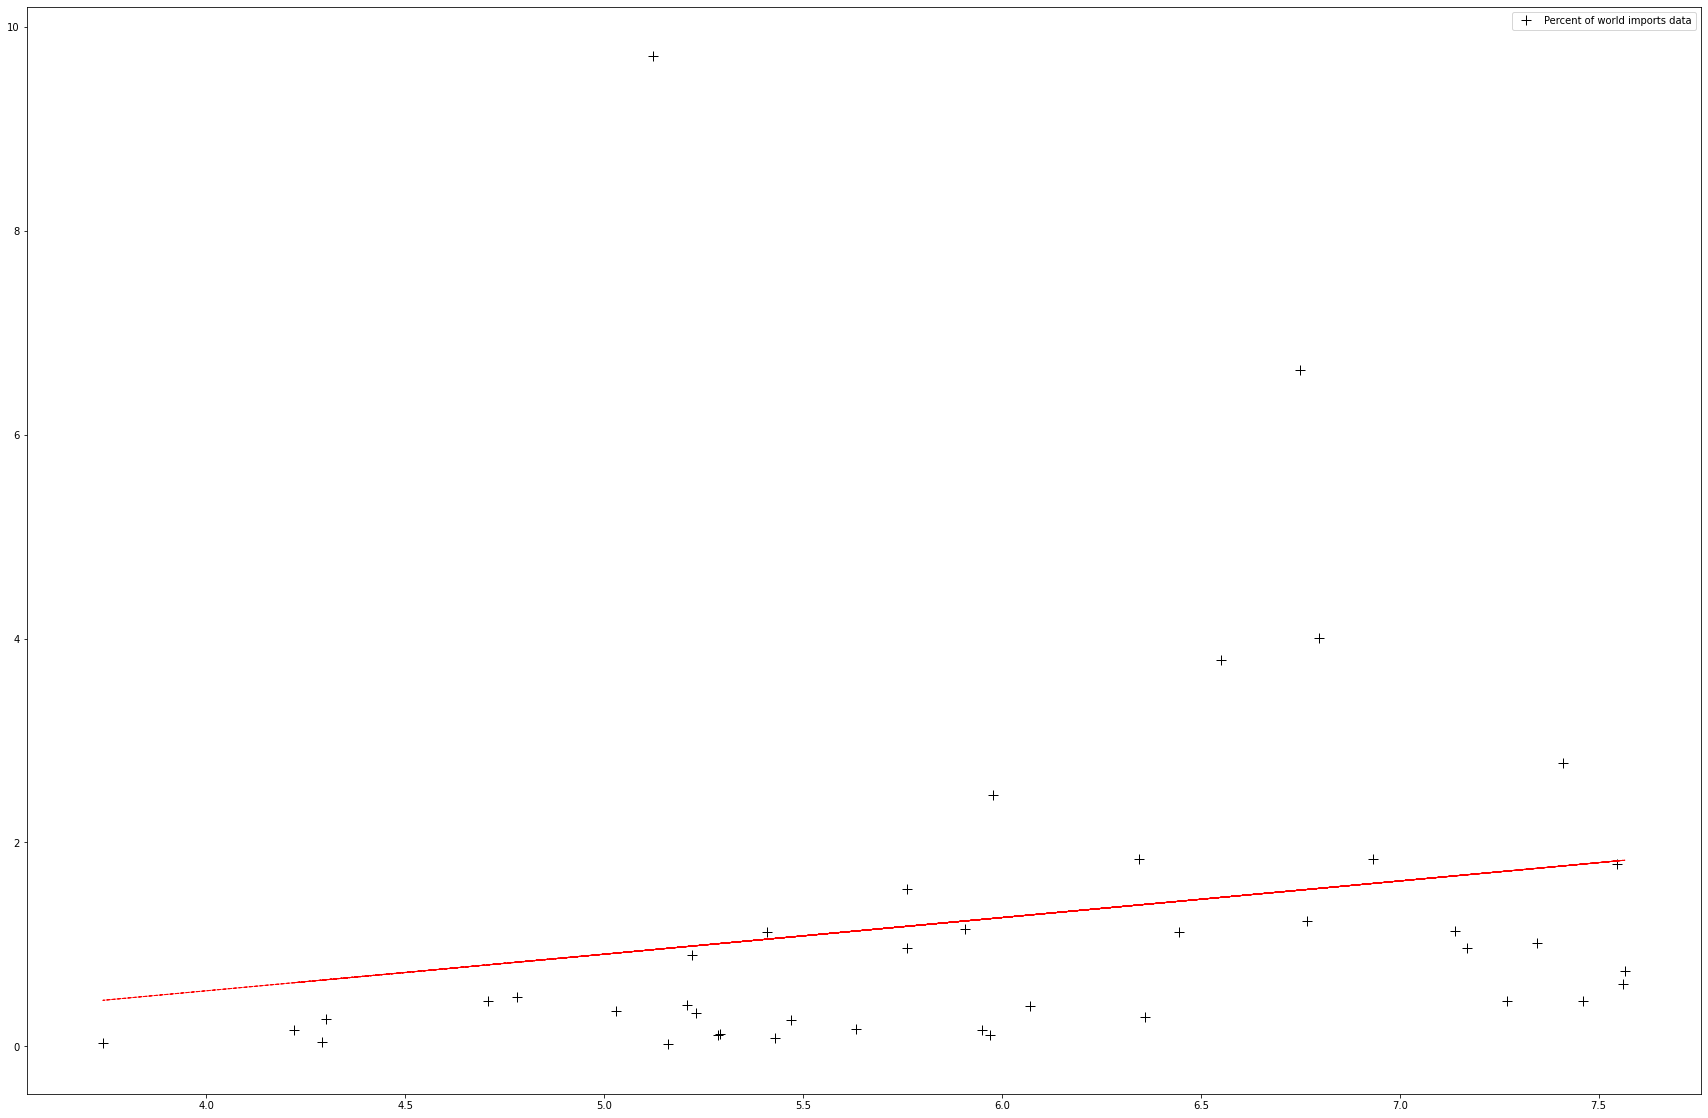

r-squared = 0.005156986809737088


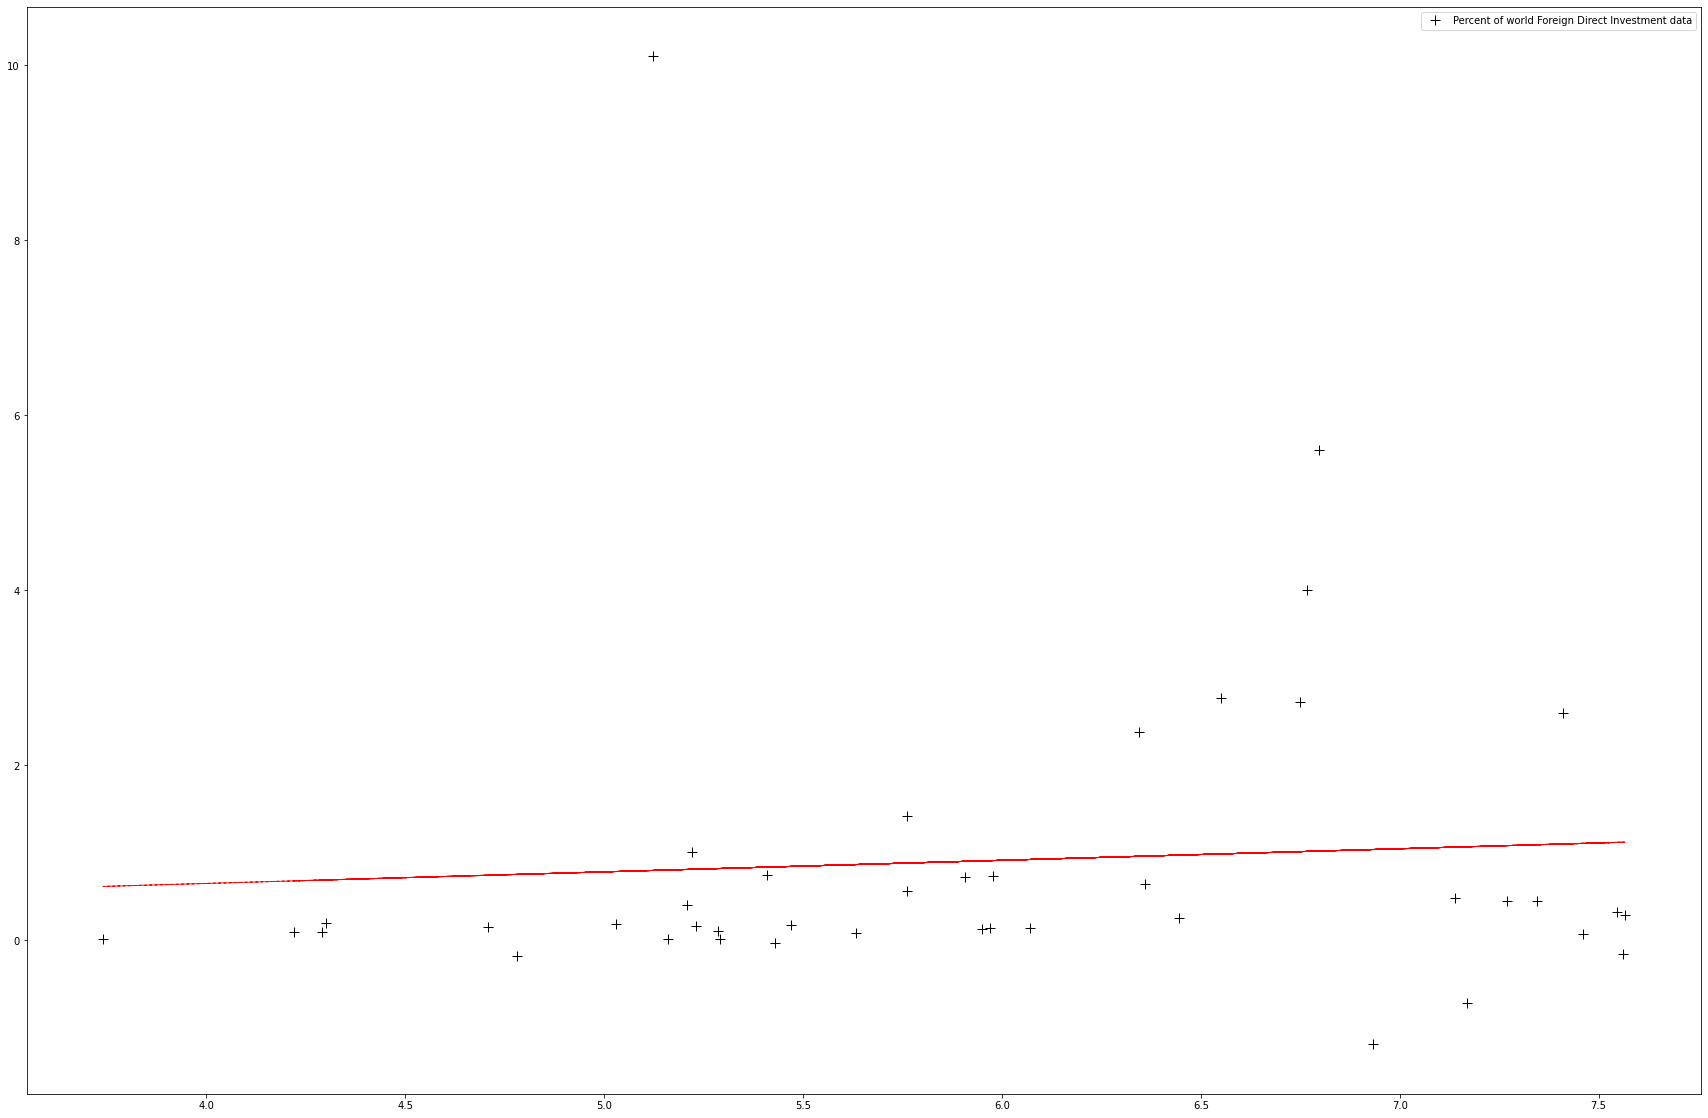

r-squared = 0.0061729658476169045


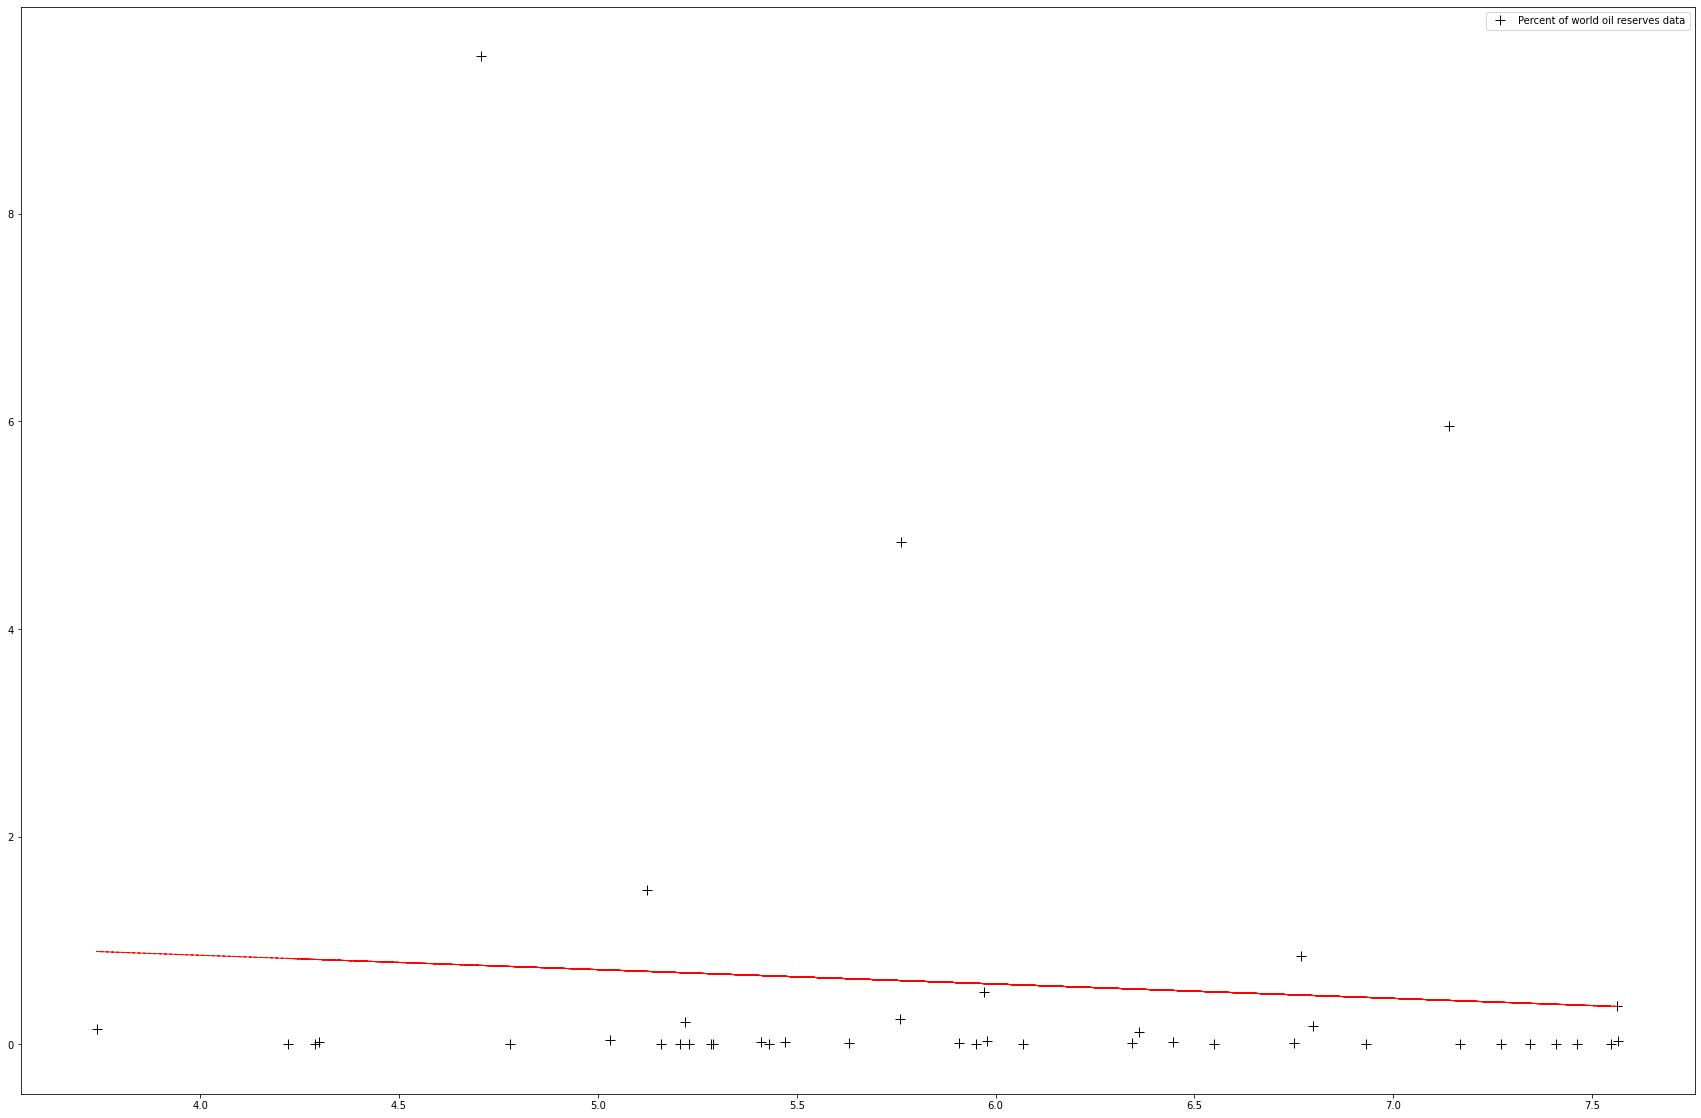

r-squared = 0.0004264660292698902


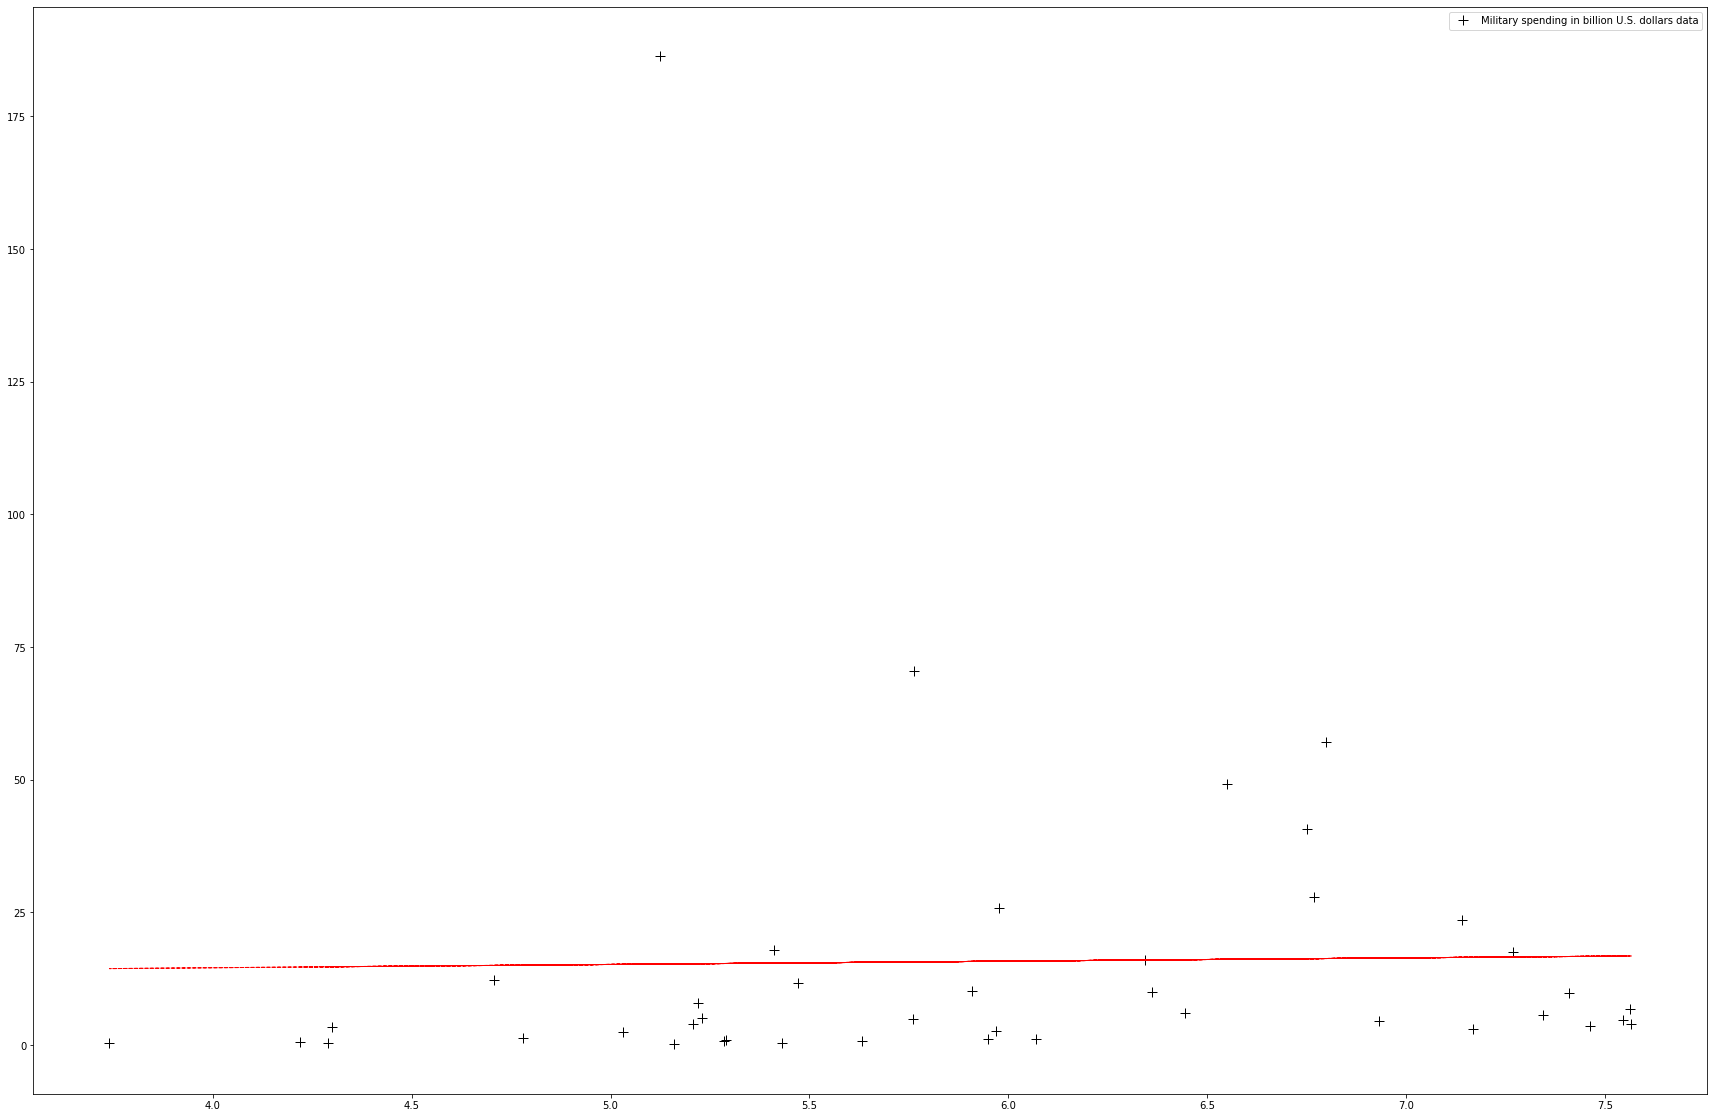

r-squared = 0.00018734580766511432


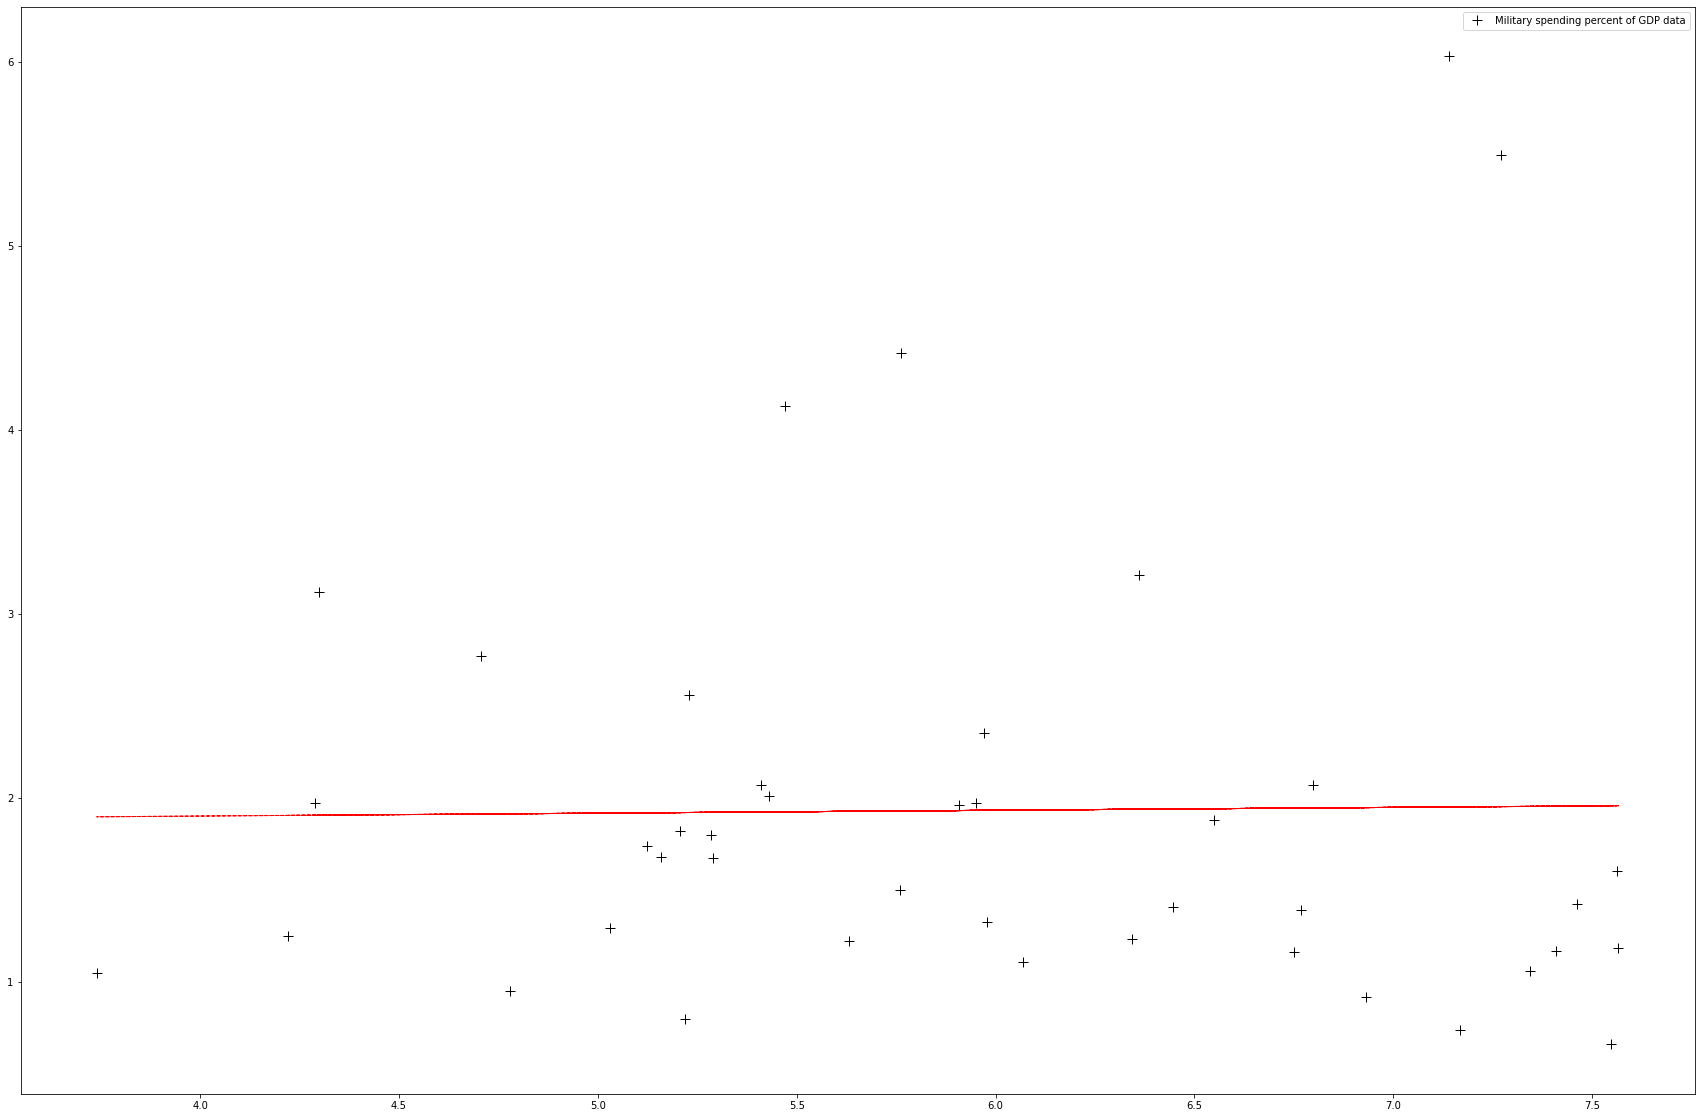

r-squared = 0.01857916211857811


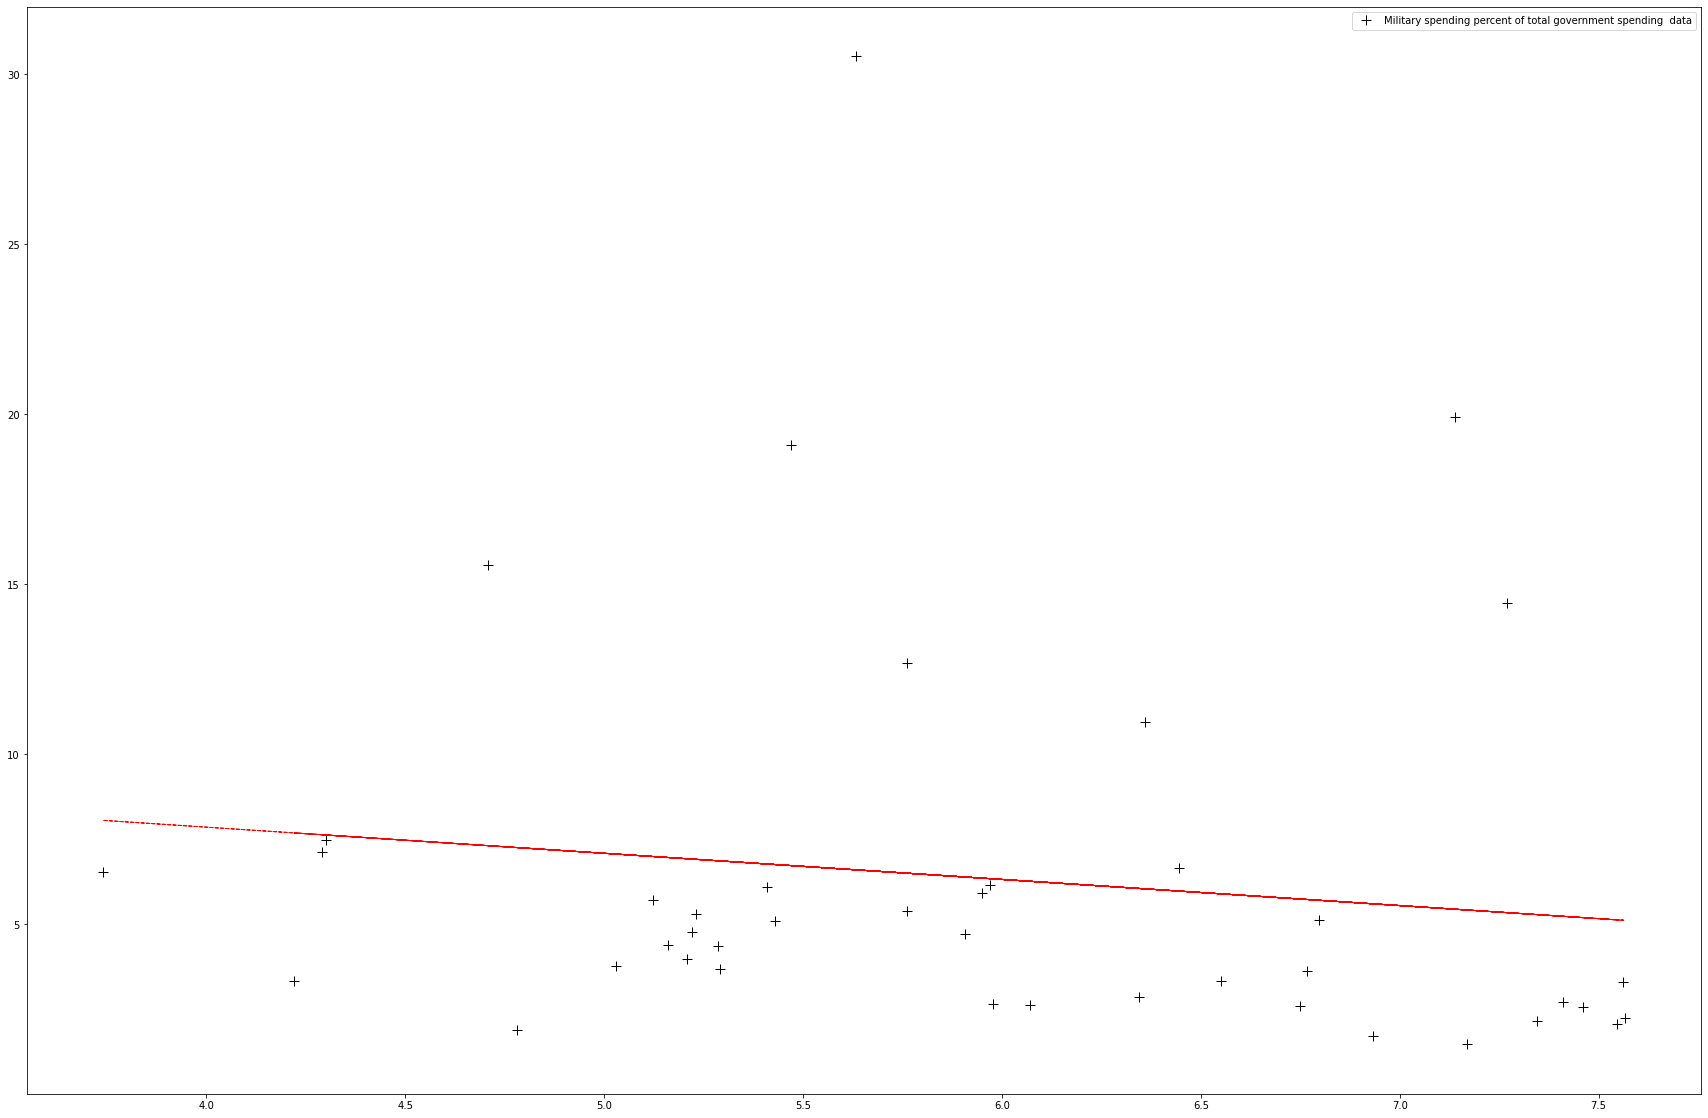

r-squared = 0.029175175039568853


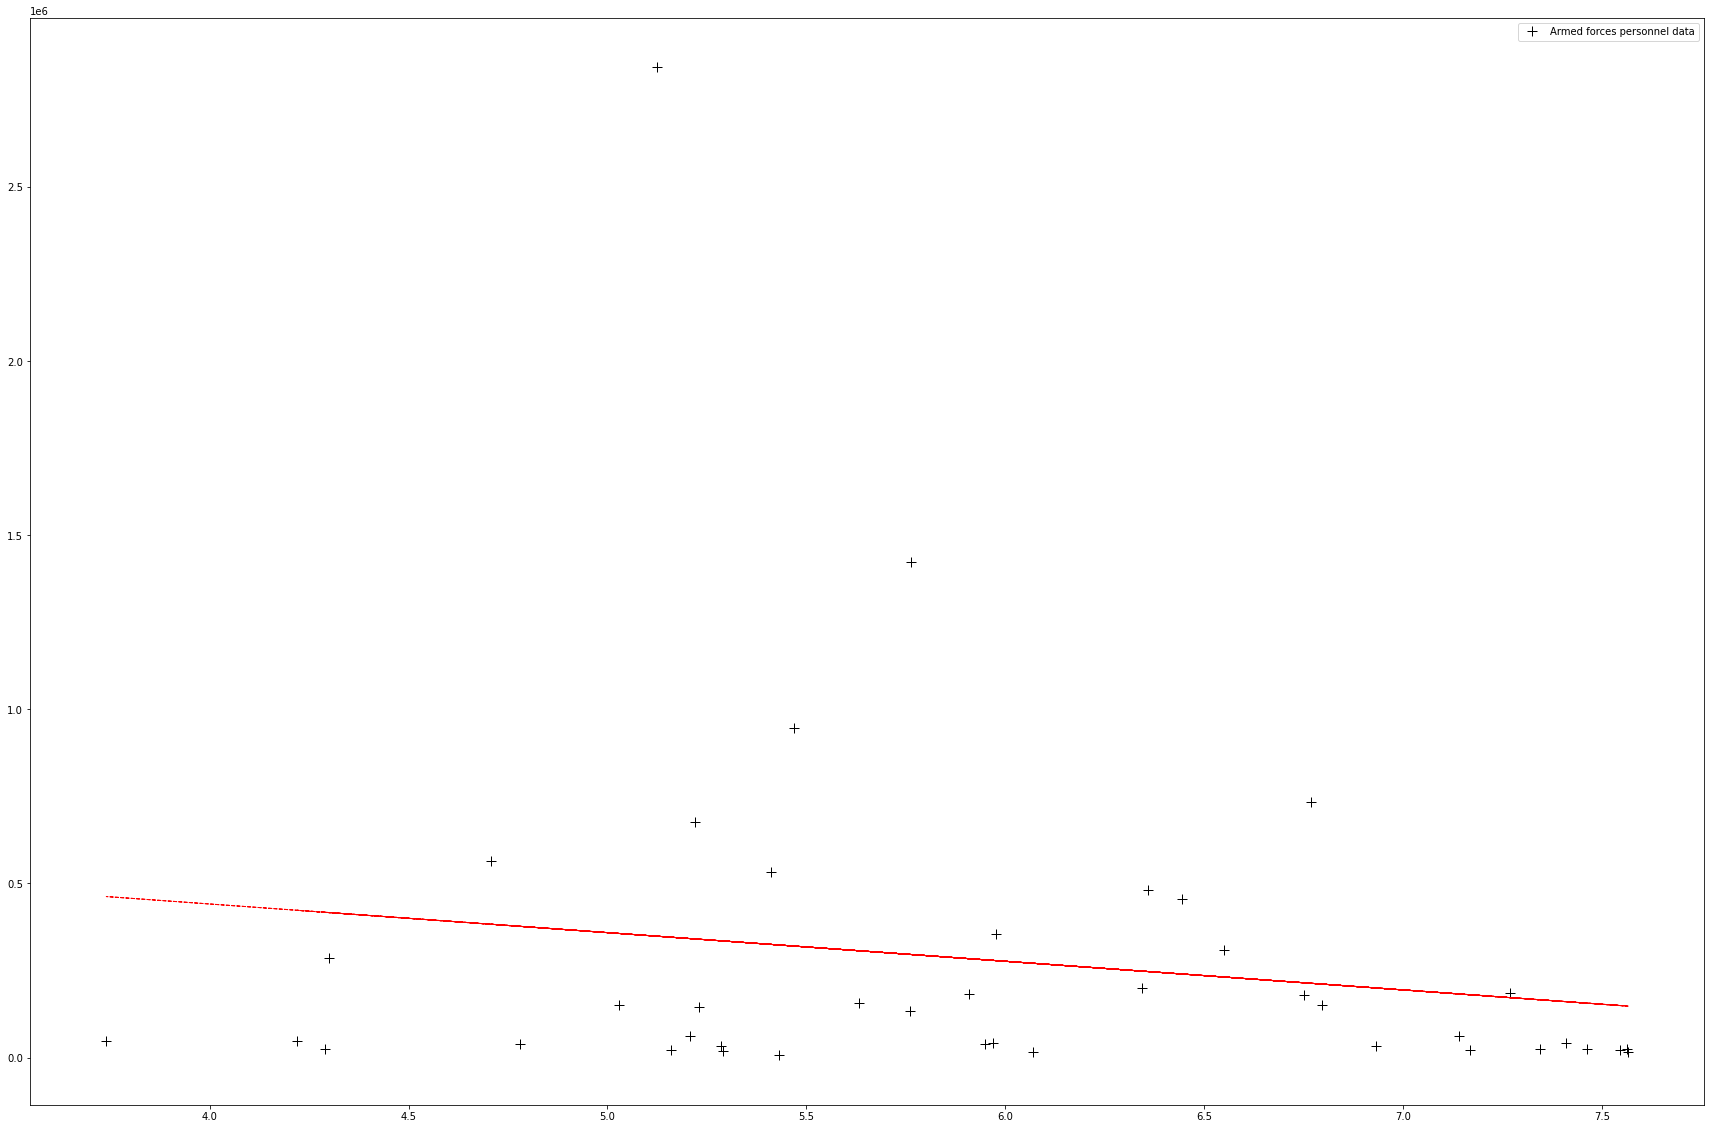

r-squared = 0.015606661625702432


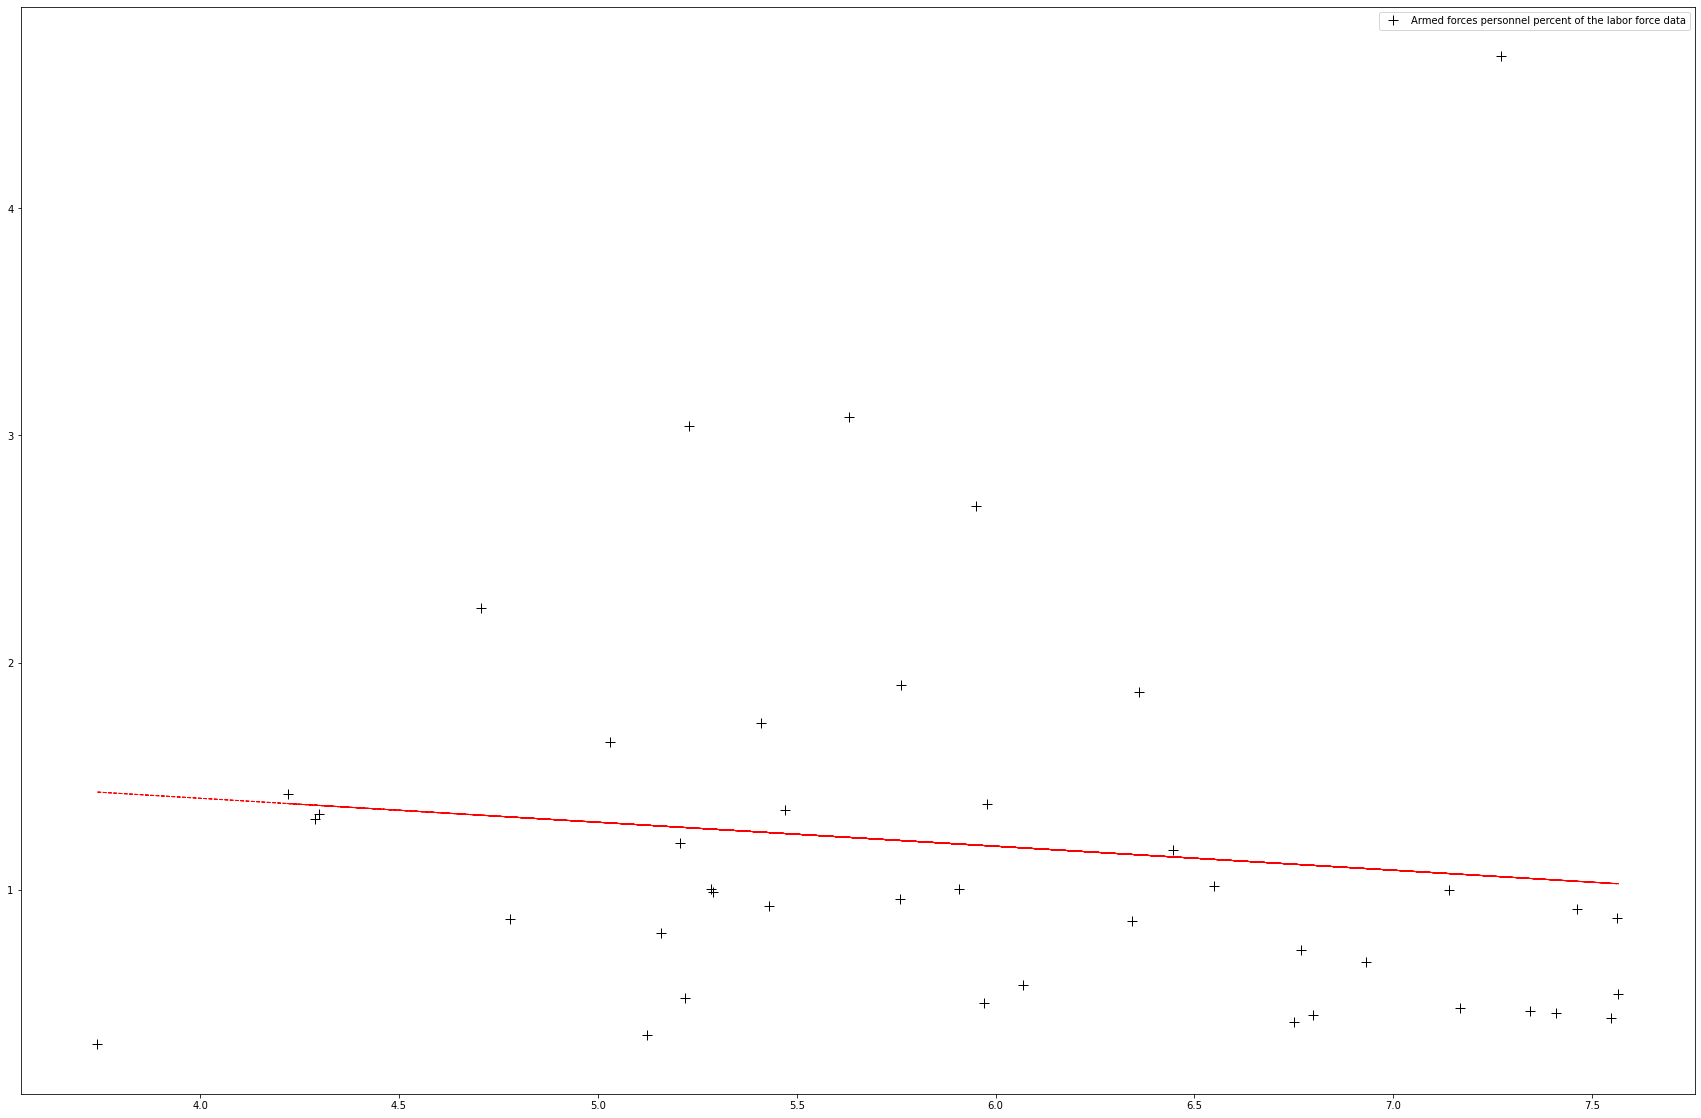

r-squared = 0.005556332263229989


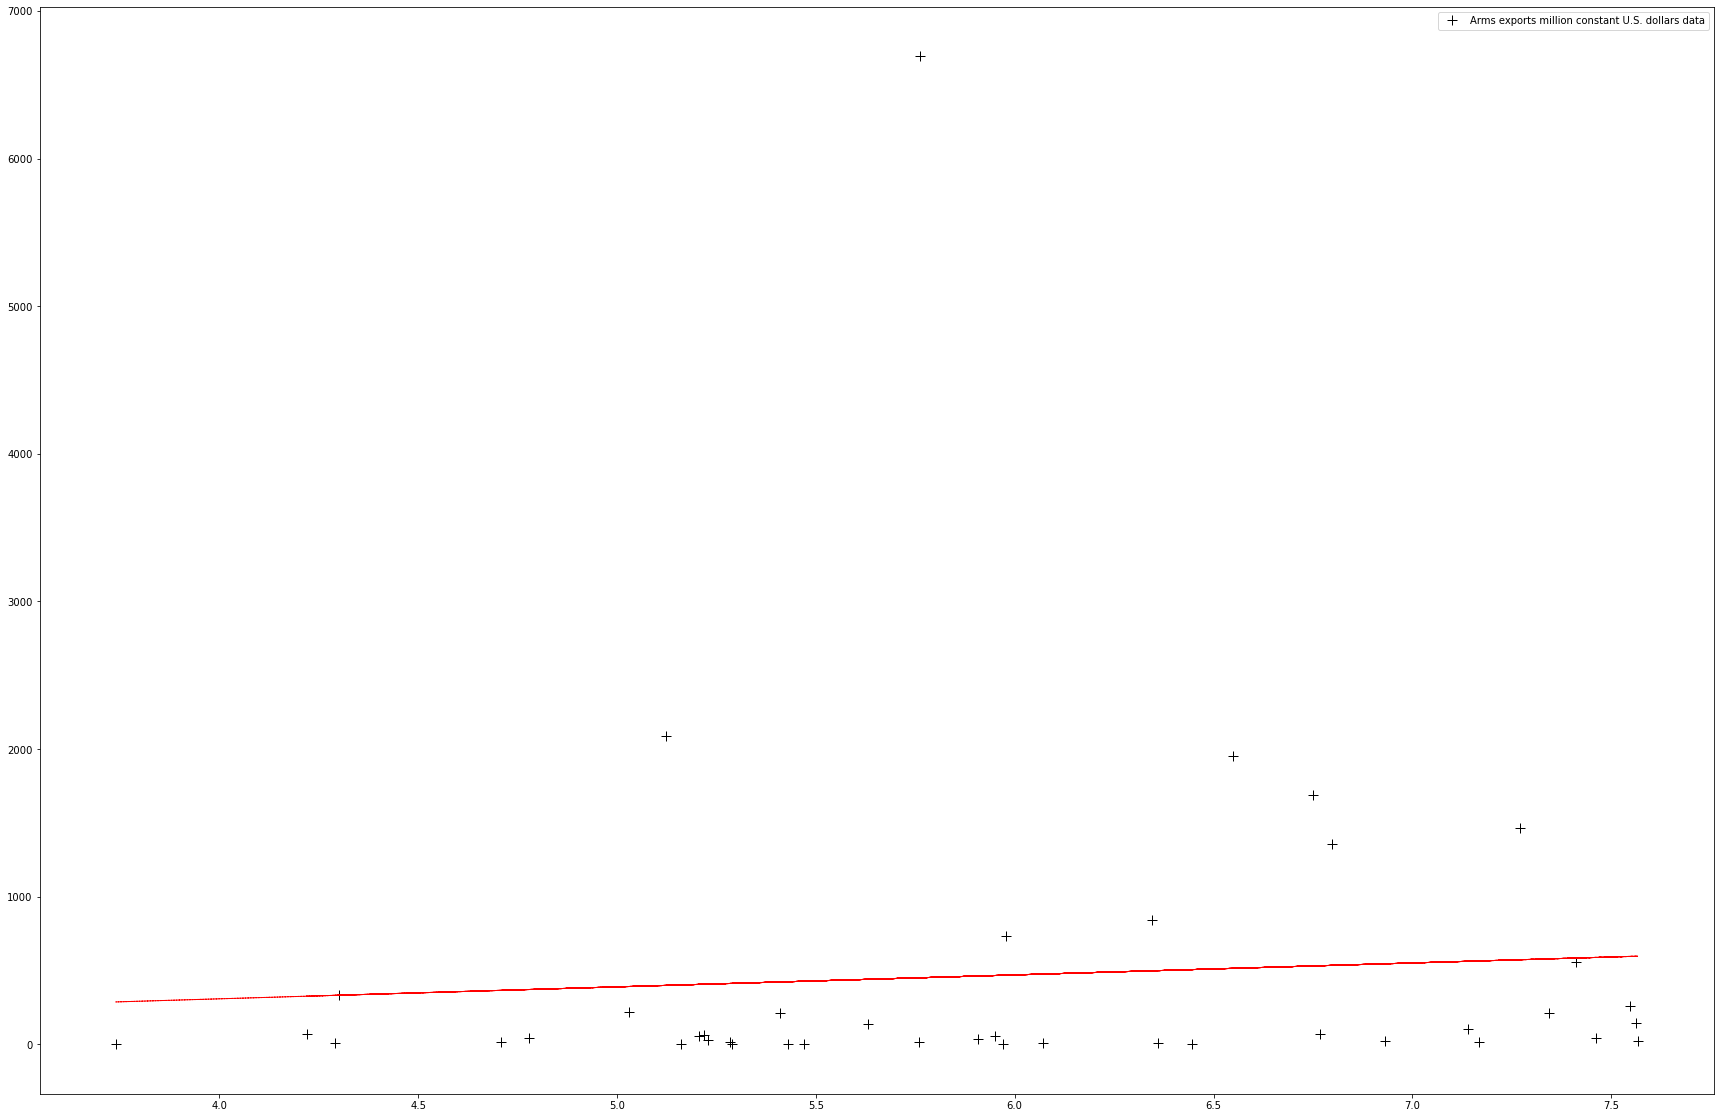

r-squared = 0.0288114697550714


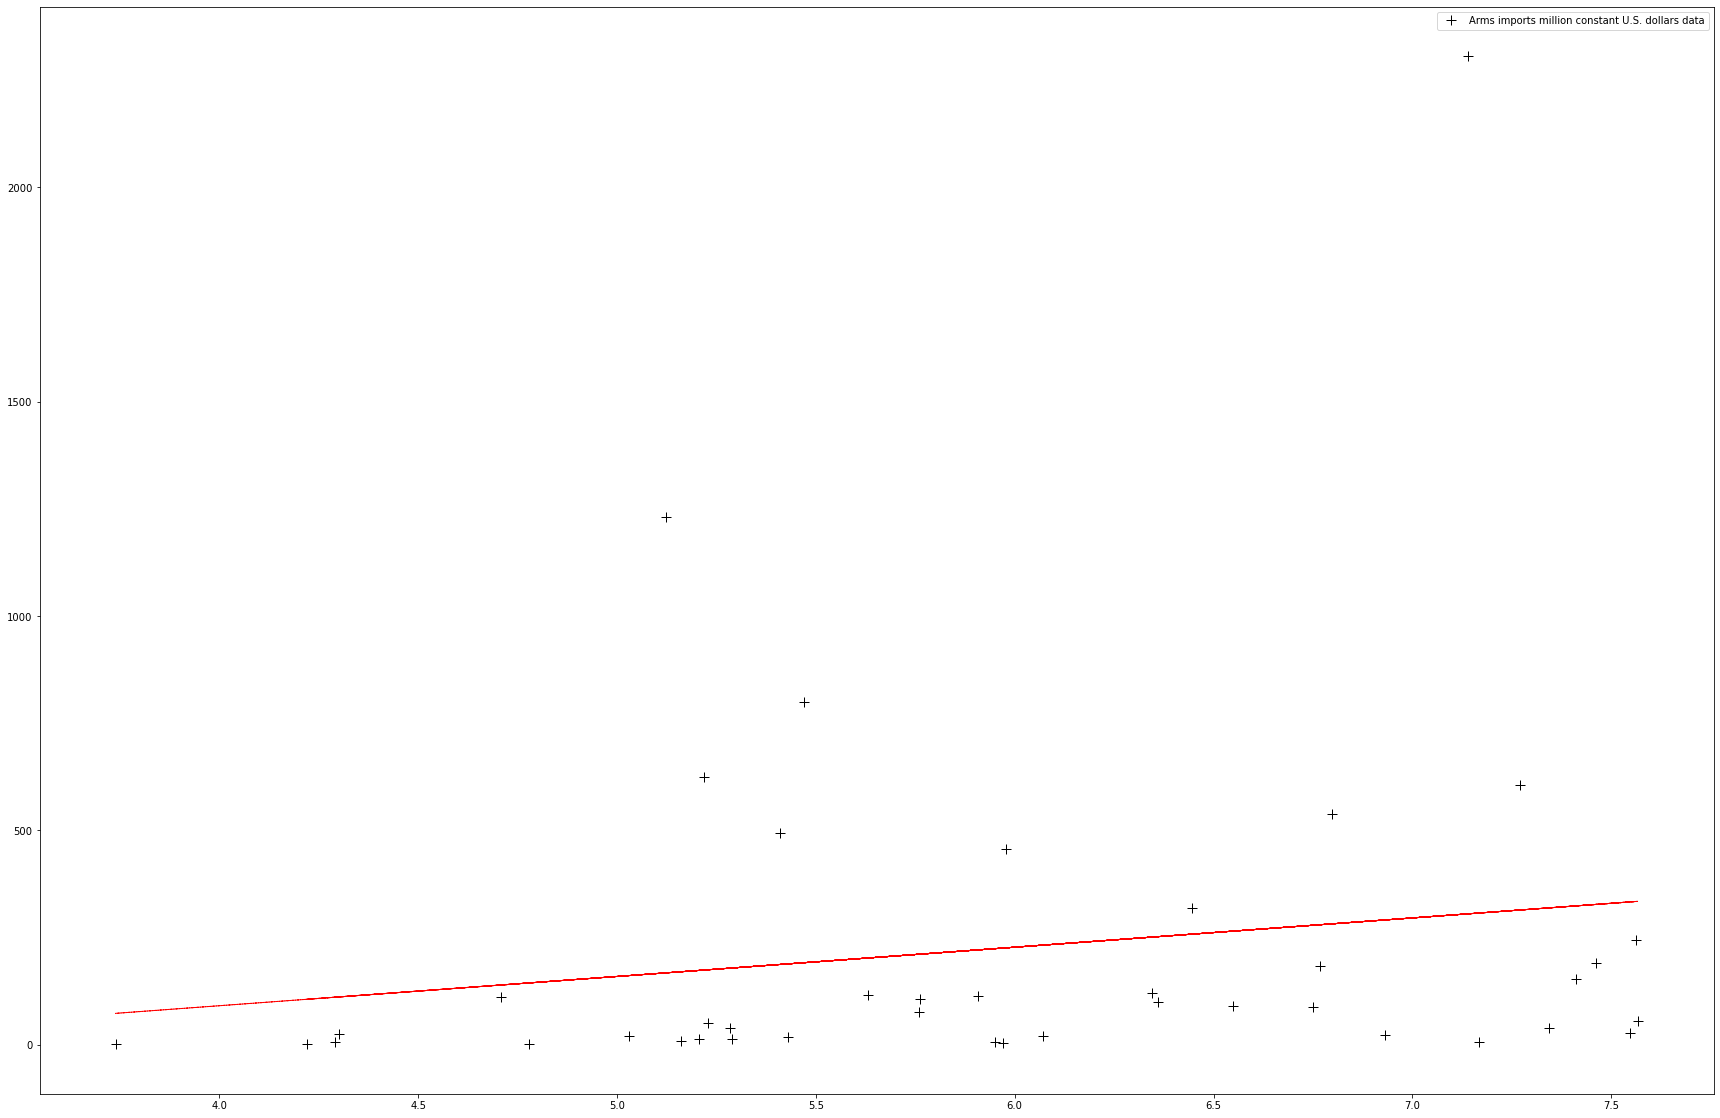

r-squared = 0.9999999999999996


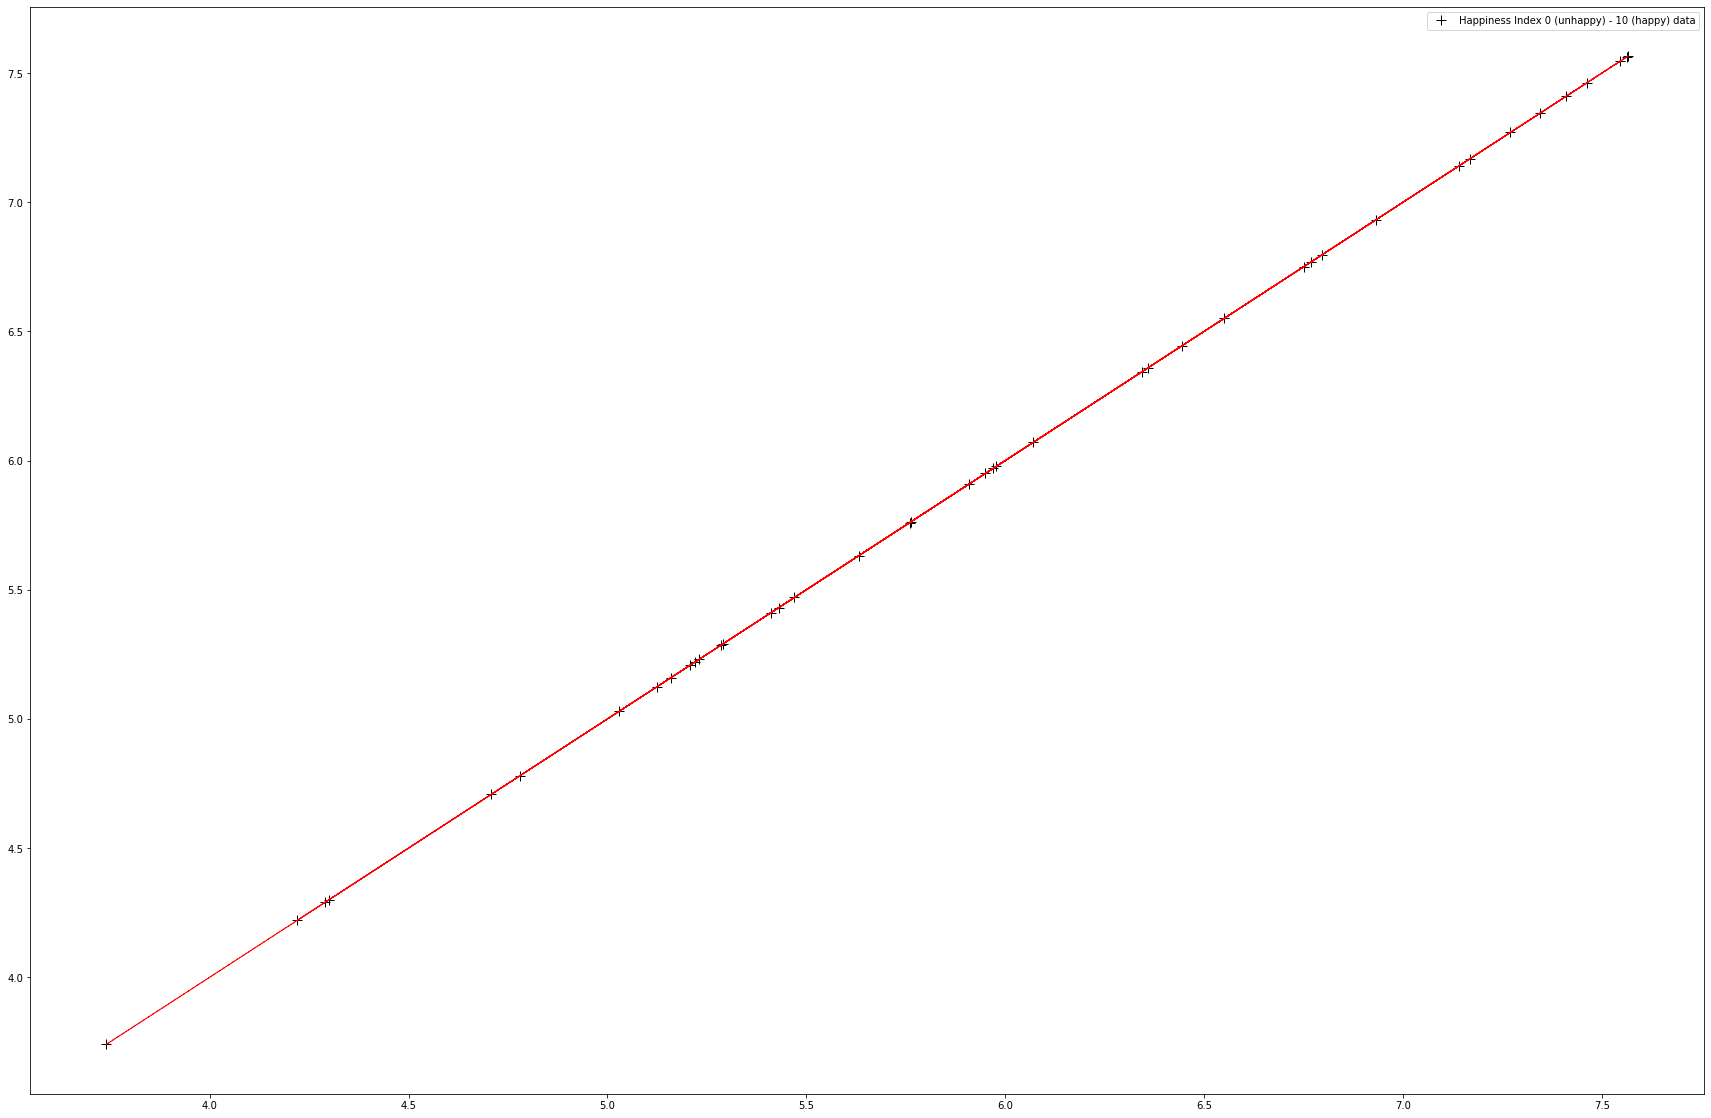

r-squared = 0.4571494567874114


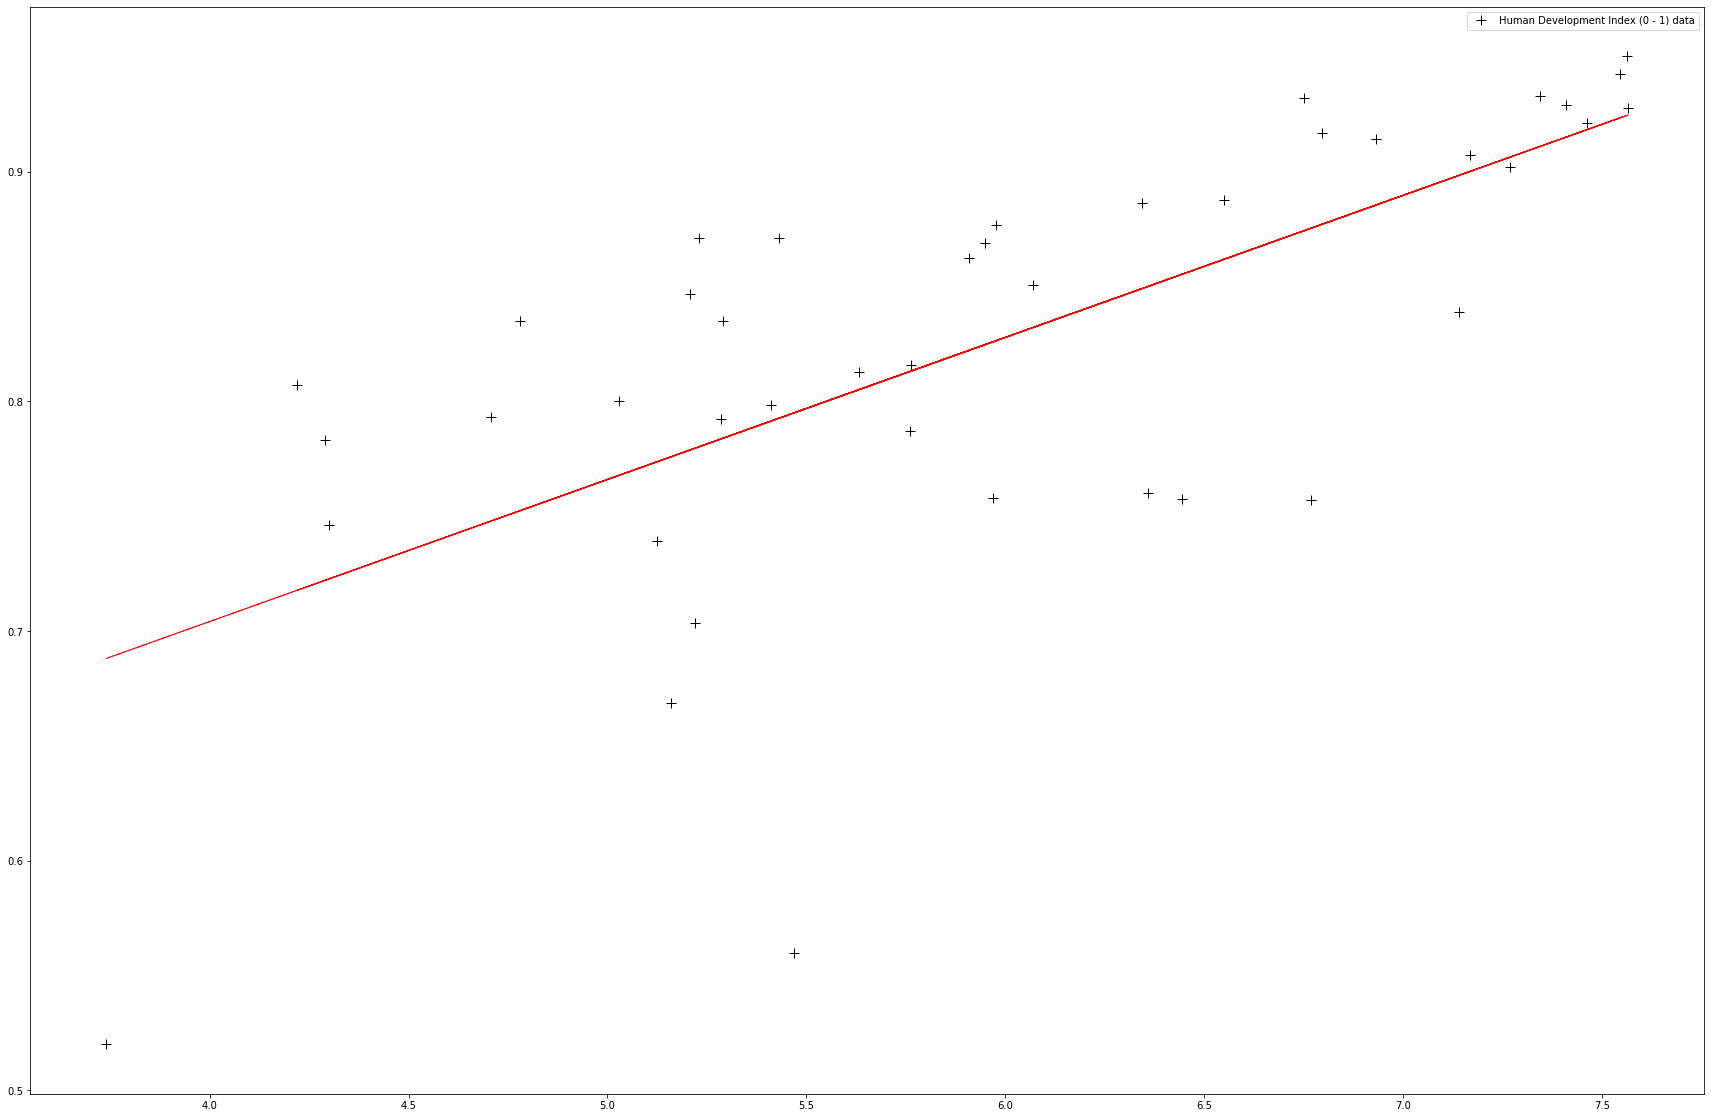

r-squared = 0.26300676791893485


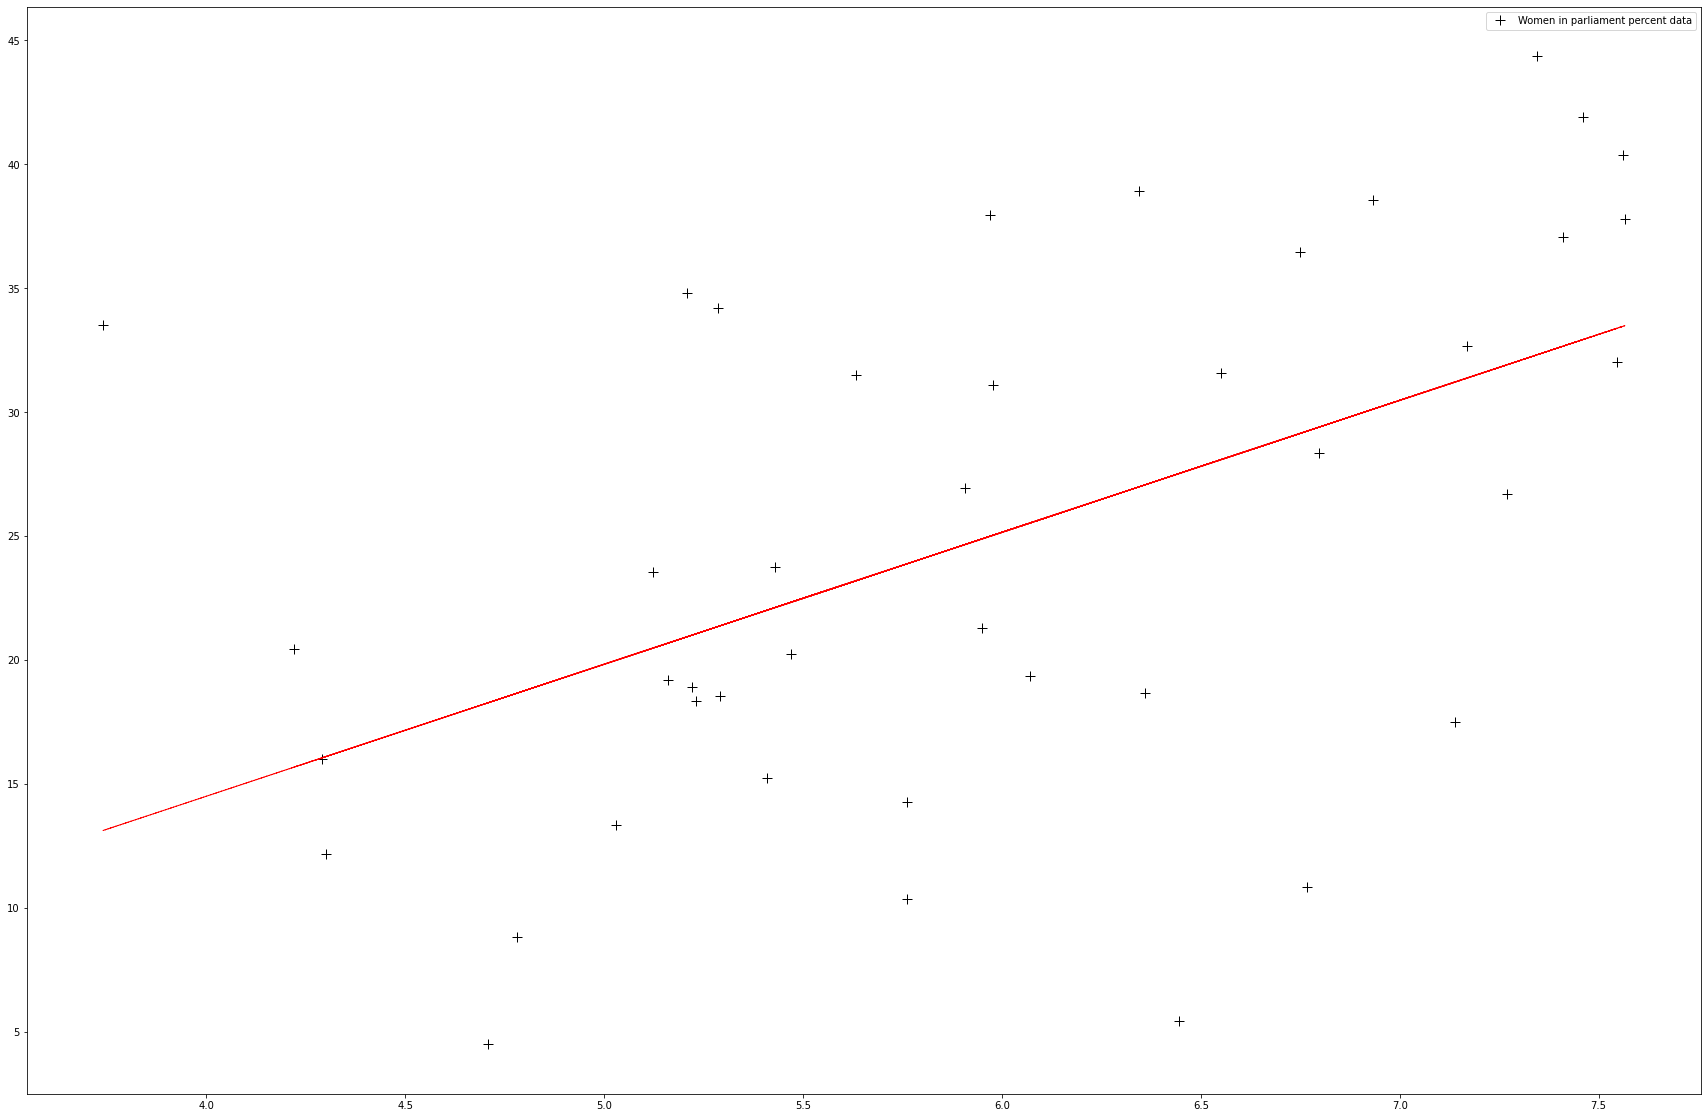

r-squared = 0.021911207098447065


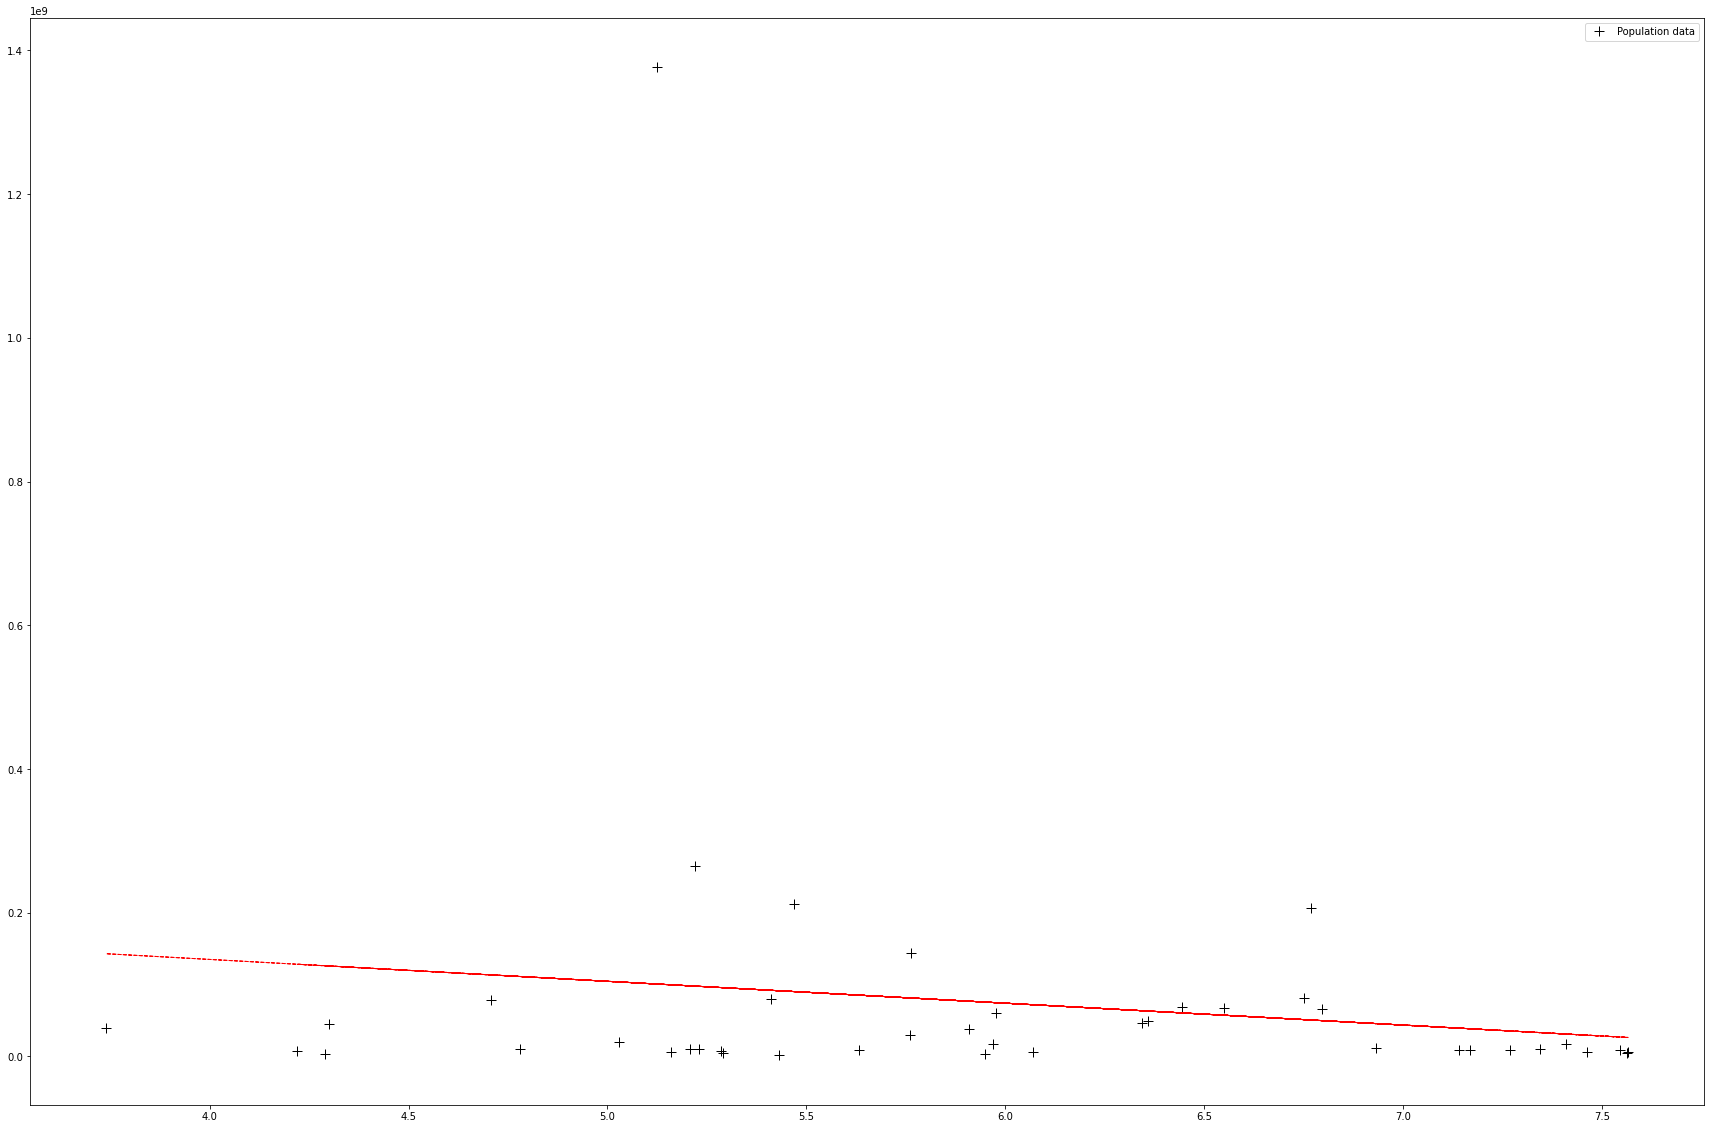

r-squared = 0.0033328456325798918


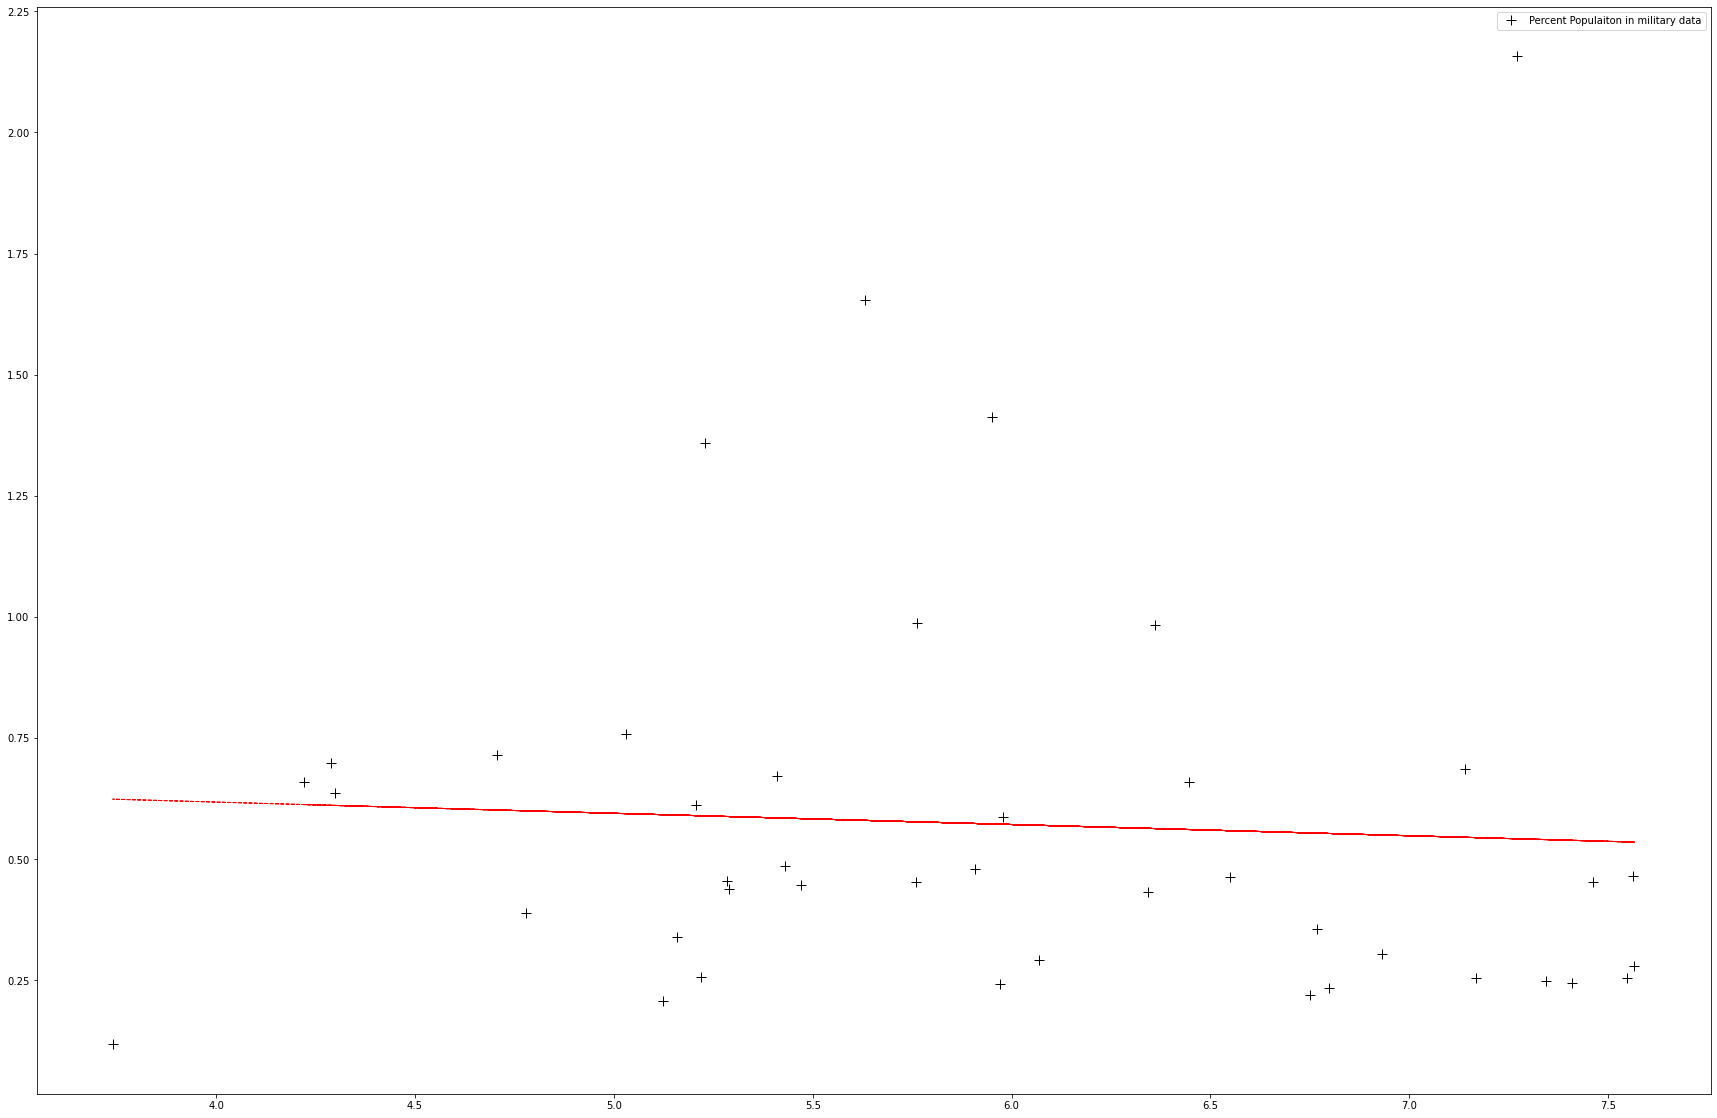

In [485]:
listy = df[['Population size in millions', 'Gini income inequality index',
       'Percent of world population', 'Percent of world GDP',
       'Percent of world exports', 'Percent of world imports',
       'Percent of world Foreign Direct Investment',
       'Percent of world oil reserves',
       'Military spending in billion U.S. dollars',
       'Military spending percent of GDP',
       'Military spending percent of total government spending ',
       'Armed forces personnel',
       'Armed forces personnel percent of the labor force',
       'Arms exports million constant U.S. dollars',
       'Arms imports million constant U.S. dollars',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Human Development Index (0 - 1)', 'Women in parliament percent',
       'Population', 'Percent Populaiton in military']]
for item in listy:

    x= df_clean_mean["Happiness Index 0 (unhappy) - 10 (happy)"]
    y= df_clean_mean[item]

    plt.plot(x,y,"+", ms=10, mec="k", label='%s data' % item)
   
    plt.legend()

    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)

    plt.plot(x, y_hat, "r--", lw=1)
   
    corr_matrix = np.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq2 = corr**2
 
    print("r-squared = " + str(R_sq2))
    plt.show()


### the followign graphs sho tat the size and funding for the military is inversely corelated with happiness index. 

0.05177475135674069


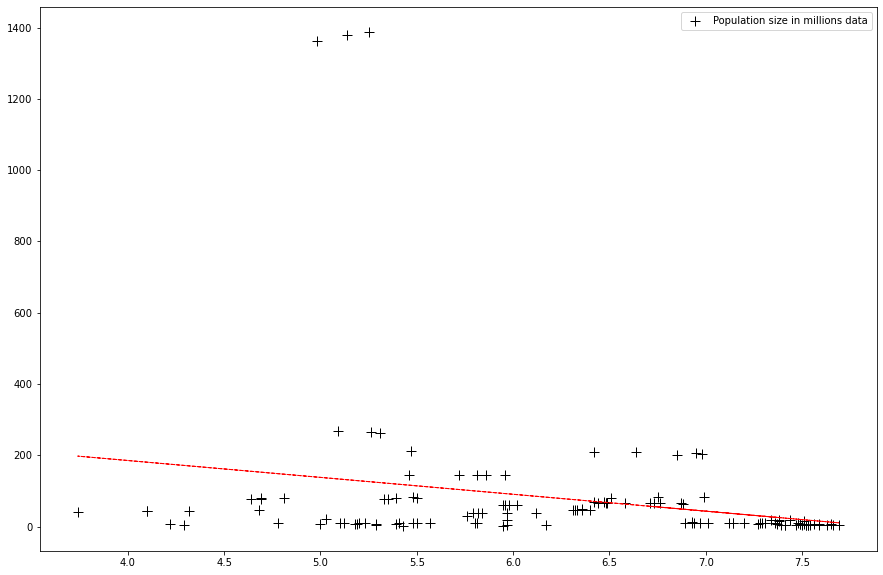

0.06935192226938665


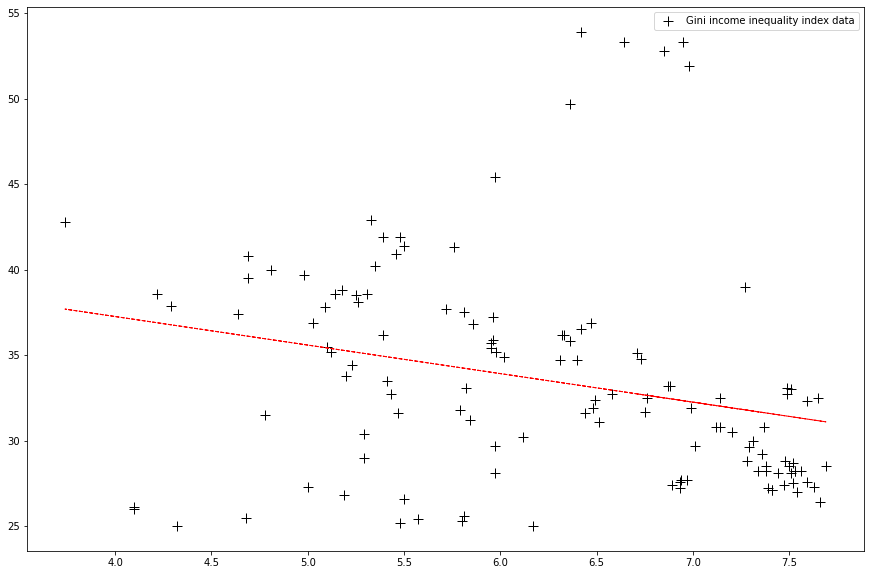

0.05136510438791186


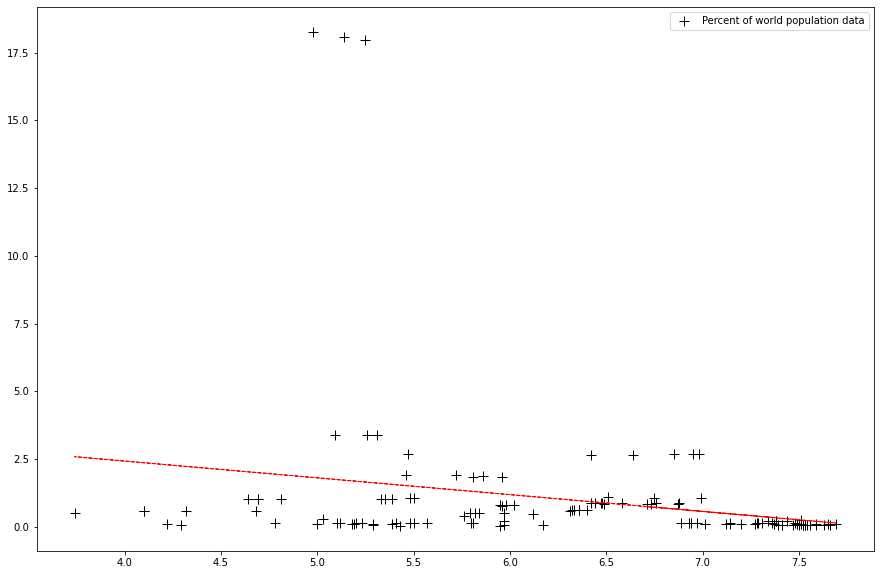

0.0022969616030453187


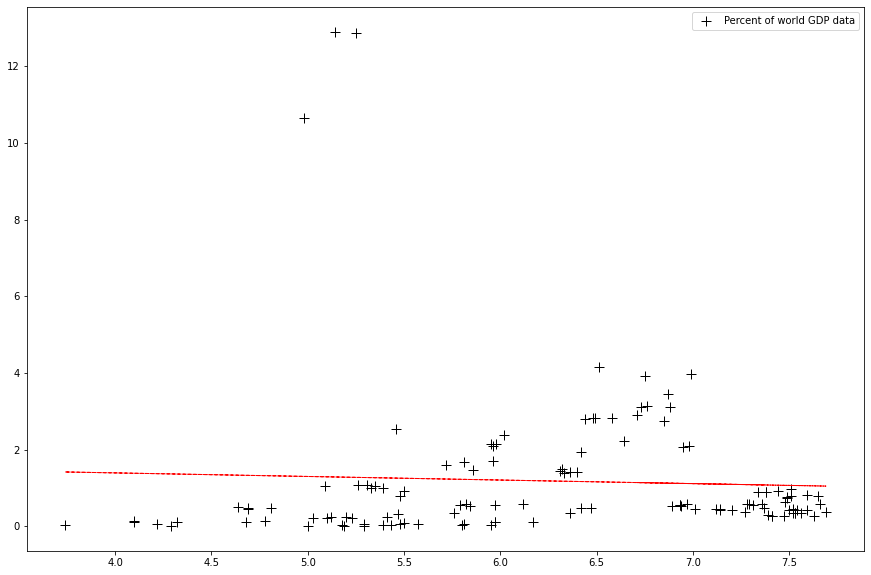

0.01388418810941945


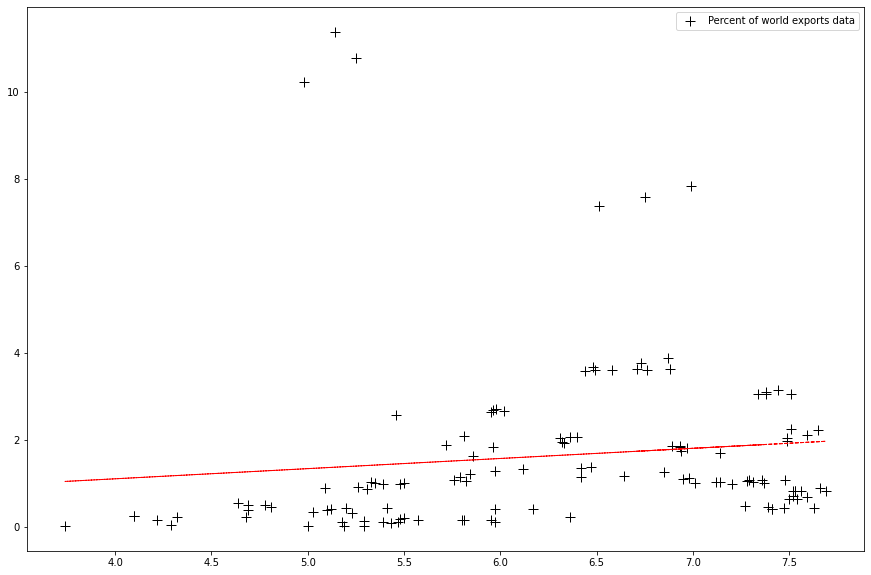

0.014315263680177931


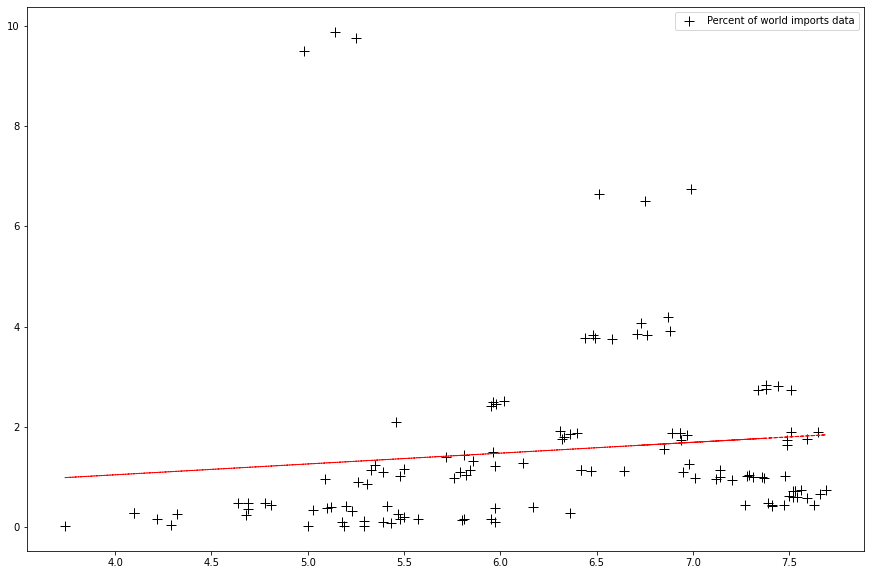

0.00025864797659099414


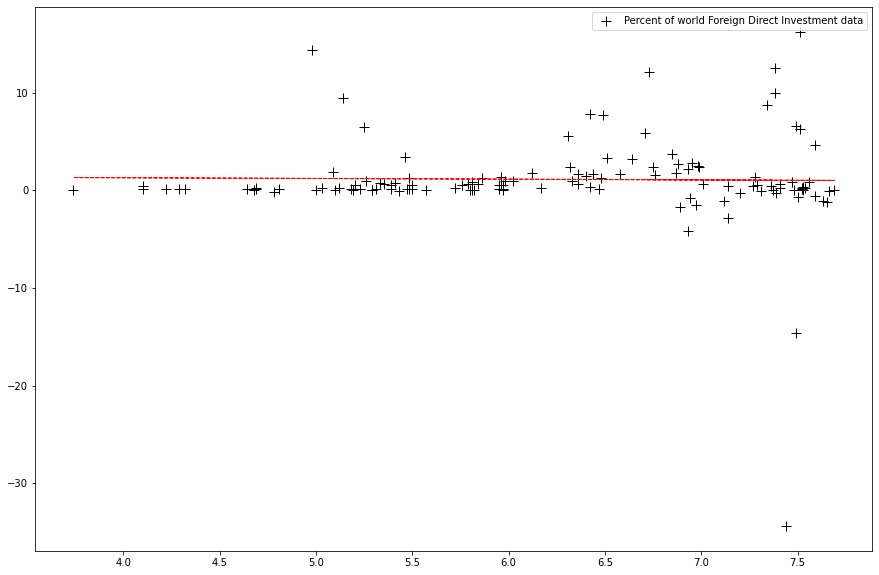

0.07045829381752798


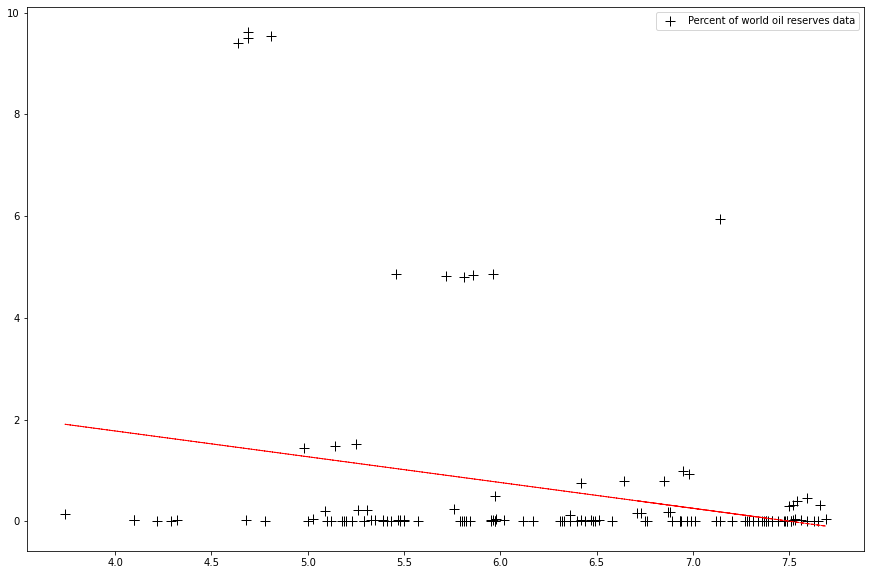

0.012412722895197802


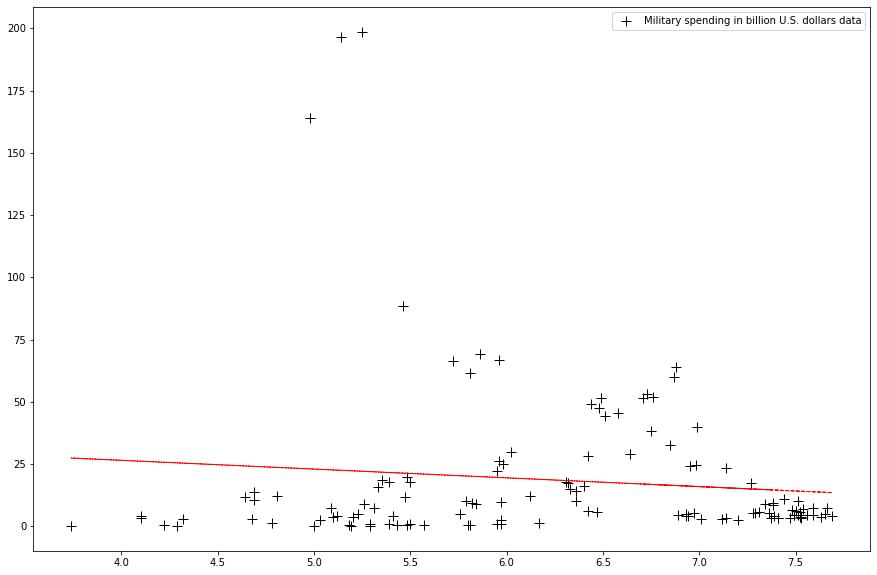

0.1007065698247898


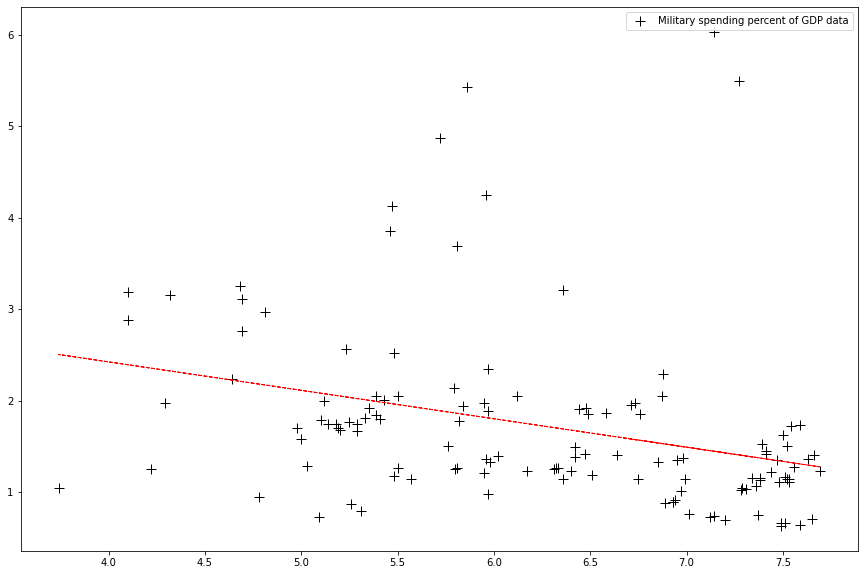

0.1313242833778474


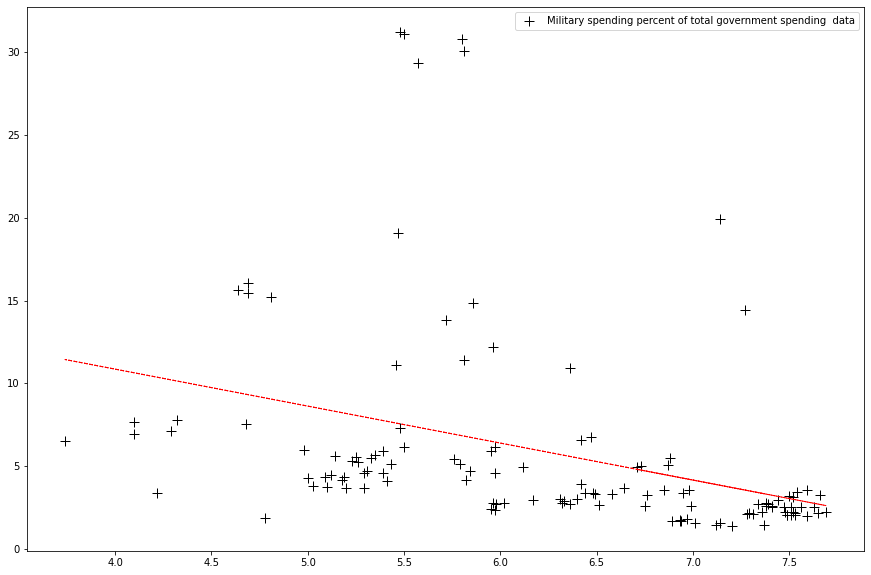

0.10498585892234427


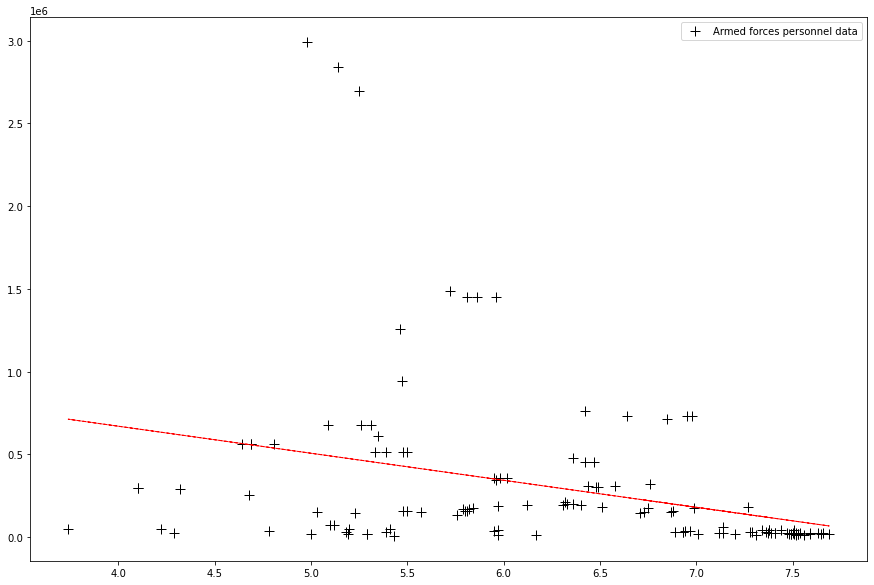

0.1582947163396577


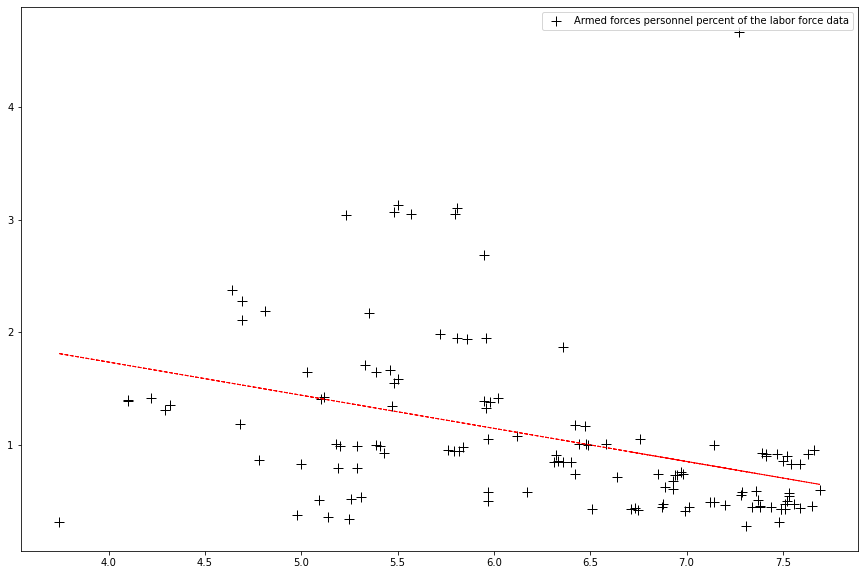

0.0036427745830713747


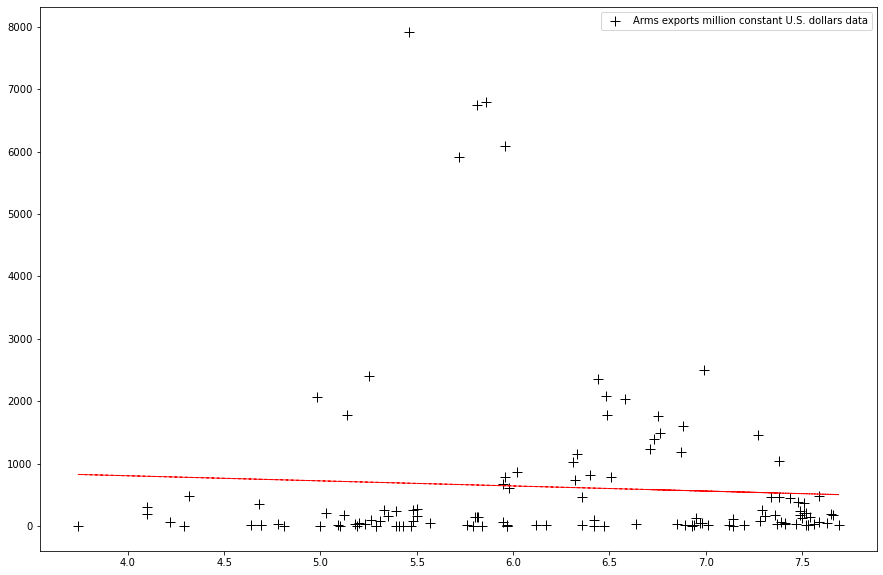

0.002080340813635874


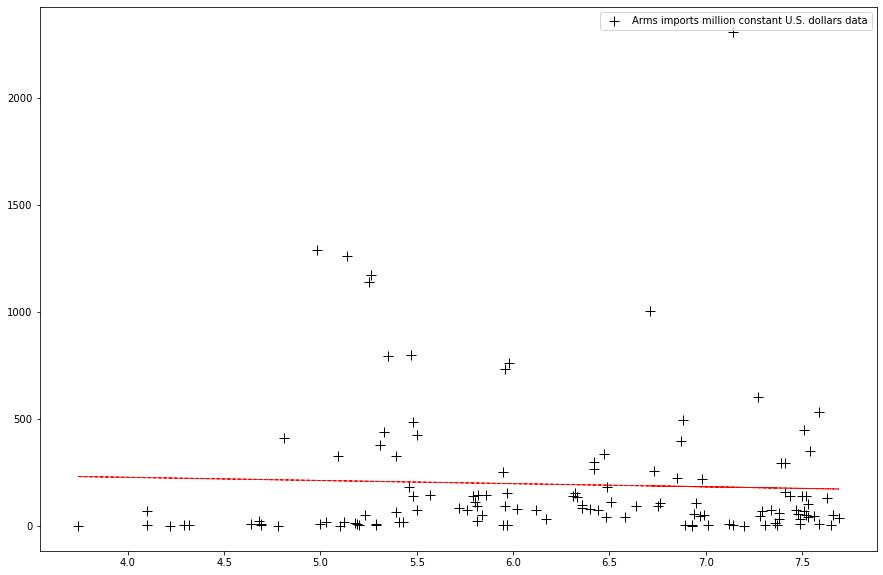

1.0


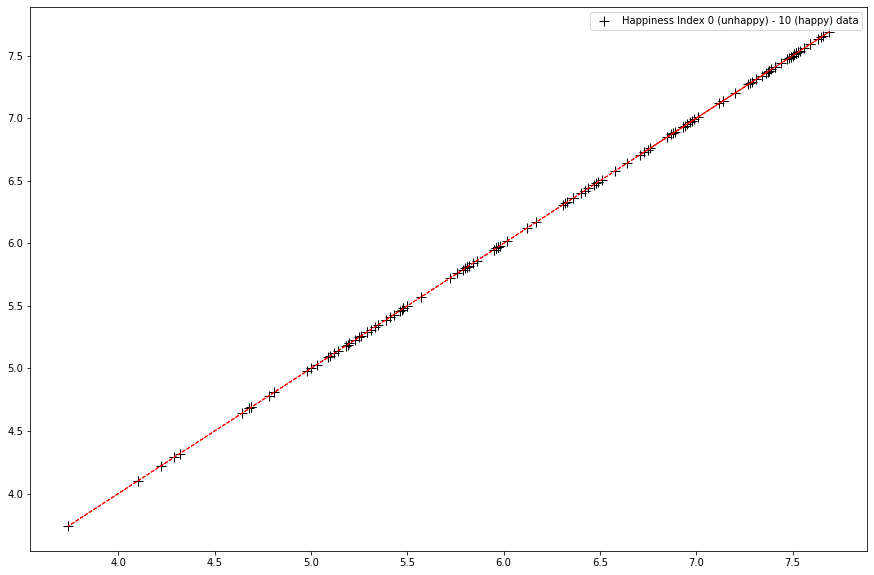

0.5775238887039137


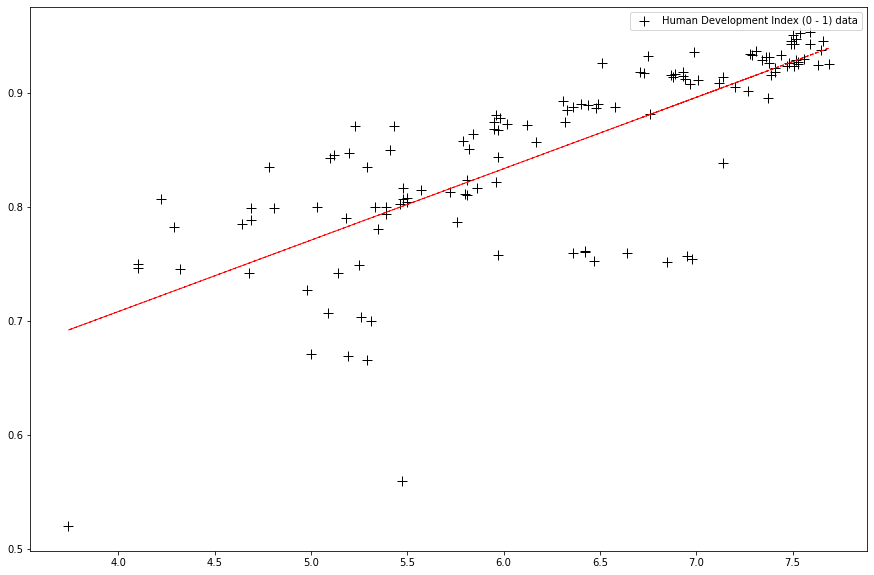

0.3799559204190407


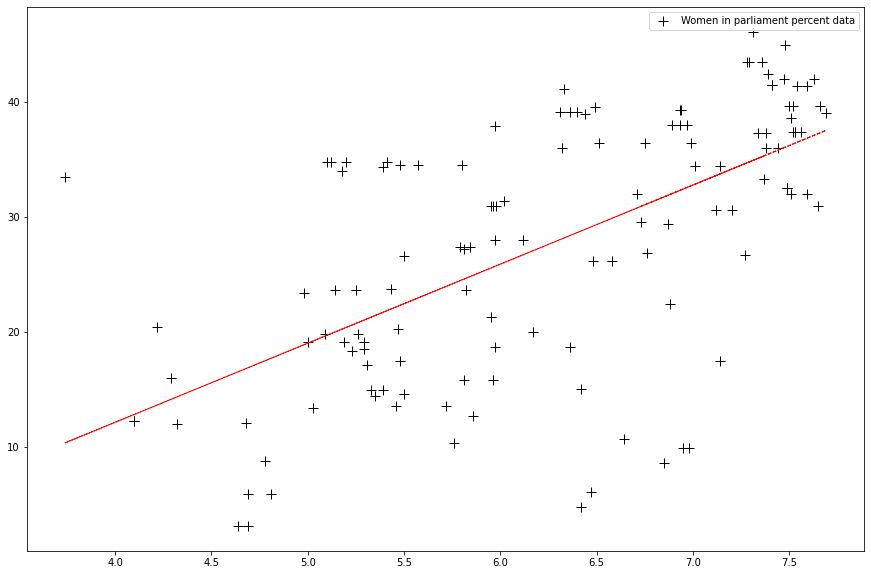

0.051774751356740714


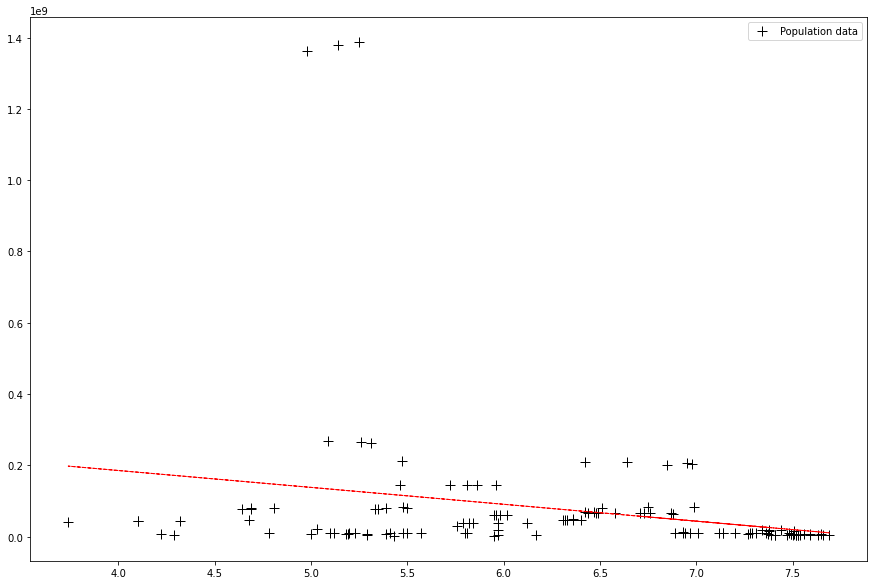

0.09910572517691649


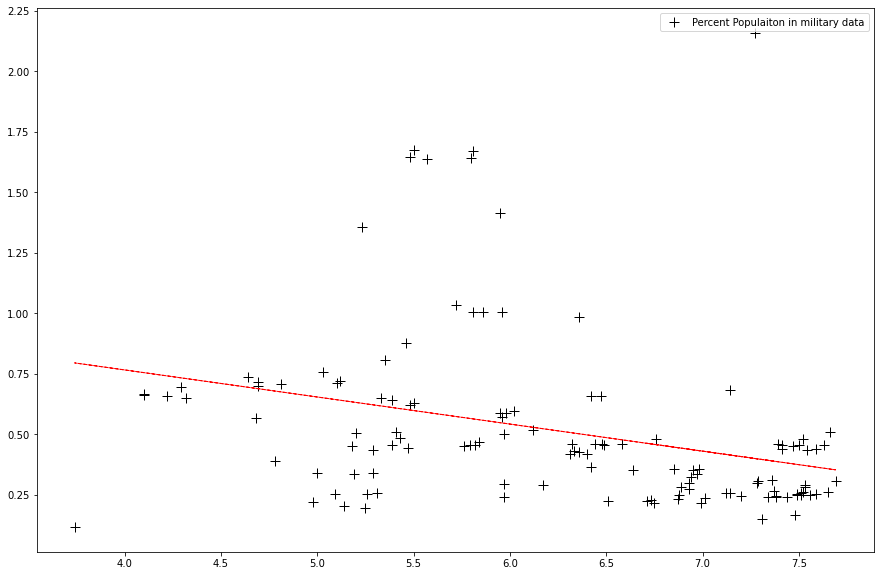

In [280]:
listy = df[['Population size in millions', 'Gini income inequality index',
       'Percent of world population', 'Percent of world GDP',
       'Percent of world exports', 'Percent of world imports',
       'Percent of world Foreign Direct Investment',
       'Percent of world oil reserves',
       'Military spending in billion U.S. dollars',
       'Military spending percent of GDP',
       'Military spending percent of total government spending ',
       'Armed forces personnel',
       'Armed forces personnel percent of the labor force',
       'Arms exports million constant U.S. dollars',
       'Arms imports million constant U.S. dollars',
       'Happiness Index 0 (unhappy) - 10 (happy)',
       'Human Development Index (0 - 1)', 'Women in parliament percent',
       'Population', 'Percent Populaiton in military']]
for item in listy:

    x= df_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
    y= df_clean[item]

    plt.plot(x,y,"+", ms=10, mec="k", label='%s data' % item)
   
    plt.legend()

    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)

    plt.plot(x, y_hat, "r--", lw=1)
    corr_matrix = np.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq2 = corr**2
 
    print(R_sq2)

    plt.show()


### now we take a look at the imports and exports of countries, and wheterh countries are net importers or net exporters

r-squared = 0.3799559204190407


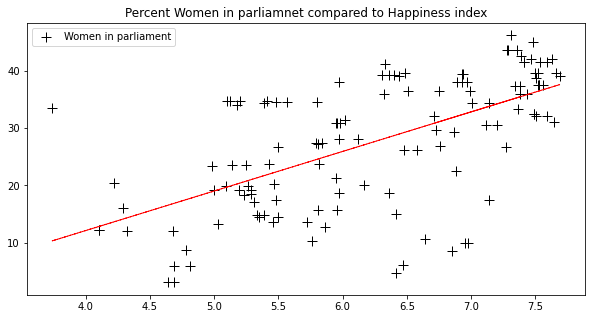

In [613]:
    x= df_clean["Happiness Index 0 (unhappy) - 10 (happy)"]
    y= df_clean["Women in parliament percent"]

    plt.plot(x,y,"+", ms=10, mec="k", label='Women in parliament')
    plt.title("Percent Women in parliamnet compared to Happiness index")
   
    plt.legend()

    z = np.polyfit(x, y, 1)
    y_hat = np.poly1d(z)(x)

    plt.plot(x, y_hat, "r--", lw=1)
    corr_matrix = np.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq2 = corr**2
 
    print("r-squared = " + str(R_sq2))

    plt.show()

In [311]:
import numpy as np
df_clean_mean["imports_greater_than_exports"]= np.where(df_clean_mean["Percent of world imports"]>=df_clean_mean["Percent of world exports"], 1, np.where(df_clean_mean["Percent of world imports"]<df_clean_mean["Percent of world exports"], 0, .5)) 
df_clean_mean["imports_greater_than_exports"].sum()
df_clean_mean["imports_greater_than_exports"].mean()


0.5

In [312]:
df["imports_greater_than_exports"]= np.where(df["Percent of world imports"]>=df["Percent of world exports"], 1, np.where(df["Percent of world imports"]<df["Percent of world exports"], 0, .5)) 
df["imports_greater_than_exports"].sum()

7221.0

In [315]:
df["imports_greater_than_exports"].mean()

0.5899509803921569

In [314]:
df_import_clean= df[["Country", "Year", "Percent of world imports","Percent of world exports","imports_greater_than_exports" ]]
df_import_clean2= df_import_clean.dropna()
df_import_clean2



,Country,Year,Percent of world imports,Percent of world exports,imports_greater_than_exports
92,Albania,1990,0.01,0.01,1.0
93,Albania,1991,0.01,0.00,1.0
94,Albania,1992,0.01,0.00,1.0
95,Albania,1993,0.02,0.00,1.0
96,Albania,1994,0.02,0.00,1.0
...,...,...,...,...,...
12232,Zimbabwe,2014,0.03,0.02,1.0
12233,Zimbabwe,2015,0.04,0.02,1.0
12234,Zimbabwe,2016,0.03,0.02,1.0
12235,Zimbabwe,2017,0.02,0.02,1.0


In [316]:
df_import_clean2["imports_greater_than_exports"].mean()

0.728707935189032

In [319]:
df_import_clean2.loc[(df["Country"]=="China")].imports_greater_than_exports.mean()

0.034482758620689655

In [324]:
df_import_clean2_country= df_import_clean2[["Country", "Percent of world imports","Percent of world exports","imports_greater_than_exports" ]].groupby(by="Country").agg("mean")
df_import_clean2_country

df_import_clean2_country2= df_import_clean2_country.reset_index()
df_import_clean2_country2
                                           

,Country,Percent of world imports,Percent of world exports,imports_greater_than_exports
0,Albania,0.024828,0.011724,1.000000
1,Algeria,0.231034,0.272069,0.379310
2,Angola,0.155789,0.206316,0.157895
3,Antigua and Barbuda,0.006538,0.007308,0.923077
4,Argentina,0.367241,0.376897,0.517241
...,...,...,...,...
176,Venezuela,0.318000,0.391200,0.240000
177,Vietnam,0.396552,0.369655,0.896552
178,Yemen,0.047778,0.027778,1.000000
179,Zambia,0.028800,0.027600,0.880000


In [322]:
df_import_clean2_country["imports_greater_than_exports"].mean()

0.735162200827942

### this chart shows how each country stands on its aveage import-to-export ratio. A numbner of 1 indicates it has always had more imports than exports. 

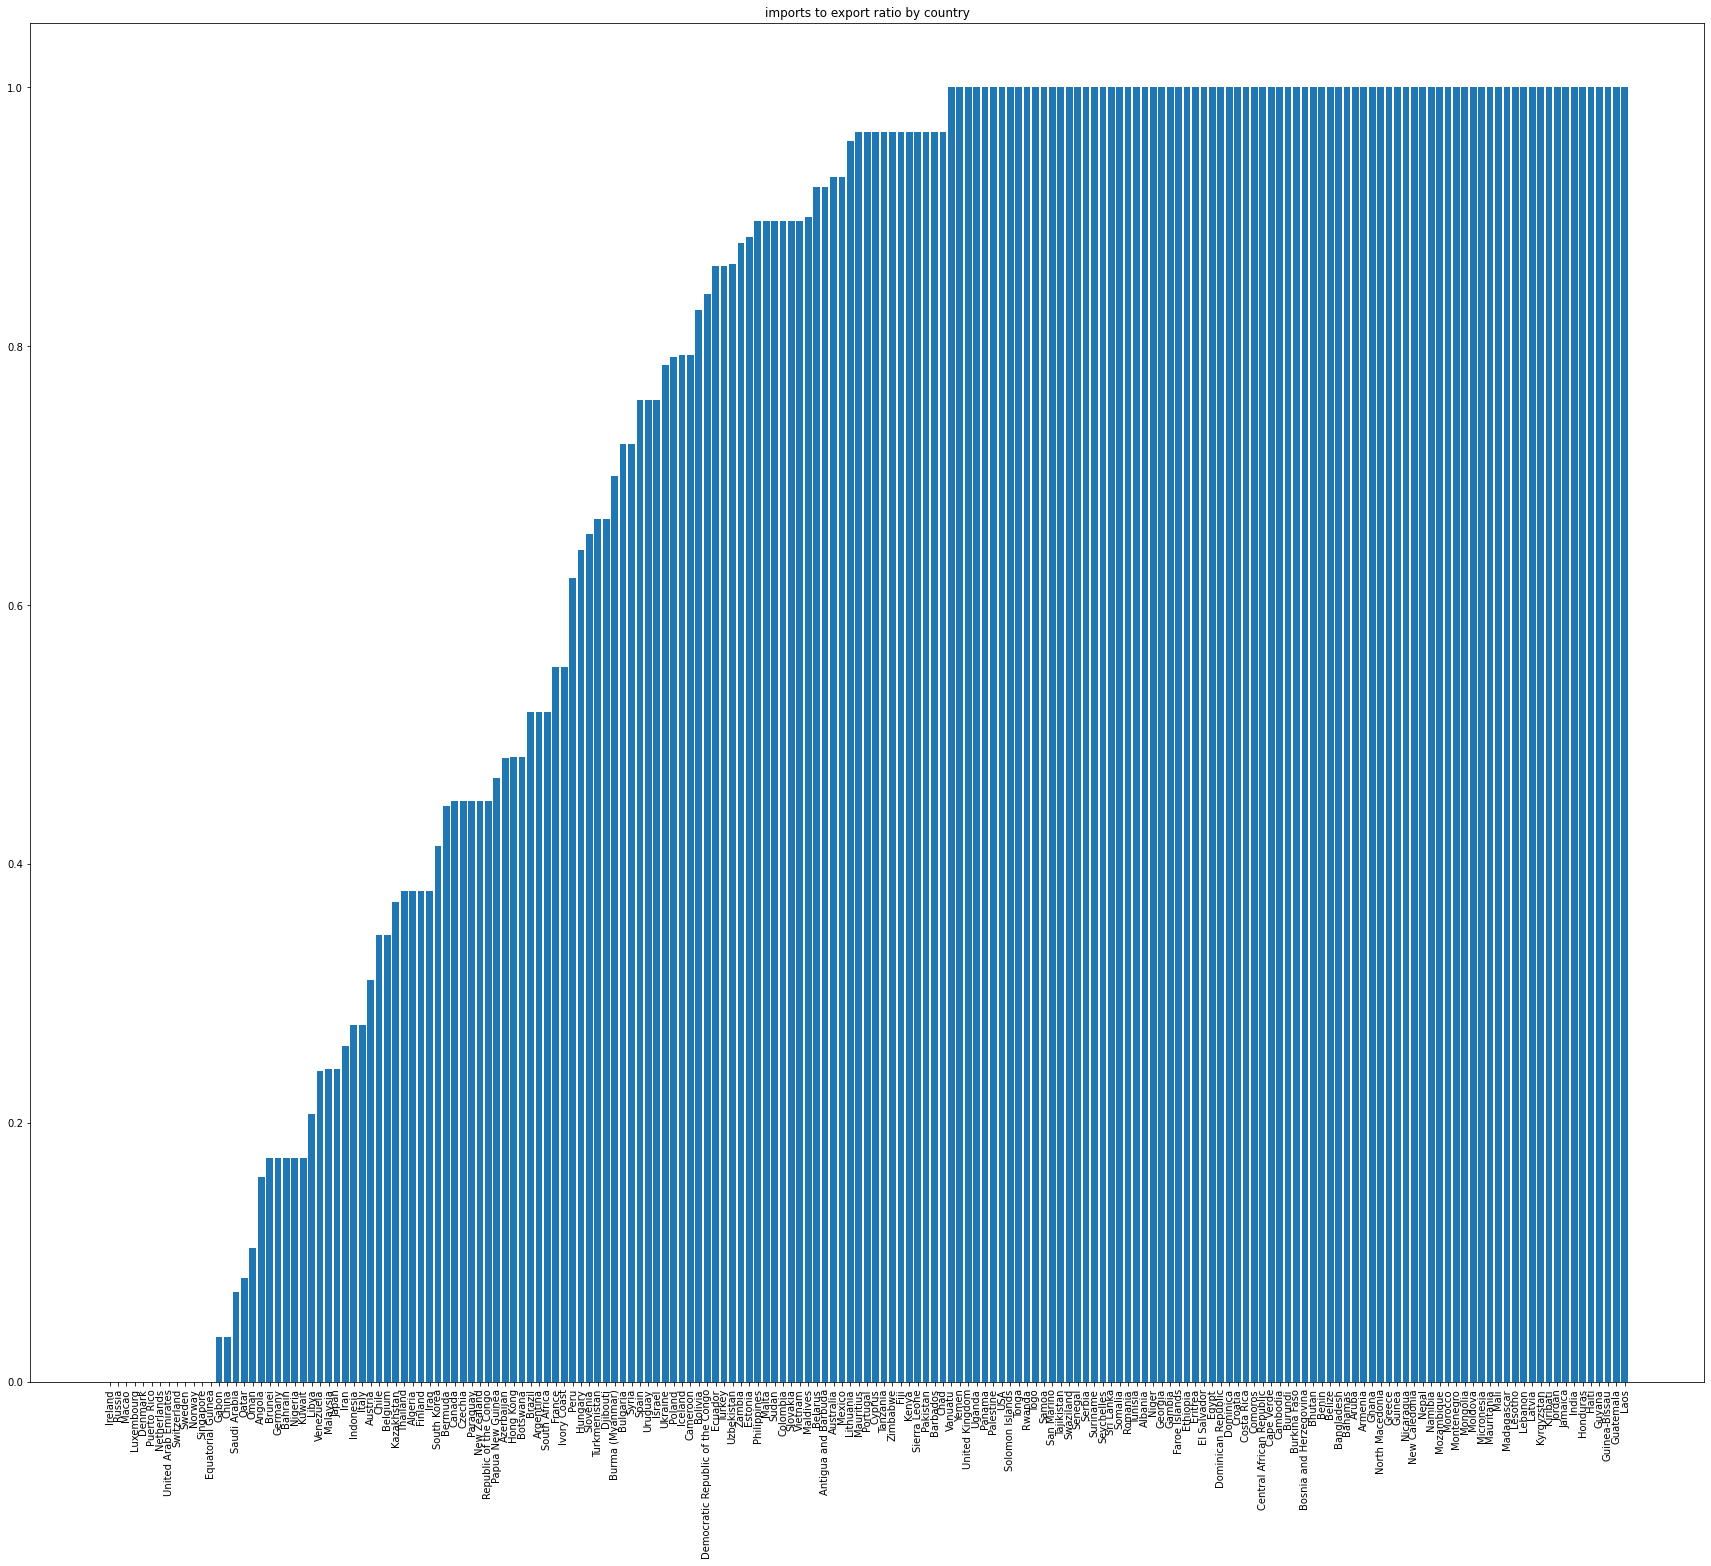

In [331]:
df_import_clean2_country2_sorted= df_import_clean2_country2.sort_values(by="imports_greater_than_exports")

plt.bar(df_import_clean2_country2_sorted["Country"], df_import_clean2_country2_sorted["imports_greater_than_exports"])


#plt.ylabel("imports_greater_than_exports")
plt.title("import to export ratio by country")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (30,25)
plt.show()

In [333]:
df_import_clean2_country["import to export ratio"]= df_import_clean2_country["Percent of world imports"]/df_import_clean2_country["Percent of world exports"]

df_import_clean2_country.head()



,Percent of world imports,Percent of world exports,imports_greater_than_exports,imort to export ratio,import to export ratio
Country,,,,,
Albania,0.024828,0.011724,1.000000,2.117647,2.117647
Algeria,0.231034,0.272069,0.379310,0.849176,0.849176
Angola,0.155789,0.206316,0.157895,0.755102,0.755102
Antigua and Barbuda,0.006538,0.007308,0.923077,0.894737,0.894737
Argentina,0.367241,0.376897,0.517241,0.974382,0.974382


In [334]:
df_import_clean2_country_sorted= df_import_clean2_country.sort_values(by="import to export ratio")

## The following graphs shows the ratio of imports to exports. A y-axis value of 1 means the country imports the same amount as it exports. A value greater than 1 means it imports more than it exports, and a value lower than one means it exports more than it imports

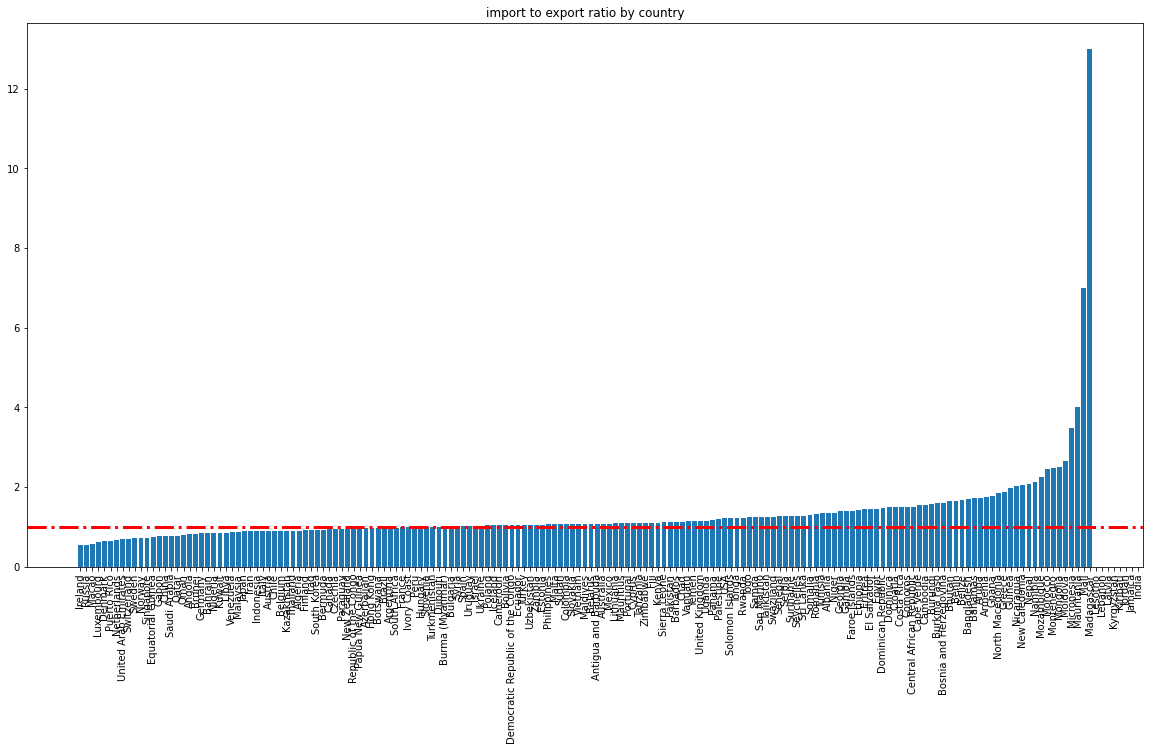

In [592]:


plt.bar(df_import_clean2_country2_sorted["Country"], df_import_clean2_country_sorted["import to export ratio"])


#plt.ylabel("imports_greater_than_exports")
plt.title("import to export ratio by country")
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = (20,10)
plt.axhline(y=1, xmin=0, xmax=1, color='r', linestyle='-.', linewidth=3)
plt.show()


In [501]:
df_import_clean2_country_sorted2=df_import_clean2_country_sorted.reset_index()

df_import_clean2_country3=df_import_clean2_country.reset_index()

df_import_clean2_country4 = pd.DataFrame (df_import_clean2_country3)
df_import_clean2_country4.loc[(df_import_clean2_country4["Country"]=="Germany")]



,Country,Percent of world imports,Percent of world exports,imports_greater_than_exports,imort to export ratio,import to export ratio
62,Germany,7.86931,8.437586,0.172414,0.932649,0.932649


In [526]:
df_import_clean2_country4.drop(columns= "import to export ratio")
df_import_clean2_country4["imports number"]= df_import_clean2_country4["import to export ratio"]


,Country,Percent of world imports,Percent of world exports,imports_greater_than_exports,imort to export ratio,import to export ratio,imports number
0,Albania,0.024828,0.011724,1.000000,2.117647,2.117647,2.117647
1,Algeria,0.231034,0.272069,0.379310,0.849176,0.849176,0.849176
2,Angola,0.155789,0.206316,0.157895,0.755102,0.755102,0.755102
3,Antigua and Barbuda,0.006538,0.007308,0.923077,0.894737,0.894737,0.894737
4,Argentina,0.367241,0.376897,0.517241,0.974382,0.974382,0.974382
...,...,...,...,...,...,...,...
176,Venezuela,0.318000,0.391200,0.240000,0.812883,0.812883,0.812883
177,Vietnam,0.396552,0.369655,0.896552,1.072761,1.072761,1.072761
178,Yemen,0.047778,0.027778,1.000000,1.720000,1.720000,1.720000
179,Zambia,0.028800,0.027600,0.880000,1.043478,1.043478,1.043478


df_import_clean2_country_sorted2

## Check a country to see if it imports or exports more

In [562]:
a=input("input a country ")
b= df_import_clean2_country4.loc[(df_import_clean2_country4["Country"]==a)]
b=pd.DataFrame(b)


if (b["imports number"] >1).any():
    print( str(a) + " imports more than it exports")
elif (b["imports number"] <1).any():
    print(str(a) + " exports more than it imports")
elif (b["imports number"] ==1).any():
    print( str(a) + " imports the same amoutn as it exports")
else:
    print(str(a) +"unknown relationships between imports and exports")


input a country Mali
Mali imports more than it exports
